In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import itertools
import warnings
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.set_index('Date', inplace= True)
df.index.name = None
df.head()

ACB    MWG    MSN    BID    VRE    POW    PLX    HPG    VNM  \
2020-01-02  9460  37730  46160  32369  34350  11352  48590  10930  81400   
2020-01-03  9460  37170  46570  32229  34600  11161  49100  11000  81660   
2020-01-06  9260  36990  45830  31610  33650  10827  49280  10930  81040   
2020-01-07  9260  37270  46000  32229  33950  10731  48590  10790  81800   
2020-01-08  9090  36370  45350  32509  32700  10254  47910  10680  82000   

              VHM  ...      GVR     SAB      BCM   MBB    GAS  SSB     SHB  \
2020-01-02  62600  ...  10150.0  100180  28160.0  9680  68440  NaN  2990.0   
2020-01-03  62820  ...  10500.0  100440  27880.0  9700  68590  NaN  2900.0   
2020-01-06  61500  ...  10320.0  100080  27590.0  9560  70760  NaN  2860.0   
2020-01-07  61790  ...  10050.0  100180  26830.0  9580  70250  NaN  2860.0   
2020-01-08  60830  ...   9700.0   99810  26640.0  9450  70180  NaN  2860.0   

             SSI    STB   VPB  
2020-01-02  8740  10200  7250  
2020-01-03  8670  10200  7200  
2020-01-06  8640  10050  7030  
2020-01-07  8670  10150  7180  
2020-01-08  8430   9980  7090  

[5 rows x 30 columns]

In [3]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [4]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

minPar = (0,0,0)
minParS = (0,0,0,0)
minAIC = 10**9

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.ACB,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if minAIC > results.aic:
                minPar = param
                minParS = param_seasonal
                minAIC = results.AIC

        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12782D+01    |proj g|=  3.76588D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.766D-08   1.128D+01
  F =   11.278199577475576     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08036D+01    |proj g|=  6.25630D-02



At iterate    5    f=  1.08034D+01    |proj g|=  3.65276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   3.653D-05   1.080D+01
  F =   10.803383018995955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35206D+00    |proj g|=  1.08093D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   1.547D-05   8.253D+00
  F =   8.2534272931496897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.34886D+00    |proj g|=  1.43844D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.438D-03   8.349D+00
  F =   8.3488563198176475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33586D+00    |proj g|=  3.95787D-01

At iterate    5    f=  8.33476D+00    |proj g|=  5.47989D-01

At iterate   10    f=  8.33291D+00    |proj g|=  7.96785D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.25096D+00    |proj g|=  1.44935D-02


 This problem is unconstrained.



At iterate    5    f=  8.24461D+00    |proj g|=  2.72831D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     11      1     0     0   1.775D-05   8.245D+00
  F =   8.2446125898539897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09761D+01    |proj g|=  8.23462D-01

At iterate    5    f=  1.08990D+01    |proj g|=  8.01941D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     24      1     0     0   3.820D-05   1.090D+01
  F =   10.898504972418367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.06829D+01    |proj g|=  2.43156D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     35      1     0     0   4.710D-05   1.068D+01
  F =   10.682728473427545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06042D+00    |proj g|=  5.18545D-01

At iterate    5    f=  8.01852D+00    |proj g|=  4.51875D-04

At iterate   10    f=  8.01848D+00    |proj g|=  1.02927D-02

At iterate   15    f=  8.01295D+00    |proj g|=  1.46131D-01

At iterate   20    f=  7.93471D+00    |proj g|=  1.97517D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     25      1     0     0   4.448D-07   7.935D+00
  F =   7.9345908791483017     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.91692D+00    |proj g|=  3.79948D-03

At iterate   10    f=  7.91678D+00    |proj g|=  1.28287D-02

At iterate   15    f=  7.90158D+00    |proj g|=  1.67218D-01

At iterate   20    f=  7.82673D+00    |proj g|=  2.53007D-02

At iterate   25    f=  7.82631D+00    |proj g|=  3.36620D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   3.366D-07   7.826D+00
  F =   7.8263149556763230     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  1.06667D+01    |proj g|=  9.38515D-04

At iterate   20    f=  1.06664D+01    |proj g|=  1.38082D-02

At iterate   25    f=  1.06528D+01    |proj g|=  7.85314D-02

At iterate   30    f=  1.03702D+01    |proj g|=  3.45873D-01

At iterate   35    f=  8.88030D+00    |proj g|=  4.59150D+00
  ys=-1.296E-01  -gs= 8.311E-01 BFGS update SKIPPED

At iterate   40    f=  7.96007D+00    |proj g|=  2.13664D+00

At iterate   45    f=  7.94497D+00    |proj g|=  6.49623D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     79      1     1     0   6.496D-06   7.945D+00
  F =   7.9449655513877149     

 This problem is unconstrained.



At iterate   15    f=  1.06459D+01    |proj g|=  3.97011D-04

At iterate   20    f=  1.06454D+01    |proj g|=  1.65964D-02

At iterate   25    f=  1.06173D+01    |proj g|=  4.01878D-02

At iterate   30    f=  1.04973D+01    |proj g|=  2.51480D-01

At iterate   35    f=  8.69637D+00    |proj g|=  1.25135D+00

At iterate   40    f=  8.11374D+00    |proj g|=  6.11817D-01

At iterate   45    f=  7.92628D+00    |proj g|=  3.36333D-01

At iterate   50    f=  7.90560D+00    |proj g|=  9.38233D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     98      1     0     0   9.382D-04   7.906D+00
  F =   7.90559936736

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.97642D+00    |proj g|=  6.14904D-01

At iterate    5    f=  7.92977D+00    |proj g|=  6.43467D-03

At iterate   10    f=  7.92882D+00    |proj g|=  2.37700D-02

At iterate   15    f=  7.86464D+00    |proj g|=  2.14562D-01

At iterate   20    f=  7.83652D+00    |proj g|=  4.59400D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   9.437D-06   7.837D+00
  F =   7.8365204056540332     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.91482D+00    |proj g|=  5.78067D-03

At iterate   10    f=  7.91324D+00    |proj g|=  1.48713D-02

At iterate   15    f=  7.91304D+00    |proj g|=  2.85531D-03

At iterate   20    f=  7.91090D+00    |proj g|=  4.61087D-02

At iterate   25    f=  7.83216D+00    |proj g|=  2.26546D-01

At iterate   30    f=  7.81896D+00    |proj g|=  9.31810D-04

At iterate   35    f=  7.81895D+00    |proj g|=  2.90109D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     38      1     0     0   4.589D-06   7.819D+00
  F =   7.8189513454826818     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27335D+00    |proj g|=  5.42189D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.422D-06   7.273D+00
  F =   7.2733516058163765     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.



At iterate    5    f=  7.14551D+00    |proj g|=  1.43896D-03

At iterate   10    f=  7.14549D+00    |proj g|=  9.71181D-03

At iterate   15    f=  7.14409D+00    |proj g|=  9.80753D-02

At iterate   20    f=  7.13140D+00    |proj g|=  8.35828D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     30      1     0     0   4.905D-07   7.130D+00
  F =   7.1302442286996426     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20039D+00    |proj g|=  4.89058D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.891D-06   7.200D+00
  F =   7.2003875353762181     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19616D+00    |proj g|=  1.97656D-01


 This problem is unconstrained.



At iterate    5    f=  7.14462D+00    |proj g|=  8.88853D-02

At iterate   10    f=  7.14362D+00    |proj g|=  5.17322D-04

At iterate   15    f=  7.14350D+00    |proj g|=  1.28986D-02

At iterate   20    f=  7.13481D+00    |proj g|=  8.45707D-02

At iterate   25    f=  7.13003D+00    |proj g|=  1.46985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   3.227D-05   7.130D+00
  F =   7.1300318168892511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26670D+00    |proj g|=  2.93869D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      4      1     0     0   9.320D-06   7.267D+00
  F =   7.2666968406083381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23709D+00    |proj g|=  1.29896D-01

At iterate    5    f=  7.22109D+00    |proj g|=  1.75668D-03

At iterate   10    f=  7.22098D+00    |proj g|=  1.84571D-02

At iterate   15    f=  7.21037D+00    |proj g|=  9.78739D-02

At iterate   20    f=  7.12448D+00    |proj g|=  5.06415D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     33      1     0     0   1.341D-06   7.123D+00
  F =   7.1231220087880587     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18764D+00    |proj g|=  1.23748D-02

At iterate    5    f=  7.18756D+00    |proj g|=  4.90939D-03


 This problem is unconstrained.



At iterate   10    f=  7.18728D+00    |proj g|=  2.33093D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   1.908D-05   7.187D+00
  F =   7.1872768607947499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32857D+00    |proj g|=  2.16813D-02


 This problem is unconstrained.



At iterate    5    f=  7.32822D+00    |proj g|=  1.94659D-03

At iterate   10    f=  7.32746D+00    |proj g|=  3.60473D-02

At iterate   15    f=  7.30944D+00    |proj g|=  1.19857D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   6.132D-06   7.304D+00
  F =   7.3035859860578443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24904D+00    |proj g|=  1.19696D-01


 This problem is unconstrained.



At iterate    5    f=  7.22196D+00    |proj g|=  3.13230D-02

At iterate   10    f=  7.22093D+00    |proj g|=  2.84199D-03

At iterate   15    f=  7.21693D+00    |proj g|=  4.64472D-02

At iterate   20    f=  7.12475D+00    |proj g|=  5.75986D-02

At iterate   25    f=  7.12290D+00    |proj g|=  3.51934D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     32      1     0     0   6.990D-07   7.123D+00
  F =   7.1229016267844276     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27918D+00    |proj g|=  1.49507D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     16      1     0     0   1.495D-02   7.279D+00
  F =   7.2791792328739264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   2.610D-05   7.529D+00
  F =   7.5285707522334775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38913D+00    |proj g|=  3.87560D-01


 This problem is unconstrained.



At iterate    5    f=  7.22435D+00    |proj g|=  1.82505D-02

At iterate   10    f=  7.22427D+00    |proj g|=  1.53957D-03

At iterate   15    f=  7.22400D+00    |proj g|=  4.40758D-02

At iterate   20    f=  7.17446D+00    |proj g|=  3.39259D-01

At iterate   25    f=  7.13824D+00    |proj g|=  2.67521D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     40      1     0     0   1.759D-06   7.138D+00
  F =   7.1379686227267634     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73144D+00    |proj g|=  1.03531D+00

At iterate    5    f=  7.36167D+00    |proj g|=  3.96803D+00

At iterate   10    f=  7.19970D+00    |proj g|=  1.37972D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     23      1     0     0   2.410D-05   7.200D+00
  F =   7.1997036882746475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  7.33753D+00    |proj g|=  3.40658D+00

At iterate   10    f=  7.20369D+00    |proj g|=  4.73624D-02

At iterate   15    f=  7.20365D+00    |proj g|=  1.28792D-01

At iterate   20    f=  7.20159D+00    |proj g|=  7.74730D-01

At iterate   25    f=  7.19955D+00    |proj g|=  1.10335D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     40      1     0     0   1.439D-04   7.200D+00
  F =   7.1995465850156259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   10    f=  7.30983D+00    |proj g|=  1.66775D-02

At iterate   15    f=  7.30136D+00    |proj g|=  1.33012D-01

At iterate   20    f=  7.28847D+00    |proj g|=  3.79731D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   3.797D-05   7.288D+00
  F =   7.2884697382617034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38922D+00    |proj g|=  3.82537D-01


 This problem is unconstrained.



At iterate    5    f=  7.23893D+00    |proj g|=  8.71130D-02

At iterate   10    f=  7.22461D+00    |proj g|=  3.68658D-02

At iterate   15    f=  7.22424D+00    |proj g|=  9.42434D-04

At iterate   20    f=  7.22419D+00    |proj g|=  5.42676D-02

At iterate   25    f=  7.21610D+00    |proj g|=  1.03698D+00

At iterate   30    f=  7.14965D+00    |proj g|=  1.30777D-01

At iterate   35    f=  7.13799D+00    |proj g|=  1.19883D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     48      1     0     0   3.489D-05   7.138D+00
  F =   7.1379678995761937     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07285D+01    |proj g|=  5.62148D+01

At iterate    5    f=  7.29811D+00    |proj g|=  7.72303D+00

At iterate   10    f=  7.19317D+00    |proj g|=  6.99596D-03

At iterate   15    f=  7.19315D+00    |proj g|=  3.66992D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   4.836D-03   7.193D+00
  F =   7.1931473491786226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      7      1     0     0   2.863D-06   7.520D+00
  F =   7.5200868329489801     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38135D+00    |proj g|=  3.82734D-01


 This problem is unconstrained.



At iterate    5    f=  7.22544D+00    |proj g|=  2.24880D-01

At iterate   10    f=  7.21700D+00    |proj g|=  4.62889D-02

At iterate   15    f=  7.21693D+00    |proj g|=  9.39590D-04

At iterate   20    f=  7.21571D+00    |proj g|=  4.43513D-02

At iterate   25    f=  7.16883D+00    |proj g|=  5.08730D-01

At iterate   30    f=  7.13128D+00    |proj g|=  6.72213D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     51      1     0     0   8.746D-06   7.131D+00
  F =   7.1312355345017453     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73014D+00    |proj g|=  1.03283D+00

At iterate    5    f=  7.34399D+00    |proj g|=  4.72116D+00

At iterate   10    f=  7.21008D+00    |proj g|=  1.47487D-01

At iterate   15    f=  7.19979D+00    |proj g|=  1.15678D-01

At iterate   20    f=  7.19969D+00    |proj g|=  1.68892D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     32      1     0     0   1.689D-05   7.200D+00
  F =   7.1996905515748670     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.32937D+00    |proj g|=  3.39805D+00

At iterate   10    f=  7.20087D+00    |proj g|=  3.05590D+00

At iterate   15    f=  7.19685D+00    |proj g|=  2.57966D-02

At iterate   20    f=  7.19368D+00    |proj g|=  4.51981D-02

At iterate   25    f=  7.19302D+00    |proj g|=  2.53809D-03

At iterate   30    f=  7.19302D+00    |proj g|=  1.82866D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     43      1     0     0   1.829D-05   7.193D+00
  F =   7.1930172417082030     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.30983D+00    |proj g|=  5.28104D-04

At iterate   10    f=  7.30890D+00    |proj g|=  2.69392D-02

At iterate   15    f=  7.29068D+00    |proj g|=  7.65830D-02

At iterate   20    f=  7.28843D+00    |proj g|=  2.14140D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   2.141D-07   7.288D+00
  F =   7.2884261023322052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.24883D+00    |proj g|=  7.34475D-02

At iterate   10    f=  7.21858D+00    |proj g|=  1.34383D-01

At iterate   15    f=  7.21692D+00    |proj g|=  3.88918D-03

At iterate   20    f=  7.21687D+00    |proj g|=  4.57084D-03

At iterate   25    f=  7.21457D+00    |proj g|=  4.49112D-02

At iterate   30    f=  7.14087D+00    |proj g|=  6.49160D-01

At iterate   35    f=  7.13128D+00    |proj g|=  8.94494D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     51      1     0     0   7.998D-05   7.131D+00
  F =   7.1312346492567453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54684D+00    |proj g|=  4.92868D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.929D-06   7.547D+00
  F =   7.5468400390166090     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.2

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.22769D+00    |proj g|=  2.11612D-03

At iterate   10    f=  7.22734D+00    |proj g|=  1.62769D-02

At iterate   15    f=  7.19158D+00    |proj g|=  1.87317D-01

At iterate   20    f=  7.13119D+00    |proj g|=  9.10995D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     33      1     0     0   3.587D-06   7.130D+00
  F =   7.1302053999193795     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   2.425D-05   7.194D+00
  F =   7.1938763723496555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19416D+00    |proj g|=  1.24288D-02

At iterate    5    f=  7.19407D+00    |proj g|=  5.92426D-03

At iterate   10    f=  7.19379D+00    |proj g|=  4.48927D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  7.32105D+00    |proj g|=  2.19592D-03

At iterate   10    f=  7.32016D+00    |proj g|=  3.99715D-02

At iterate   15    f=  7.29753D+00    |proj g|=  2.66831D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   2.190D-06   7.297D+00
  F =   7.2968795943744595     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25583D+00    |proj g|=  1.19973D-01


 This problem is unconstrained.



At iterate    5    f=  7.22866D+00    |proj g|=  3.28458D-02

At iterate   10    f=  7.22756D+00    |proj g|=  1.52409D-03

At iterate   15    f=  7.22705D+00    |proj g|=  3.13423D-02

At iterate   20    f=  7.18256D+00    |proj g|=  1.73104D-01

At iterate   25    f=  7.13068D+00    |proj g|=  1.56489D-02

At iterate   30    f=  7.12999D+00    |proj g|=  4.52998D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     38      1     0     0   4.530D-06   7.130D+00
  F =   7.1299928680258819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.77842D+00    |proj g|=  8.03035D-02

At iterate    5    f=  8.48823D+00    |proj g|=  5.77223D-01

At iterate   10    f=  7.26824D+00    |proj g|=  5.70917D-02

At iterate   15    f=  7.26819D+00    |proj g|=  7.39124D-02

At iterate   20    f=  7.26791D+00    |proj g|=  2.13003D-01

At iterate   25    f=  7.26771D+00    |proj g|=  7.05891D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     71      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.05990D+00    |proj g|=  7.05994D-01

At iterate   10    f=  7.46610D+00    |proj g|=  4.89067D-03

At iterate   15    f=  7.45972D+00    |proj g|=  1.17514D+00
  ys=-9.521E-02  -gs= 5.227E-04 BFGS update SKIPPED

At iterate   20    f=  7.45601D+00    |proj g|=  8.74938D-02

At iterate   25    f=  7.45590D+00    |proj g|=  1.23213D-03

At iterate   30    f=  7.45584D+00    |proj g|=  1.83539D-02

At iterate   35    f=  7.44908D+00    |proj g|=  1.77175D-01

At iterate   40    f=  7.31227D+00    |proj g|=  1.09241D-01

At iterate   45    f=  7.25328D+00    |proj g|=  1.60966D-01

At iterate   50    f=  7.24077D+00    |proj g|=  3.86386D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  7.52288D+00    |proj g|=  1.98954D-01

At iterate   10    f=  7.52244D+00    |proj g|=  3.11197D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     33      1     0     0   1.481D-04   7.522D+00
  F =   7.5224436981736993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23723D+00    |proj g|=  1.27320D-01

At iterate    5    f=  7.22170D+00    |proj g|=  3.48477D-03

At iterate   10    f=  7.22133D+00    |proj g|=  5.04981D-03

At iterate   15    f=  7.22032D+00    |proj g|=  9.00780D-03

At iterate   20    f=  7.21995D+00    |proj g|=  1.26402D-02

At iterate   25    f=  7.21898D+00    |proj g|=  4.75005D-02

At iterate   30    f=  7.20420D+00    |proj g|=  1.59533D-01

At iterate   35    f=  7.12537D+00    |proj g|=  9.43531D-02

At iterate   40    f=  7.12306D+00    |proj g|=  9.15023D-03

At iterate   45    f=  7.12259D+00    |proj g|=  1.00592D-02

At iterate   50    f=  7.12257D+00    |proj g|=  1.49083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  7.63658D+00    |proj g|=  2.56747D-01

At iterate   15    f=  7.26940D+00    |proj g|=  3.16729D-01

At iterate   20    f=  7.19567D+00    |proj g|=  3.72785D-02

At iterate   25    f=  7.19547D+00    |proj g|=  8.09327D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     49      1     0     0   8.093D-05   7.195D+00
  F =   7.1954722808537319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.23685D+00    |proj g|=  4.95620D-01

At iterate   15    f=  7.18662D+00    |proj g|=  4.21461D-03

At iterate   20    f=  7.18658D+00    |proj g|=  3.12800D-03

At iterate   25    f=  7.18643D+00    |proj g|=  6.03044D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     49      1     0     0   2.765D-05   7.186D+00
  F =   7.1864315621712302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32123D+00    |proj g|=  9.55532D-03
  ys=-8.089E-04  -gs= 1.026E-03 BFGS update SKIPPED

At iterate    5    f=  7.31613D+00    |proj g|=  5.87813D-03

At iterate   10    f=  7.31612D+00    |proj g|=  5.70432D-04

At iterate   15    f=  7.31611D+00    |proj g|=  8.63185D-03

At iterate   20    f=  7.31602D+00    |proj g|=  7.48674D-02

At iterate   25    f=  7.30869D+00    |proj g|=  2.09832D-01

At iterate   30    f=  7.29678D+00    |proj g|=  2.41740D-03

At iterate   35    f=  7.29662D+00    |proj g|=  2.05445D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.



At iterate    5    f=  7.22323D+00    |proj g|=  2.94017D-02

At iterate   10    f=  7.22145D+00    |proj g|=  3.94160D-03

At iterate   15    f=  7.22104D+00    |proj g|=  6.44685D-03

At iterate   20    f=  7.22045D+00    |proj g|=  1.84736D-03

At iterate   25    f=  7.22038D+00    |proj g|=  3.67536D-03

At iterate   30    f=  7.21113D+00    |proj g|=  7.10612D-02

At iterate   35    f=  7.13952D+00    |proj g|=  1.19432D-01

At iterate   40    f=  7.12291D+00    |proj g|=  3.93327D-04

At iterate   45    f=  7.12290D+00    |proj g|=  2.74339D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     54   

In [5]:
def one_day(stock):
    mod = sm.tsa.statespace.SARIMAX(df[stock],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit()

    print(results.summary().tables[1])
    return results

In [6]:
results = one_day('ACB')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24887D+00    |proj g|=  1.18996D-01

At iterate    5    f=  7.22323D+00    |proj g|=  2.94017D-02

At iterate   10    f=  7.22145D+00    |proj g|=  3.94160D-03

At iterate   15    f=  7.22104D+00    |proj g|=  6.44685D-03

At iterate   20    f=  7.22045D+00    |proj g|=  1.84736D-03

At iterate   25    f=  7.22038D+00    |proj g|=  3.67536D-03

At iterate   30    f=  7.21113D+00    |proj g|=  7.10612D-02

At iterate   35    f=  7.13952D+00    |proj g|=  1.19432D-01

At iterate   40    f=  7.12291D+00    |proj g|=  3.93327D-04

At iterate   45    f=  7.12290D+00    |proj g|=  2.74339D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

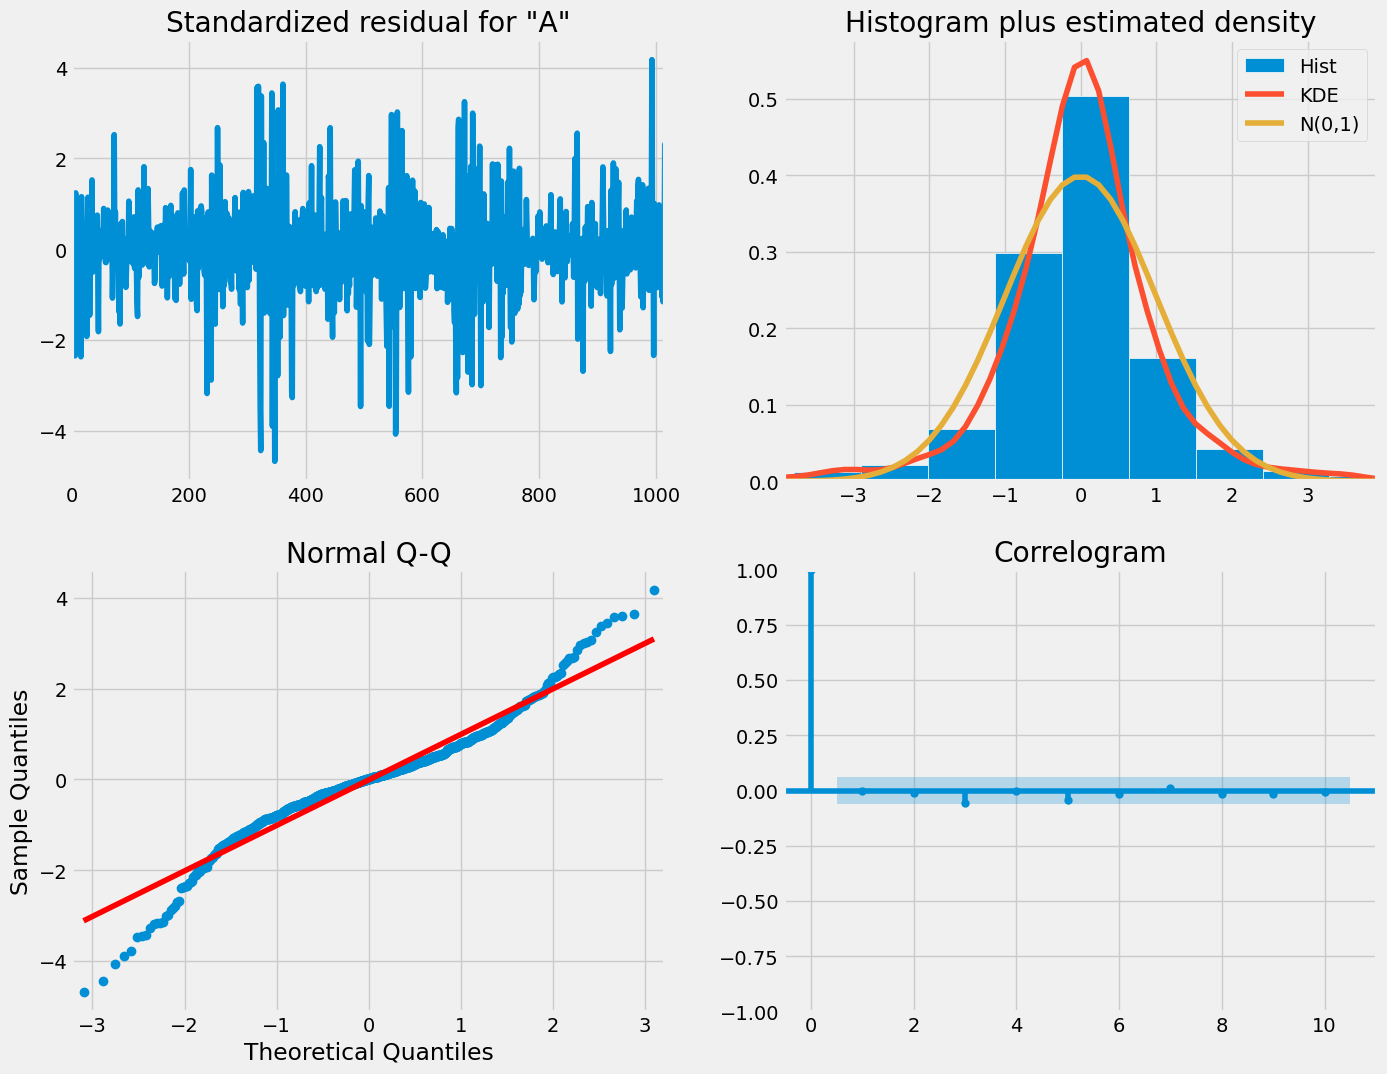

In [7]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [8]:
def addlabels(x,y,z):
    for i in range(0, len(x), 3):
        plt.text(i, y[i], y[i], ha = 'center', fontsize = 7.)
        plt.text(i, z[i], z[i], ha = 'center', fontsize = 7.)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24887D+00    |proj g|=  1.18996D-01

At iterate    5    f=  7.22323D+00    |proj g|=  2.94017D-02

At iterate   10    f=  7.22145D+00    |proj g|=  3.94160D-03

At iterate   15    f=  7.22104D+00    |proj g|=  6.44685D-03

At iterate   20    f=  7.22045D+00    |proj g|=  1.84736D-03

At iterate   25    f=  7.22038D+00    |proj g|=  3.67536D-03

At iterate   30    f=  7.21113D+00    |proj g|=  7.10612D-02

At iterate   35    f=  7.13952D+00    |proj g|=  1.19432D-01

At iterate   40    f=  7.12291D+00    |proj g|=  3.93327D-04

At iterate   45    f=  7.12290D+00    |proj g|=  2.74339D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

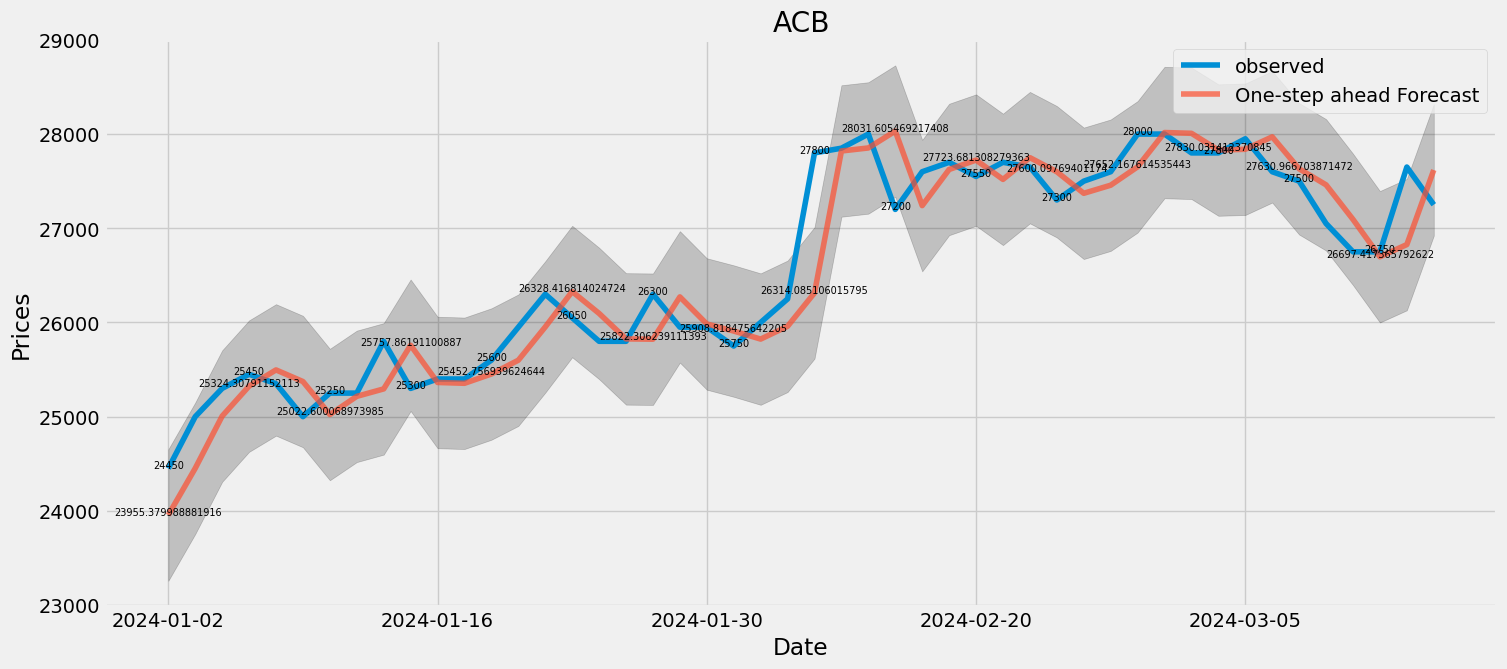

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41512D+00    |proj g|=  7.44450D-02

At iterate    5    f=  8.40971D+00    |proj g|=  5.55599D-03

At iterate   10    f=  8.40944D+00    |proj g|=  9.08612D-03

At iterate   15    f=  8.40937D+00    |proj g|=  9.20755D-04

At iterate   20    f=  8.40886D+00    |proj g|=  1.72863D-02

At iterate   25    f=  8.36446D+00    |proj g|=  3.10471D-01

At iterate   30    f=  8.32313D+00    |proj g|=  6.94817D-03

At iterate   35    f=  8.32282D+00    |proj g|=  4.94637D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

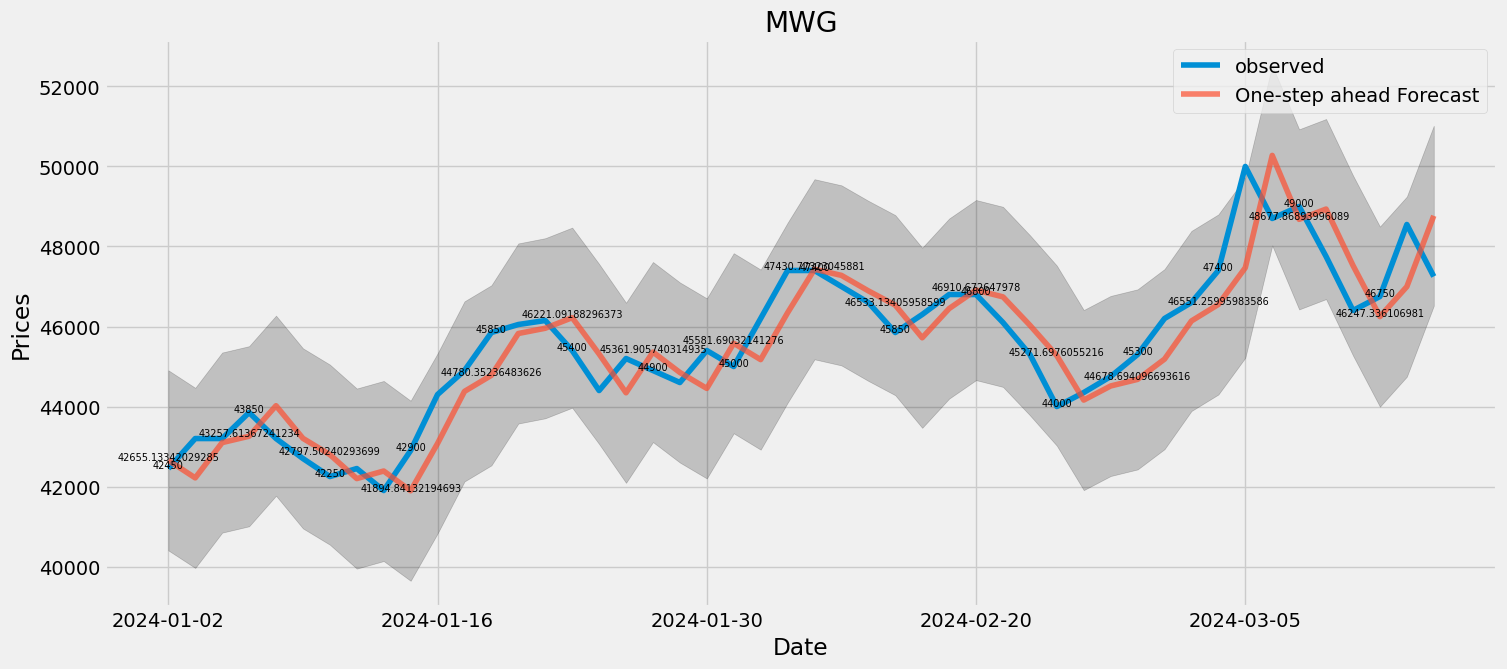

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.98274D+00    |proj g|=  4.98680D-02


 This problem is unconstrained.



At iterate    5    f=  8.98037D+00    |proj g|=  2.28178D-04

At iterate   10    f=  8.98037D+00    |proj g|=  1.57977D-03

At iterate   15    f=  8.97933D+00    |proj g|=  5.23578D-02

At iterate   20    f=  8.97762D+00    |proj g|=  6.48107D-04

At iterate   25    f=  8.97761D+00    |proj g|=  1.97526D-03

At iterate   30    f=  8.97605D+00    |proj g|=  4.65451D-02

At iterate   35    f=  8.92929D+00    |proj g|=  4.35274D-02

At iterate   40    f=  8.92764D+00    |proj g|=  8.84362D-04

At iterate   45    f=  8.92763D+00    |proj g|=  7.78488D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     62   

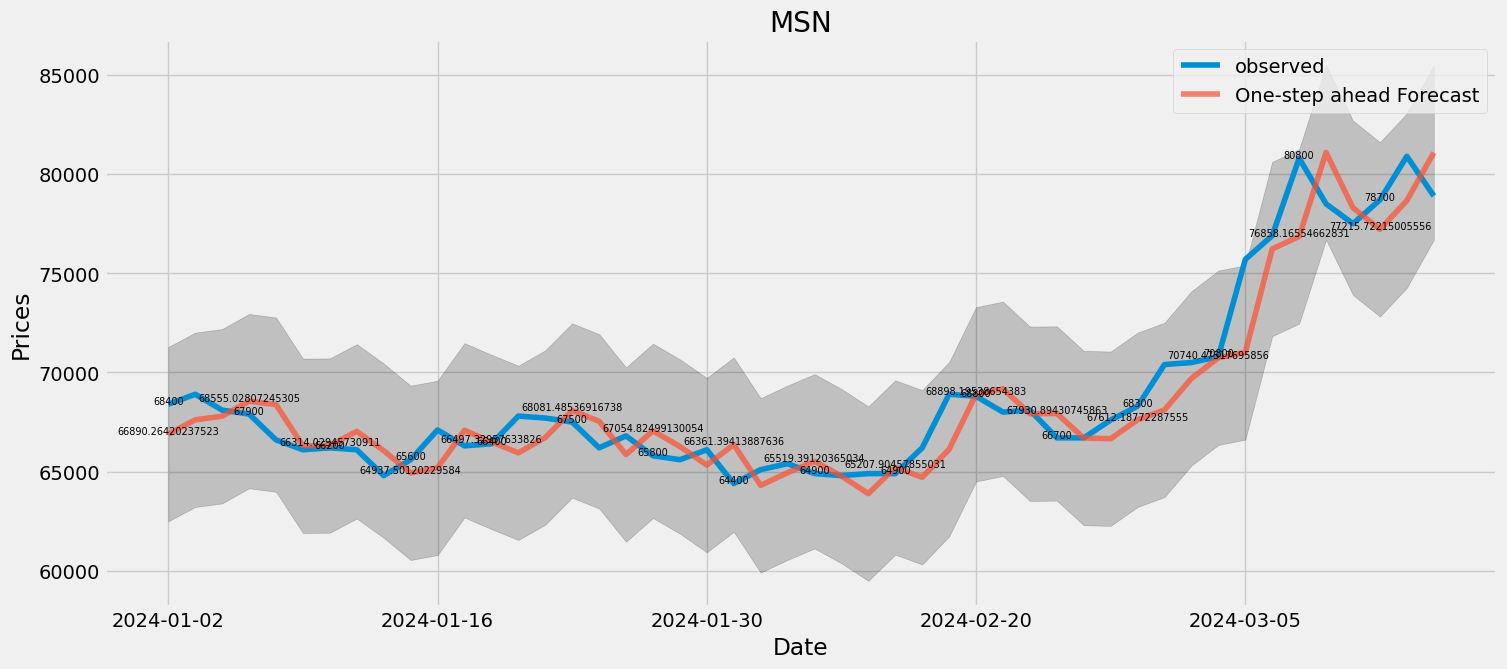

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96226D+00    |proj g|=  8.19227D-02

At iterate    5    f=  7.95104D+00    |proj g|=  1.29969D-02

At iterate   10    f=  7.94990D+00    |proj g|=  1.50064D-02

At iterate   15    f=  7.94953D+00    |proj g|=  4.70897D-04

At iterate   20    f=  7.94939D+00    |proj g|=  8.20564D-03

At iterate   25    f=  7.93632D+00    |proj g|=  9.02721D-02

At iterate   30    f=  7.87037D+00    |proj g|=  8.87892D-02

At iterate   35    f=  7.85163D+00    |proj g|=  1.27445D-03

At iterate   40    f=  7.85162D+00    |proj g|=  3.96234D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

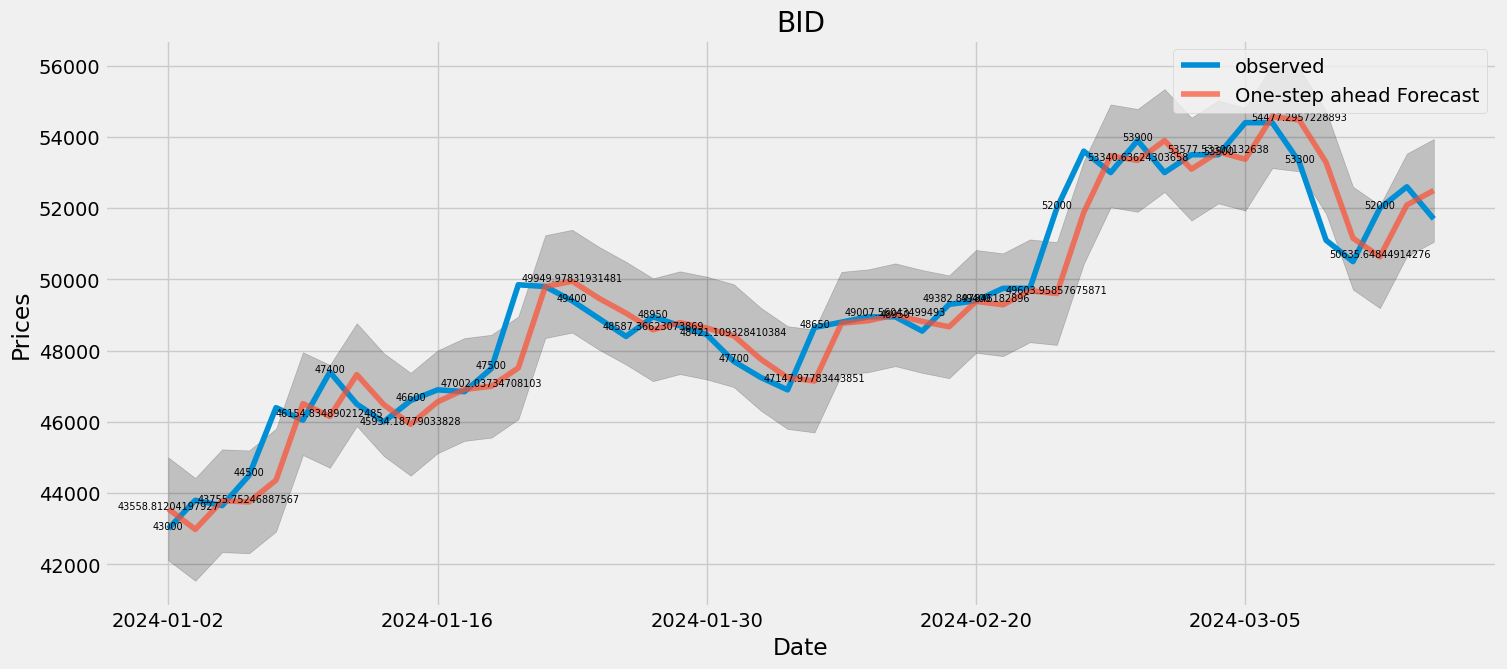

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91585D+00    |proj g|=  2.11784D-01

At iterate    5    f=  7.91163D+00    |proj g|=  1.44331D-02

At iterate   10    f=  7.91119D+00    |proj g|=  6.66359D-03

At iterate   15    f=  7.91111D+00    |proj g|=  2.30417D-02

At iterate   20    f=  7.91085D+00    |proj g|=  4.05133D-02

At iterate   25    f=  7.87955D+00    |proj g|=  3.40144D-01

At iterate   30    f=  7.79606D+00    |proj g|=  1.01394D-01

At iterate   35    f=  7.79104D+00    |proj g|=  5.11160D-02

At iterate   40    f=  7.78572D+00    |proj g|=  6.89422D-02

At iterate   45    f=  7.78217D+00    |proj g|=  1.65292D-02

At iterate   50    f=  7.78034D+00    |proj g|=  1.23951D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

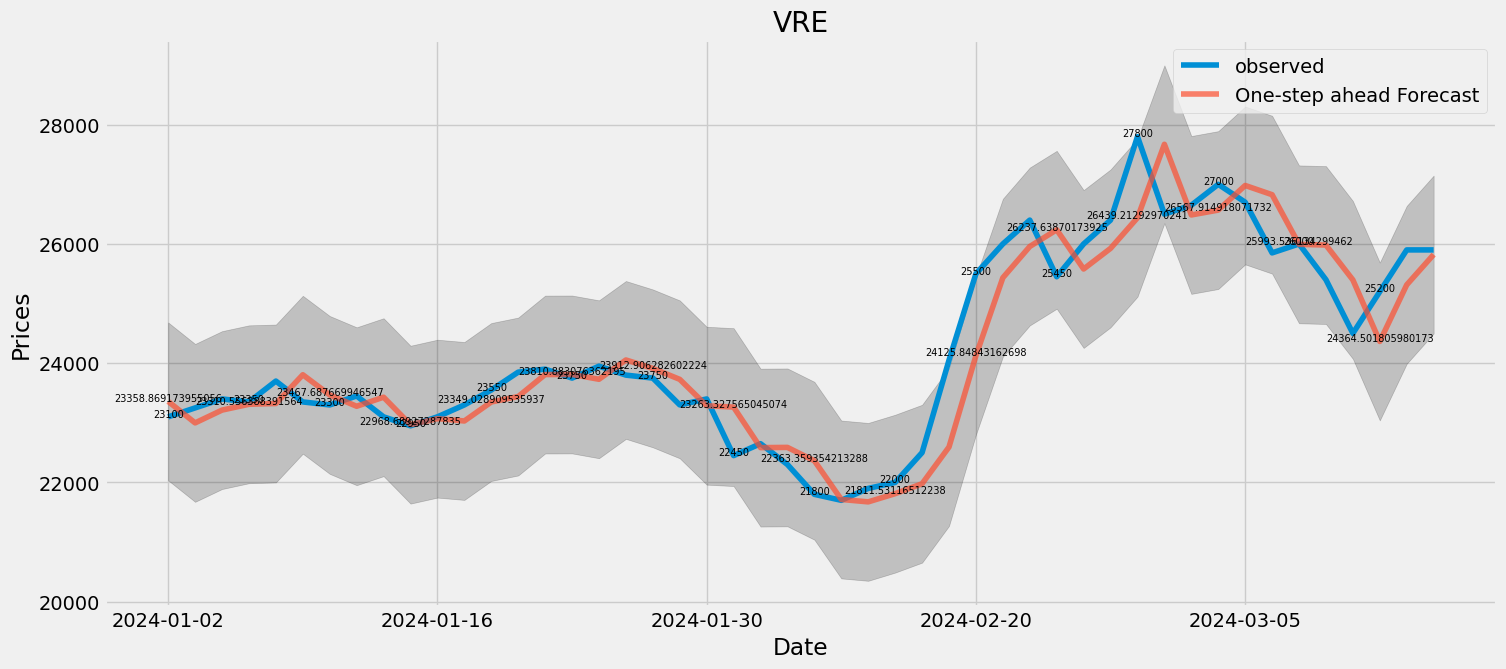

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13248D+00    |proj g|=  1.25926D-01

At iterate    5    f=  7.10706D+00    |proj g|=  2.68006D-02

At iterate   10    f=  7.10609D+00    |proj g|=  1.35723D-03

At iterate   15    f=  7.10554D+00    |proj g|=  2.41674D-02

At iterate   20    f=  7.10319D+00    |proj g|=  8.17730D-03

At iterate   25    f=  7.09447D+00    |proj g|=  6.41727D-02

At iterate   30    f=  7.02934D+00    |proj g|=  1.46318D-01

At iterate   35    f=  7.00784D+00    |proj g|=  1.29930D-02

At iterate   40    f=  7.00780D+00    |proj g|=  5.25218D-03

At iterate   45    f=  7.00778D+00    |proj g|=  8.18614D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

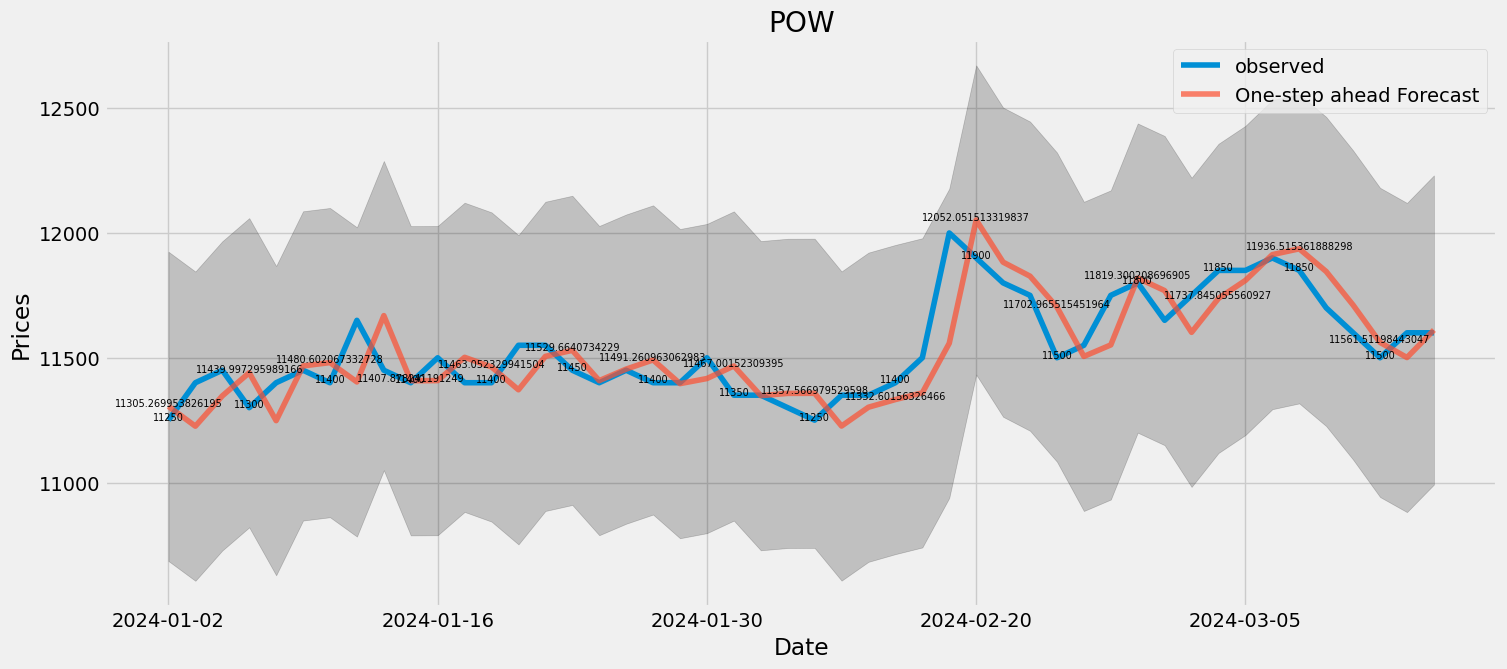

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12437D+00    |proj g|=  1.53289D-02

At iterate    5    f=  8.12369D+00    |proj g|=  3.92619D-04

At iterate   10    f=  8.12277D+00    |proj g|=  2.25053D-02

At iterate   15    f=  8.12219D+00    |proj g|=  3.61699D-04

At iterate   20    f=  8.12217D+00    |proj g|=  4.15797D-03

At iterate   25    f=  8.11947D+00    |proj g|=  5.20233D-02

At iterate   30    f=  8.05891D+00    |proj g|=  2.78683D-01

At iterate   35    f=  8.01962D+00    |proj g|=  2.43223D-03

At iterate   40    f=  8.01948D+00    |proj g|=  2.02616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

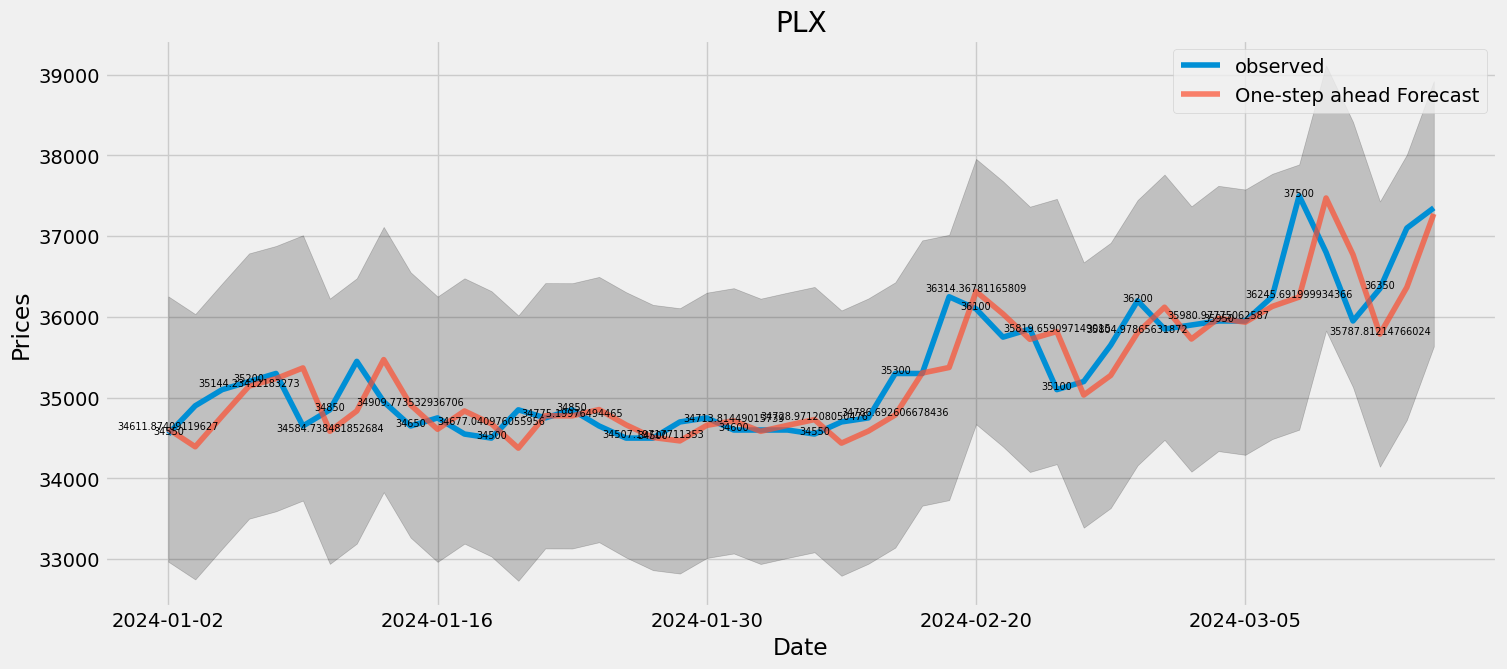

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71395D+00    |proj g|=  1.41326D-01


 This problem is unconstrained.



At iterate    5    f=  7.68651D+00    |proj g|=  1.46554D-02

At iterate   10    f=  7.68625D+00    |proj g|=  5.56606D-03

At iterate   15    f=  7.68524D+00    |proj g|=  4.68623D-02

At iterate   20    f=  7.68468D+00    |proj g|=  7.28424D-03

At iterate   25    f=  7.68465D+00    |proj g|=  2.83794D-03

At iterate   30    f=  7.67772D+00    |proj g|=  1.82457D-01

At iterate   35    f=  7.66991D+00    |proj g|=  8.25067D-03

At iterate   40    f=  7.65675D+00    |proj g|=  9.79628D-02

At iterate   45    f=  7.59501D+00    |proj g|=  2.11322D-02

At iterate   50    f=  7.59411D+00    |proj g|=  2.37790D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

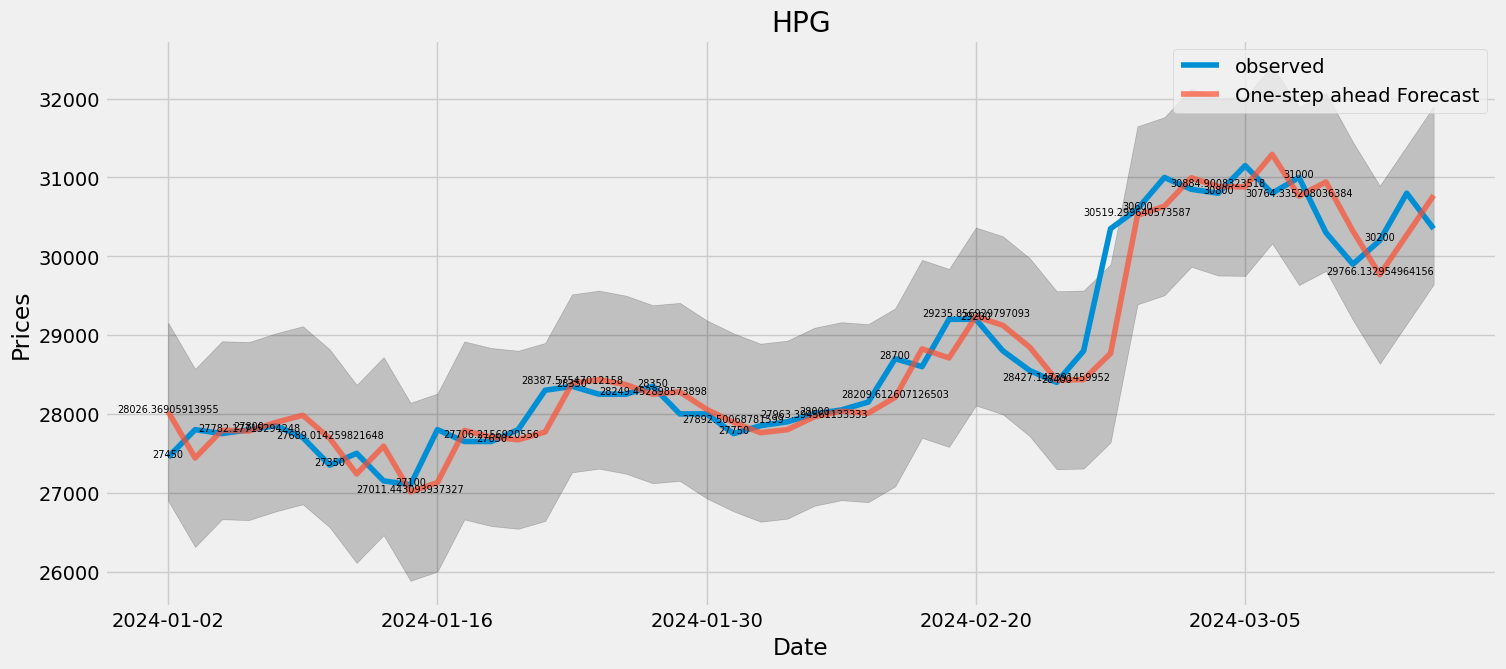

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.60578D+00    |proj g|=  8.55516D-01


 This problem is unconstrained.



At iterate    5    f=  8.46625D+00    |proj g|=  5.73939D-01

At iterate   10    f=  8.44544D+00    |proj g|=  7.84908D-03

At iterate   15    f=  8.44535D+00    |proj g|=  7.98434D-03

At iterate   20    f=  8.44519D+00    |proj g|=  3.04857D-04

At iterate   25    f=  8.44518D+00    |proj g|=  2.02975D-03

At iterate   30    f=  8.44472D+00    |proj g|=  2.74235D-02

At iterate   35    f=  8.42497D+00    |proj g|=  1.82718D-01

At iterate   40    f=  8.39370D+00    |proj g|=  7.04367D-03

At iterate   45    f=  8.39339D+00    |proj g|=  9.81597D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     52   

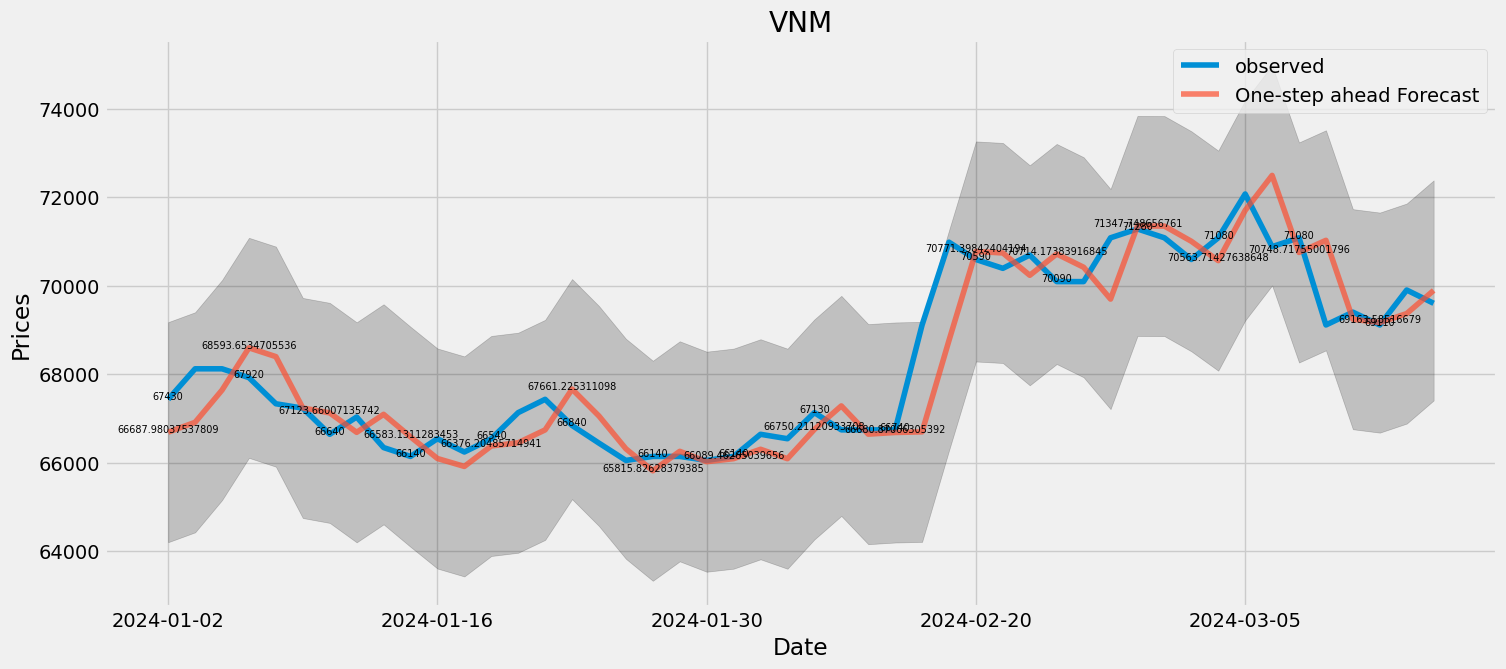

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52907D+00    |proj g|=  1.54208D-01


 This problem is unconstrained.



At iterate    5    f=  8.51909D+00    |proj g|=  7.69001D-03

At iterate   10    f=  8.51871D+00    |proj g|=  2.20877D-04

At iterate   15    f=  8.51869D+00    |proj g|=  2.56098D-03

At iterate   20    f=  8.51010D+00    |proj g|=  6.92754D-02

At iterate   25    f=  8.50179D+00    |proj g|=  2.15241D-02

At iterate   30    f=  8.45352D+00    |proj g|=  1.59522D-01

At iterate   35    f=  8.44752D+00    |proj g|=  1.55432D-02

At iterate   40    f=  8.44742D+00    |proj g|=  2.08342D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     50      1     0     0   2.083D-05   8.447D+00
  F =   8.44741845524

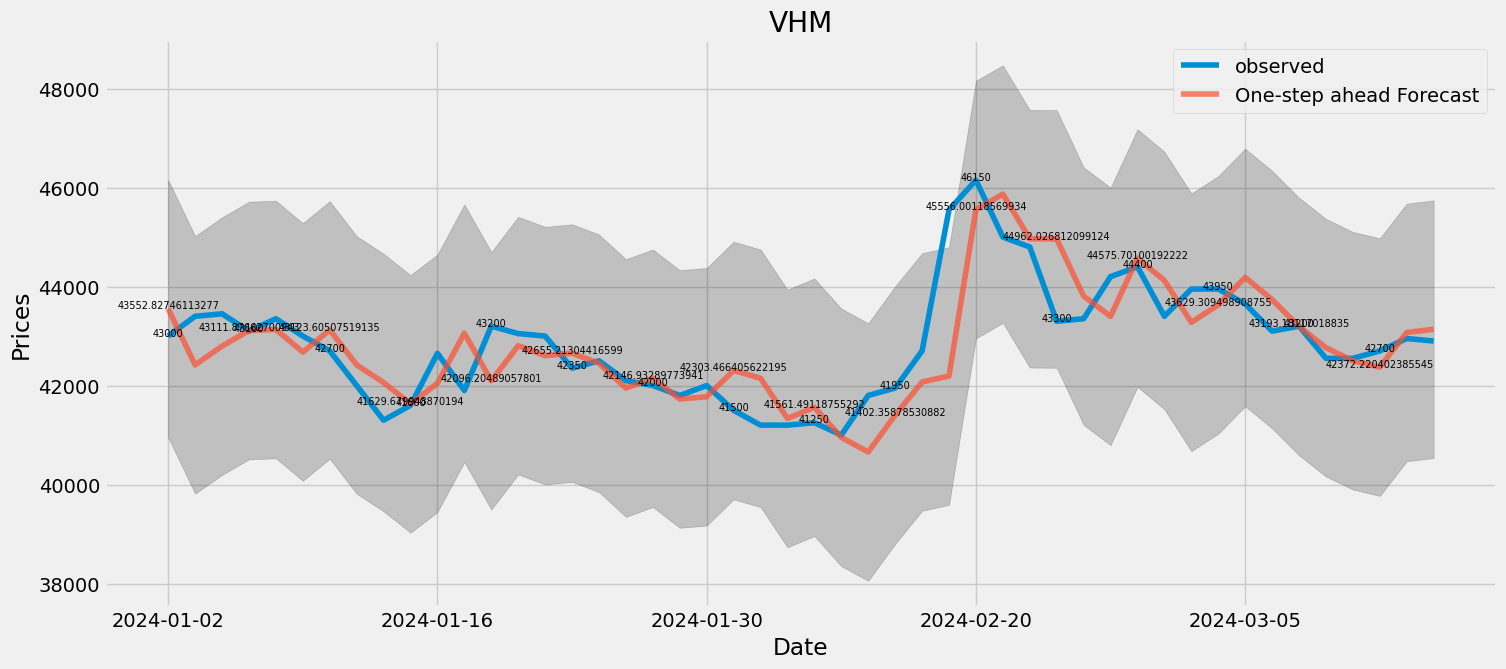

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.01337D+00    |proj g|=  8.10382D-02

At iterate    5    f=  7.99512D+00    |proj g|=  2.09863D-02

At iterate   10    f=  7.99468D+00    |proj g|=  4.67756D-03

At iterate   15    f=  7.99456D+00    |proj g|=  4.47466D-04

At iterate   20    f=  7.99448D+00    |proj g|=  5.71611D-03

At iterate   25    f=  7.97932D+00    |proj g|=  1.11590D-01

At iterate   30    f=  7.89165D+00    |proj g|=  4.23287D-02

At iterate   35    f=  7.89058D+00    |proj g|=  1.09440D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

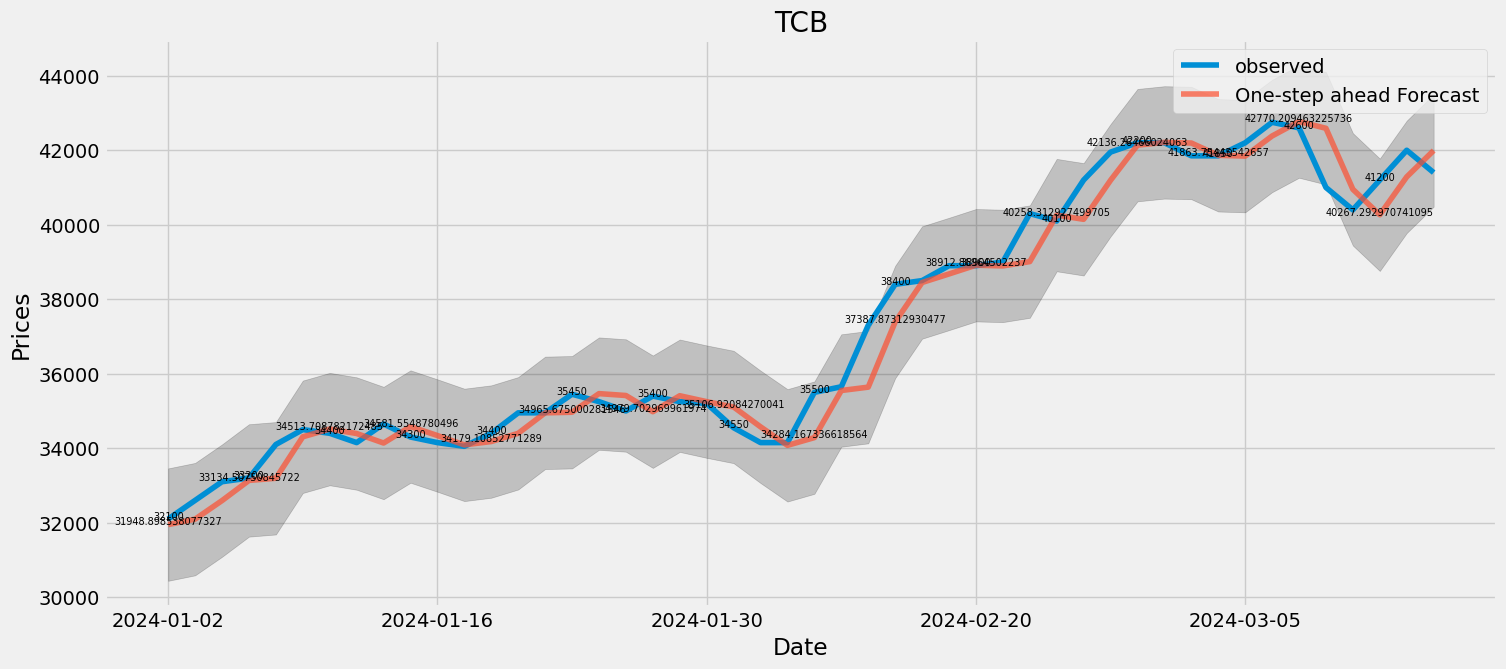

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11608D+00    |proj g|=  1.47412D-01

At iterate    5    f=  7.07969D+00    |proj g|=  3.99301D-02

At iterate   10    f=  7.07820D+00    |proj g|=  1.78473D-03

At iterate   15    f=  7.07731D+00    |proj g|=  3.50094D-02

At iterate   20    f=  7.05389D+00    |proj g|=  1.33726D-01

At iterate   25    f=  7.01587D+00    |proj g|=  4.00775D-02

At iterate   30    f=  7.01459D+00    |proj g|=  3.01566D-02

At iterate   35    f=  7.00196D+00    |proj g|=  1.16090D-02

At iterate   40    f=  7.00176D+00    |proj g|=  1.66197D-03

At iterate   45    f=  7.00140D+00    |proj g|=  4.06829D-03
  ys=-3.870E-05  -gs= 1.117E-04 BFGS update SKIPPED

At iterate   50    f=  7.00116D+00    |proj g|=  1.61807D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


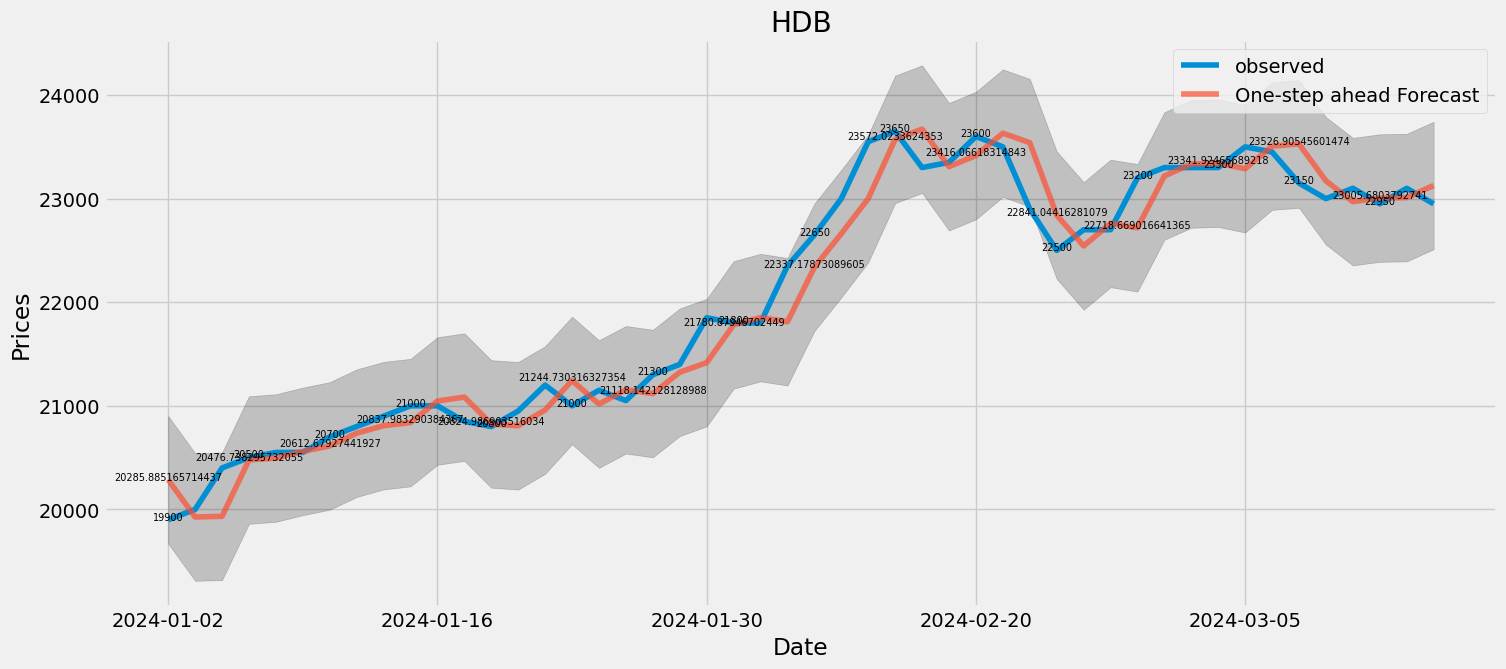

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33744D+00    |proj g|=  1.17154D-01

At iterate    5    f=  7.30144D+00    |proj g|=  3.43474D-02

At iterate   10    f=  7.30082D+00    |proj g|=  6.21150D-03

At iterate   15    f=  7.29967D+00    |proj g|=  2.30853D-02

At iterate   20    f=  7.29905D+00    |proj g|=  1.68895D-03

At iterate   25    f=  7.29810D+00    |proj g|=  3.73707D-02

At iterate   30    f=  7.27871D+00    |proj g|=  1.70525D-01

At iterate   35    f=  7.22842D+00    |proj g|=  2.75563D-01

At iterate   40    f=  7.20866D+00    |proj g|=  3.85752D-03

At iterate   45    f=  7.20793D+00    |proj g|=  1.55978D-02

At iterate   50    f=  7.20768D+00    |proj g|=  6.04101D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

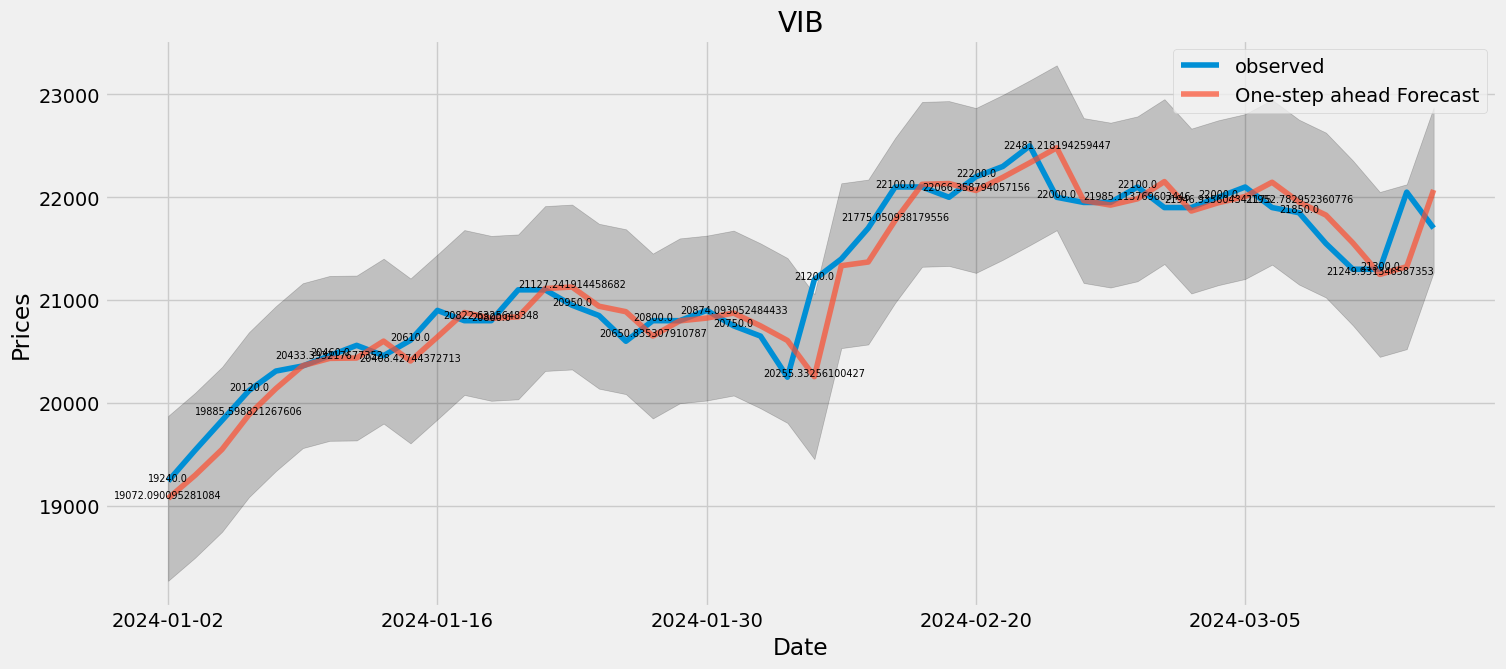

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.58533D+00    |proj g|=  2.50382D-01

At iterate    5    f=  8.46330D+00    |proj g|=  3.90187D-01

At iterate   10    f=  8.41366D+00    |proj g|=  2.94844D-02

At iterate   15    f=  8.40987D+00    |proj g|=  5.35827D-03

At iterate   20    f=  8.40965D+00    |proj g|=  2.31644D-04

At iterate   25    f=  8.40963D+00    |proj g|=  3.43292D-03

At iterate   30    f=  8.40772D+00    |proj g|=  4.74375D-02

At iterate   35    f=  8.40033D+00    |proj g|=  2.54810D-02

At iterate   40    f=  8.35760D+00    |proj g|=  1.26256D-01

At iterate   45    f=  8.34651D+00    |proj g|=  1.89945D-03

At iterate   50    f=  8.34649D+00    |proj g|=  2.87361D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

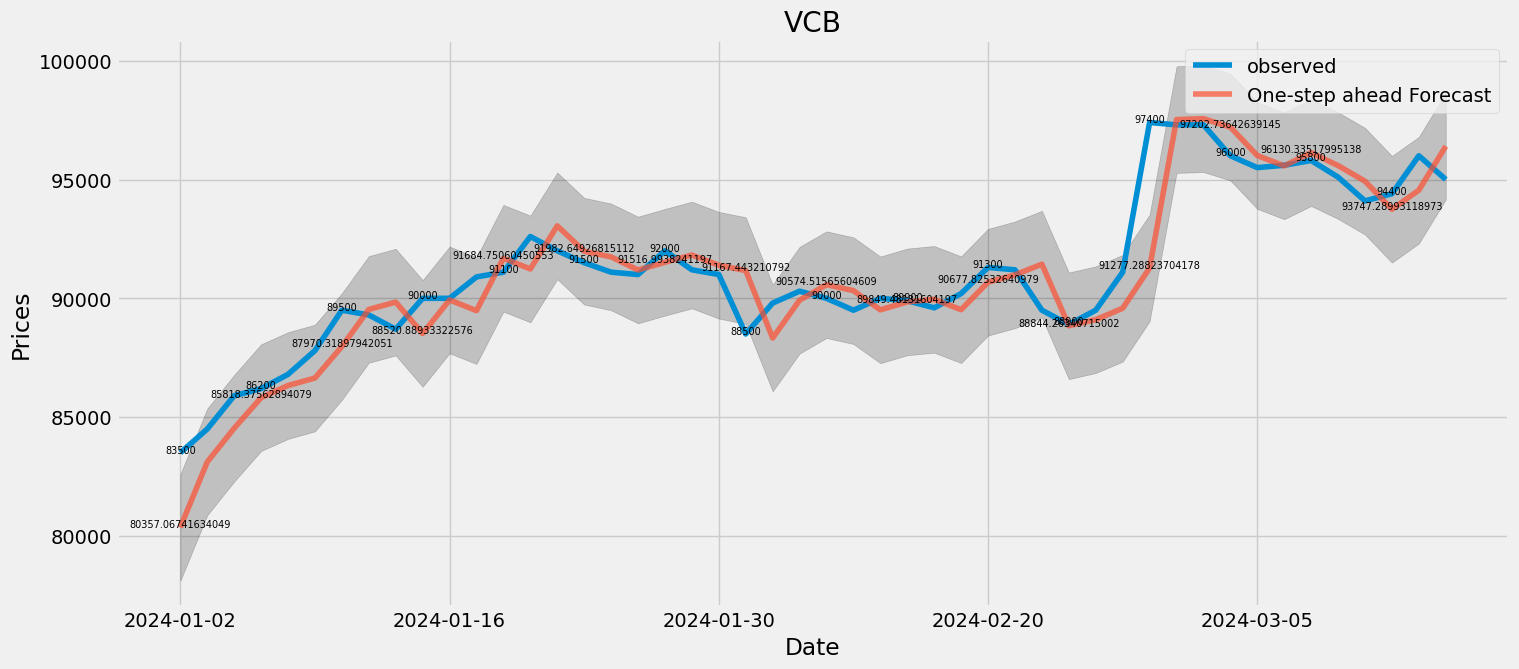

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.98010D+00    |proj g|=  7.47278D-01


 This problem is unconstrained.



At iterate    5    f=  8.90898D+00    |proj g|=  1.28186D-02

At iterate   10    f=  8.90890D+00    |proj g|=  1.56697D-03

At iterate   15    f=  8.90860D+00    |proj g|=  3.46916D-02

At iterate   20    f=  8.90782D+00    |proj g|=  2.64738D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     36      1     0     0   1.151D-04   8.908D+00
  F =   8.9078196644718943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.

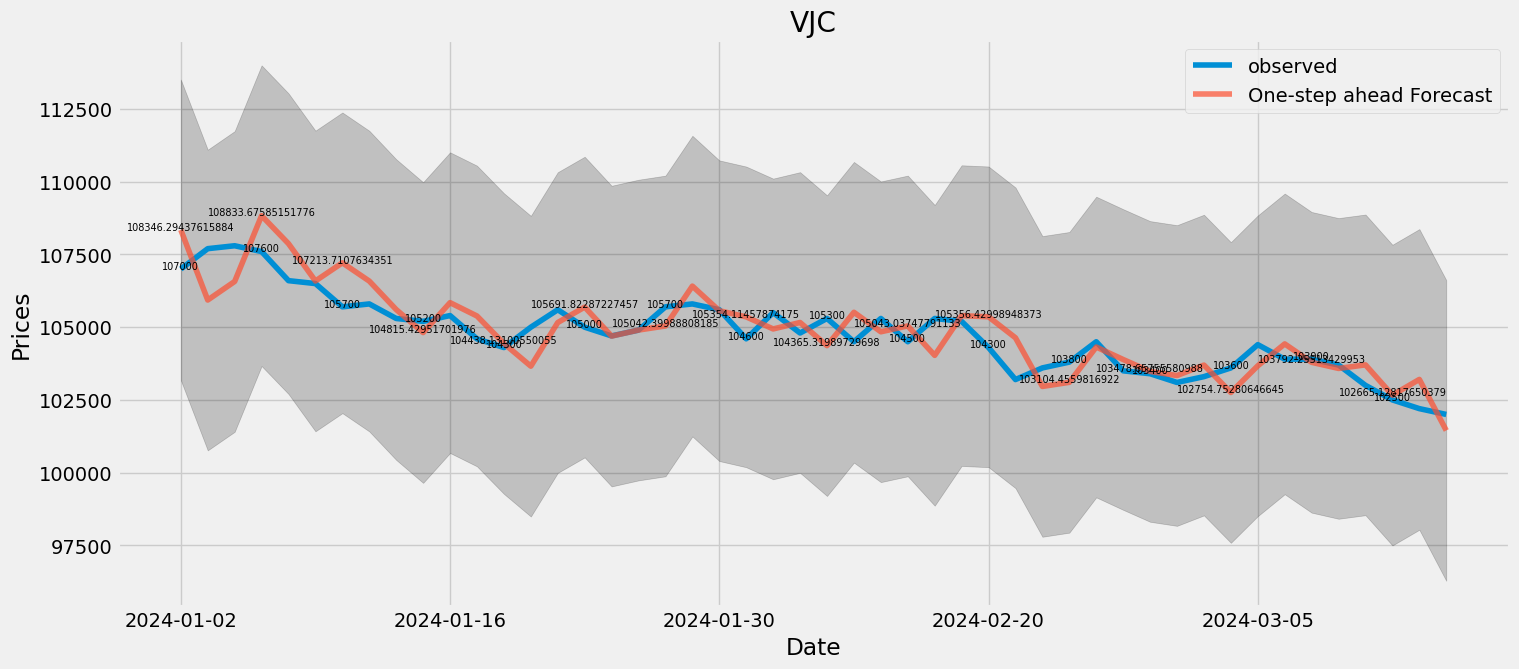

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.75884D+00    |proj g|=  3.45767D-01


 This problem is unconstrained.



At iterate    5    f=  8.73284D+00    |proj g|=  2.39102D-02

At iterate   10    f=  8.73256D+00    |proj g|=  3.00731D-03

At iterate   15    f=  8.73191D+00    |proj g|=  3.87022D-02

At iterate   20    f=  8.72999D+00    |proj g|=  1.24901D-03

At iterate   25    f=  8.72999D+00    |proj g|=  3.69844D-04

At iterate   30    f=  8.72995D+00    |proj g|=  6.53201D-03

At iterate   35    f=  8.71757D+00    |proj g|=  5.19238D-02

At iterate   40    f=  8.71014D+00    |proj g|=  1.18158D-02

At iterate   45    f=  8.69940D+00    |proj g|=  1.50166D-02

At iterate   50    f=  8.69897D+00    |proj g|=  5.39741D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

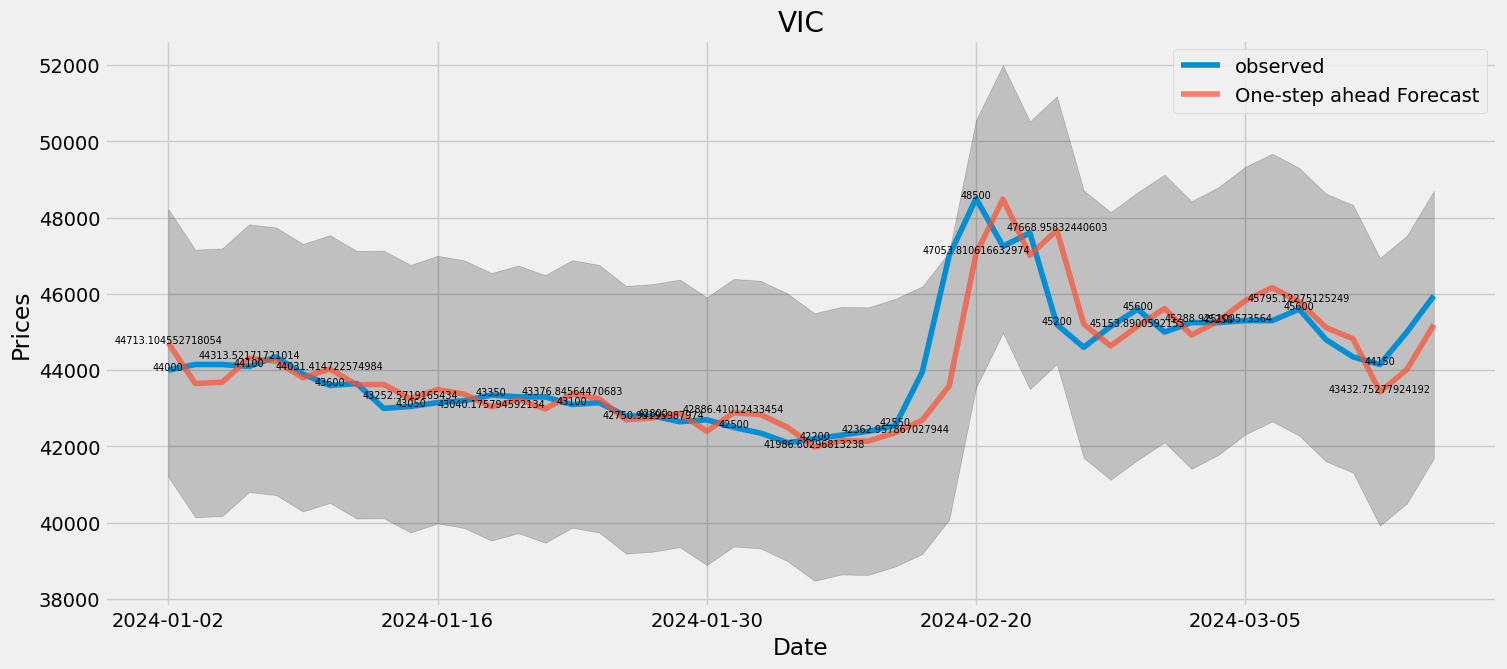

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33066D+00    |proj g|=  9.13797D-02

At iterate    5    f=  8.32118D+00    |proj g|=  3.30329D-03

At iterate   10    f=  8.32101D+00    |proj g|=  9.23507D-03

At iterate   15    f=  8.32088D+00    |proj g|=  1.46713D-03

At iterate   20    f=  8.31637D+00    |proj g|=  4.58155D-02

At iterate   25    f=  8.27502D+00    |proj g|=  5.49648D-02

At iterate   30    f=  8.22544D+00    |proj g|=  1.49738D-02

At iterate   35    f=  8.22270D+00    |proj g|=  4.72791D-03

At iterate   40    f=  8.22261D+00    |proj g|=  1.97684D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

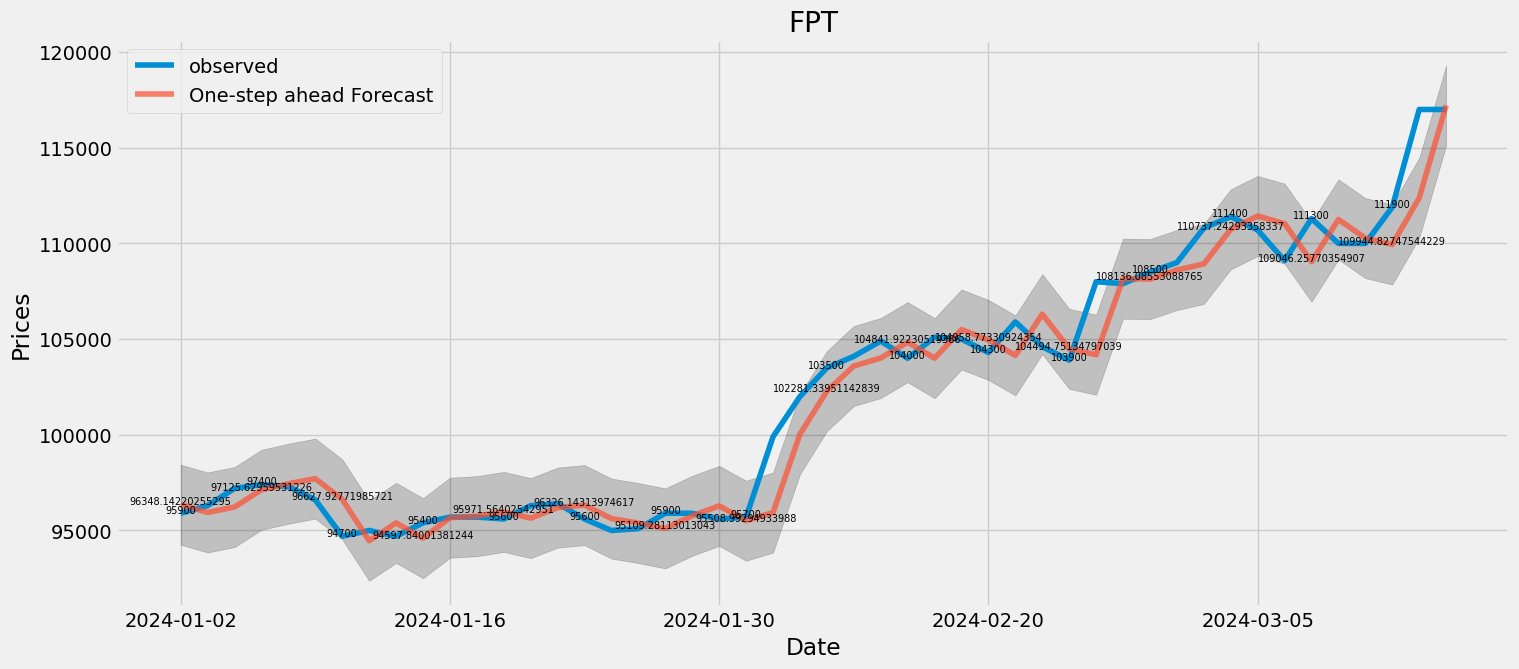

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68169D+00    |proj g|=  9.95252D-02


 This problem is unconstrained.



At iterate    5    f=  7.65588D+00    |proj g|=  1.85673D-02

At iterate   10    f=  7.65555D+00    |proj g|=  4.13176D-03

At iterate   15    f=  7.65521D+00    |proj g|=  9.31577D-03

At iterate   20    f=  7.65515D+00    |proj g|=  2.25895D-03

At iterate   25    f=  7.65131D+00    |proj g|=  4.28044D-02

At iterate   30    f=  7.55824D+00    |proj g|=  8.44232D-02

At iterate   35    f=  7.55560D+00    |proj g|=  1.47090D-02

At iterate   40    f=  7.55498D+00    |proj g|=  1.43339D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     54      1     0     0   4.542D-06   7.555D+00
  F =   7.55498384734

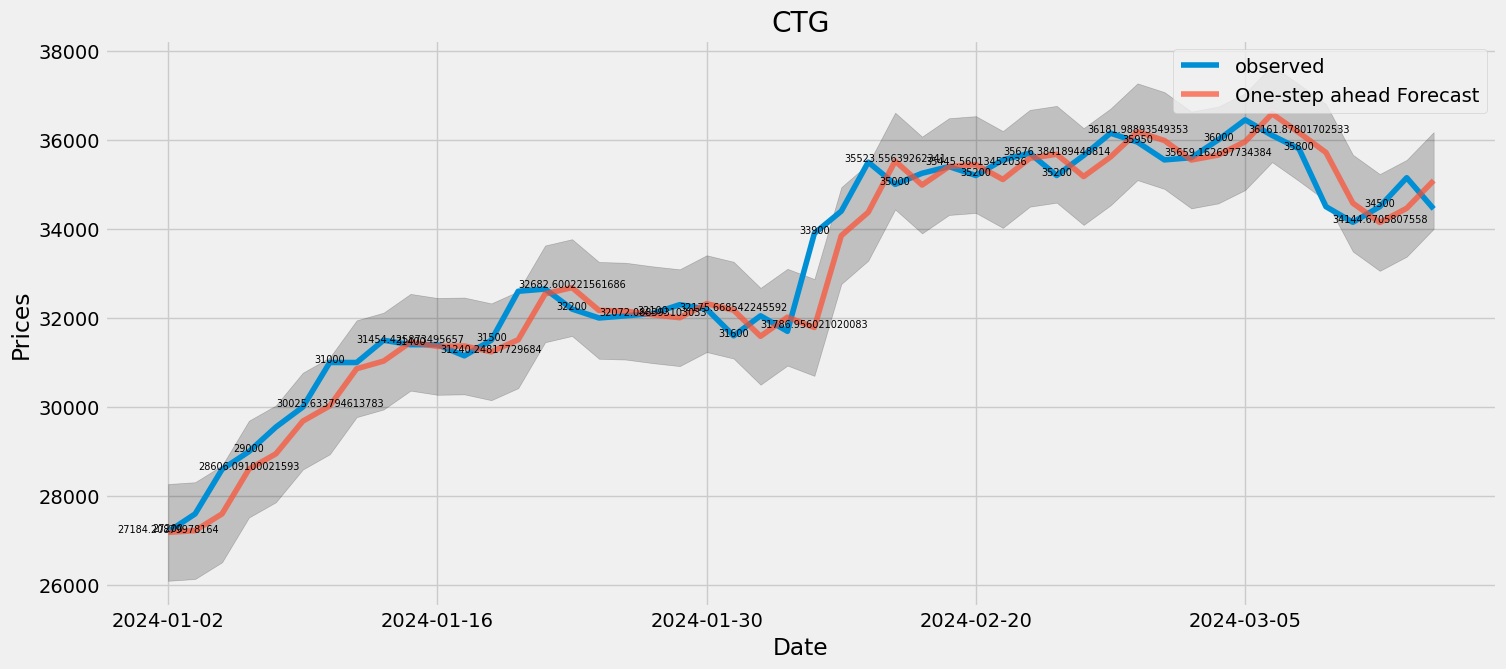

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30596D+00    |proj g|=  1.17902D-01

At iterate    5    f=  7.27807D+00    |proj g|=  2.39168D-02

At iterate   10    f=  7.27775D+00    |proj g|=  4.26493D-03

At iterate   15    f=  7.27753D+00    |proj g|=  4.66255D-03

At iterate   20    f=  7.27734D+00    |proj g|=  2.55633D-02

At iterate   25    f=  7.25776D+00    |proj g|=  1.58473D-01

At iterate   30    f=  7.20739D+00    |proj g|=  1.14521D-01

At iterate   35    f=  7.19955D+00    |proj g|=  2.46004D-03

At iterate   40    f=  7.19952D+00    |proj g|=  1.73037D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

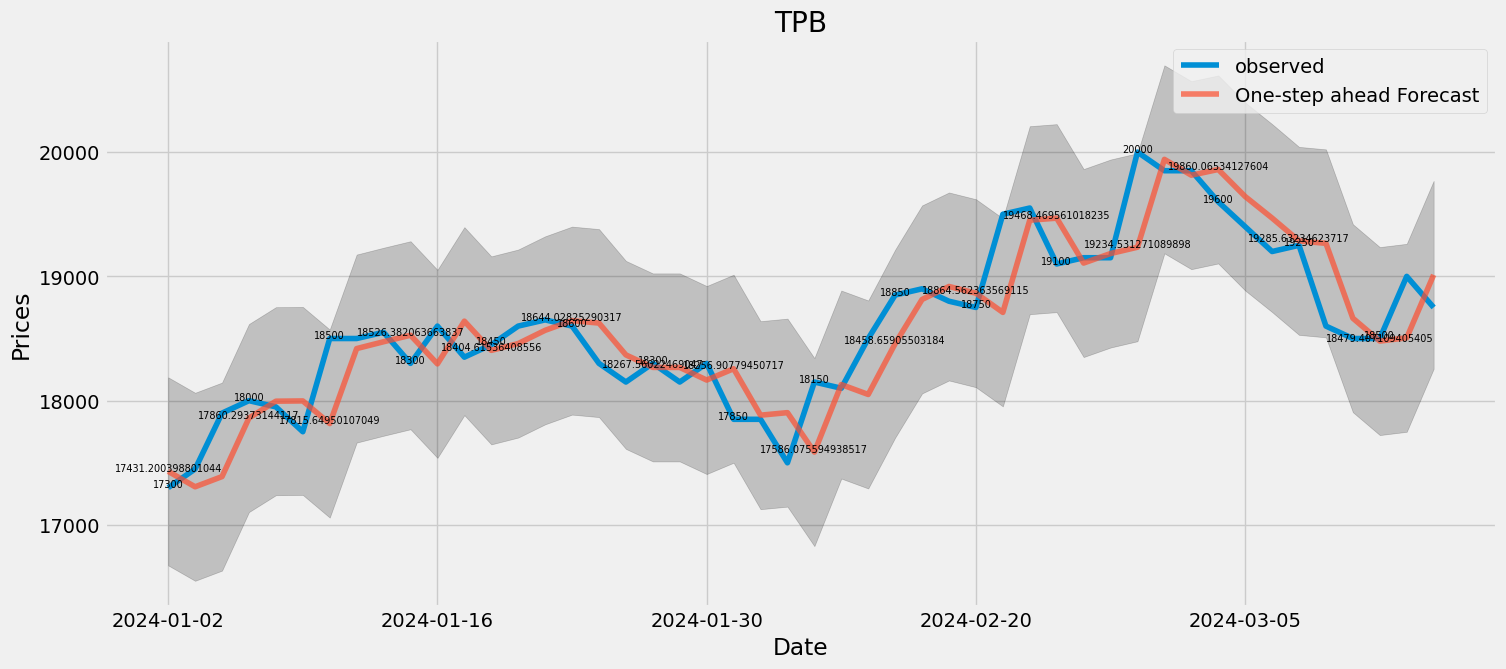

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33275D+00    |proj g|=  5.57929D-02

At iterate    5    f=  8.33117D+00    |proj g|=  1.05184D-03

At iterate   10    f=  8.33107D+00    |proj g|=  5.65551D-04

At iterate   15    f=  8.32829D+00    |proj g|=  2.86307D-02

At iterate   20    f=  8.32750D+00    |proj g|=  1.47377D-02

At iterate   25    f=  8.30697D+00    |proj g|=  9.17360D-02

At iterate   30    f=  8.25901D+00    |proj g|=  3.50448D-02

At iterate   35    f=  8.25255D+00    |proj g|=  2.16106D-02

At iterate   40    f=  8.25228D+00    |proj g|=  2.63177D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

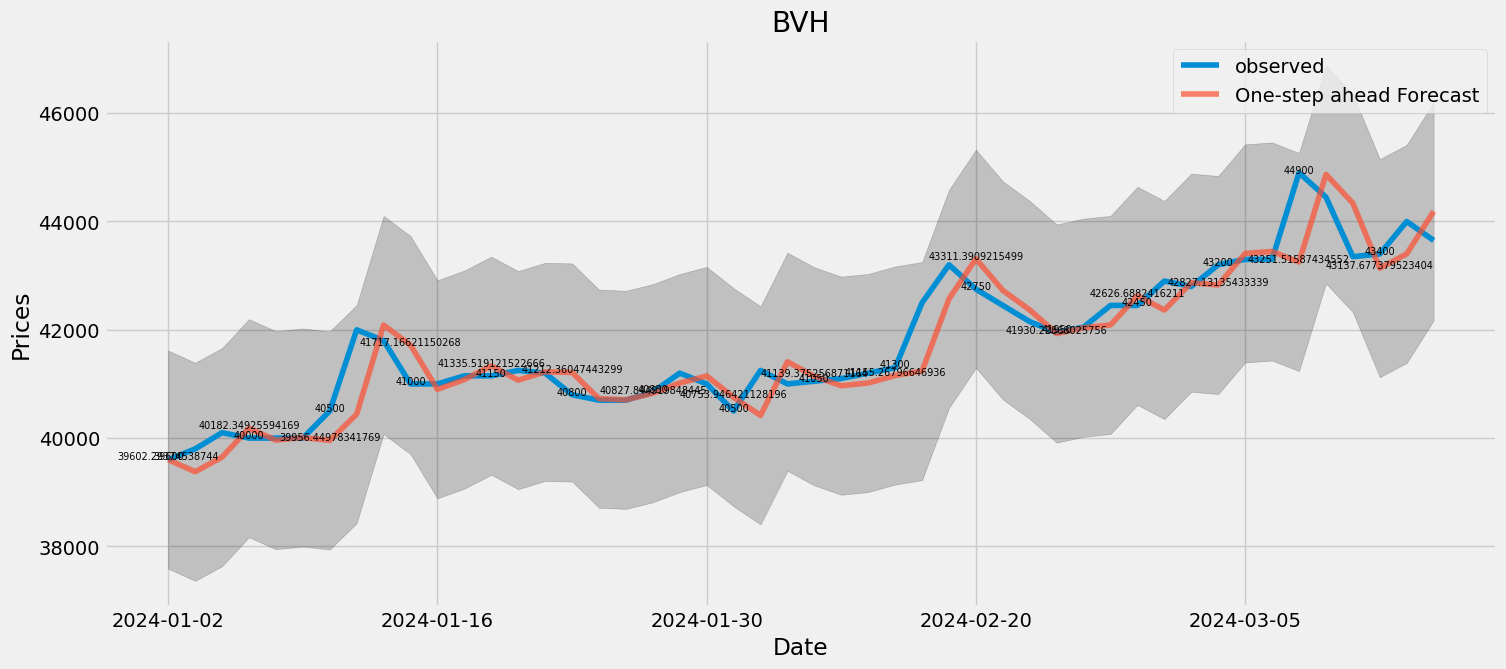

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.83291D+00    |proj g|=  1.22188D-01


 This problem is unconstrained.



At iterate    5    f=  7.81386D+00    |proj g|=  1.18072D-03

At iterate   10    f=  7.81382D+00    |proj g|=  7.22098D-03

At iterate   15    f=  7.81373D+00    |proj g|=  8.54784D-04

At iterate   20    f=  7.81354D+00    |proj g|=  1.64484D-02

At iterate   25    f=  7.80524D+00    |proj g|=  7.46312D-02

At iterate   30    f=  7.78382D+00    |proj g|=  1.91531D-01

At iterate   35    f=  7.72039D+00    |proj g|=  7.07461D-02

At iterate   40    f=  7.71695D+00    |proj g|=  2.47652D-02

At iterate   45    f=  7.71188D+00    |proj g|=  4.88414D-02

At iterate   50    f=  7.70996D+00    |proj g|=  3.42181D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

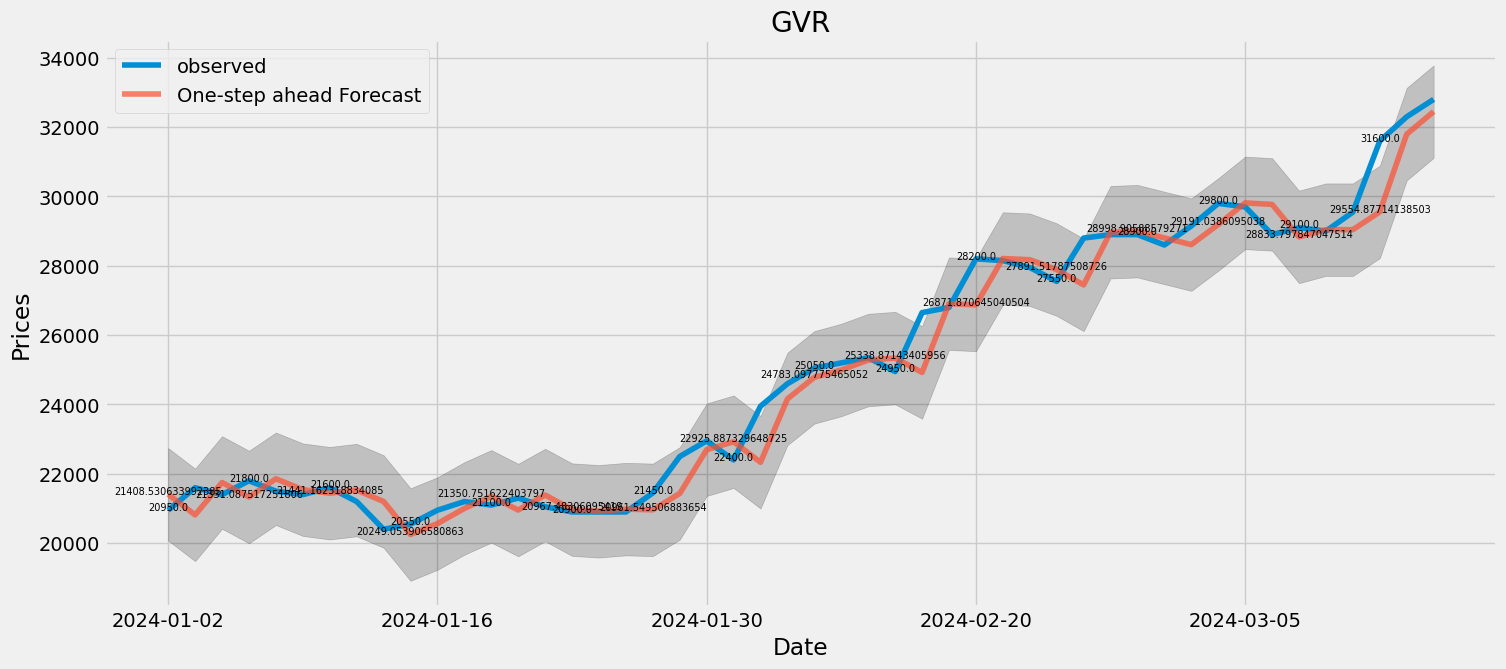

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68754D+00    |proj g|=  3.25595D-01


 This problem is unconstrained.



At iterate    5    f=  8.65853D+00    |proj g|=  3.11364D-02

At iterate   10    f=  8.65787D+00    |proj g|=  4.57554D-03

At iterate   15    f=  8.65731D+00    |proj g|=  6.44525D-03

At iterate   20    f=  8.65521D+00    |proj g|=  9.72053D-03

At iterate   25    f=  8.65505D+00    |proj g|=  1.51775D-04

At iterate   30    f=  8.65500D+00    |proj g|=  4.26273D-03

At iterate   35    f=  8.65132D+00    |proj g|=  6.44743D-02

At iterate   40    f=  8.62221D+00    |proj g|=  2.38066D-02

At iterate   45    f=  8.62198D+00    |proj g|=  7.68152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     59   

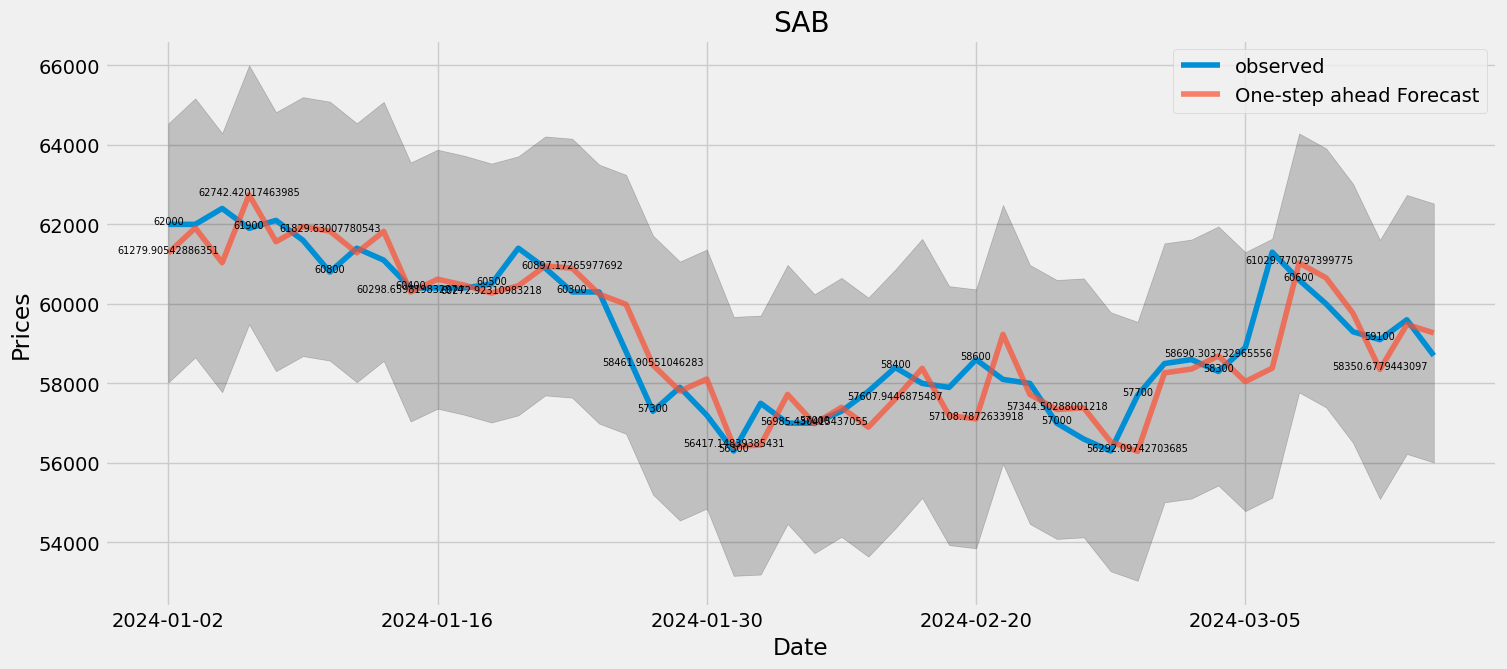

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51944D+00    |proj g|=  1.31999D-01


 This problem is unconstrained.



At iterate    5    f=  8.49835D+00    |proj g|=  8.11392D-03

At iterate   10    f=  8.49682D+00    |proj g|=  2.32084D-02

At iterate   15    f=  8.49649D+00    |proj g|=  2.62133D-04

At iterate   20    f=  8.49638D+00    |proj g|=  1.12669D-02

At iterate   25    f=  8.48897D+00    |proj g|=  1.02709D-01

At iterate   30    f=  8.42490D+00    |proj g|=  1.07294D-01

At iterate   35    f=  8.41449D+00    |proj g|=  2.47339D-02

At iterate   40    f=  8.41211D+00    |proj g|=  7.25660D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     53      1     0     0   4.868D-05   8.412D+00
  F =   8.41211353838

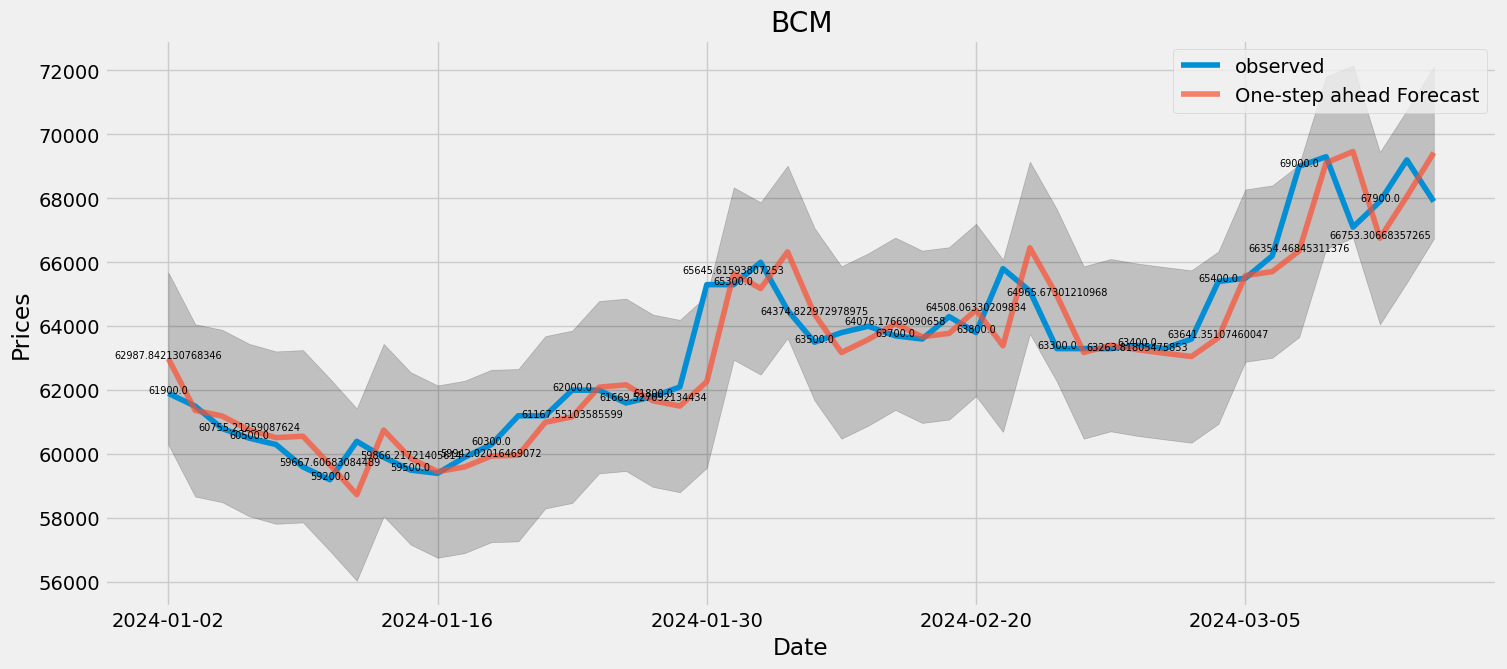

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20548D+00    |proj g|=  1.02278D-01


 This problem is unconstrained.



At iterate    5    f=  7.17987D+00    |proj g|=  5.04342D-02

At iterate   10    f=  7.17695D+00    |proj g|=  4.08542D-03

At iterate   15    f=  7.17508D+00    |proj g|=  6.60332D-02

At iterate   20    f=  7.17224D+00    |proj g|=  7.02498D-03

At iterate   25    f=  7.16568D+00    |proj g|=  4.46426D-02

At iterate   30    f=  7.13380D+00    |proj g|=  3.17189D-02

At iterate   35    f=  7.10962D+00    |proj g|=  1.63877D-01

At iterate   40    f=  7.08715D+00    |proj g|=  1.23258D-02

At iterate   45    f=  7.08604D+00    |proj g|=  5.54245D-03

At iterate   50    f=  7.08602D+00    |proj g|=  9.11981D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

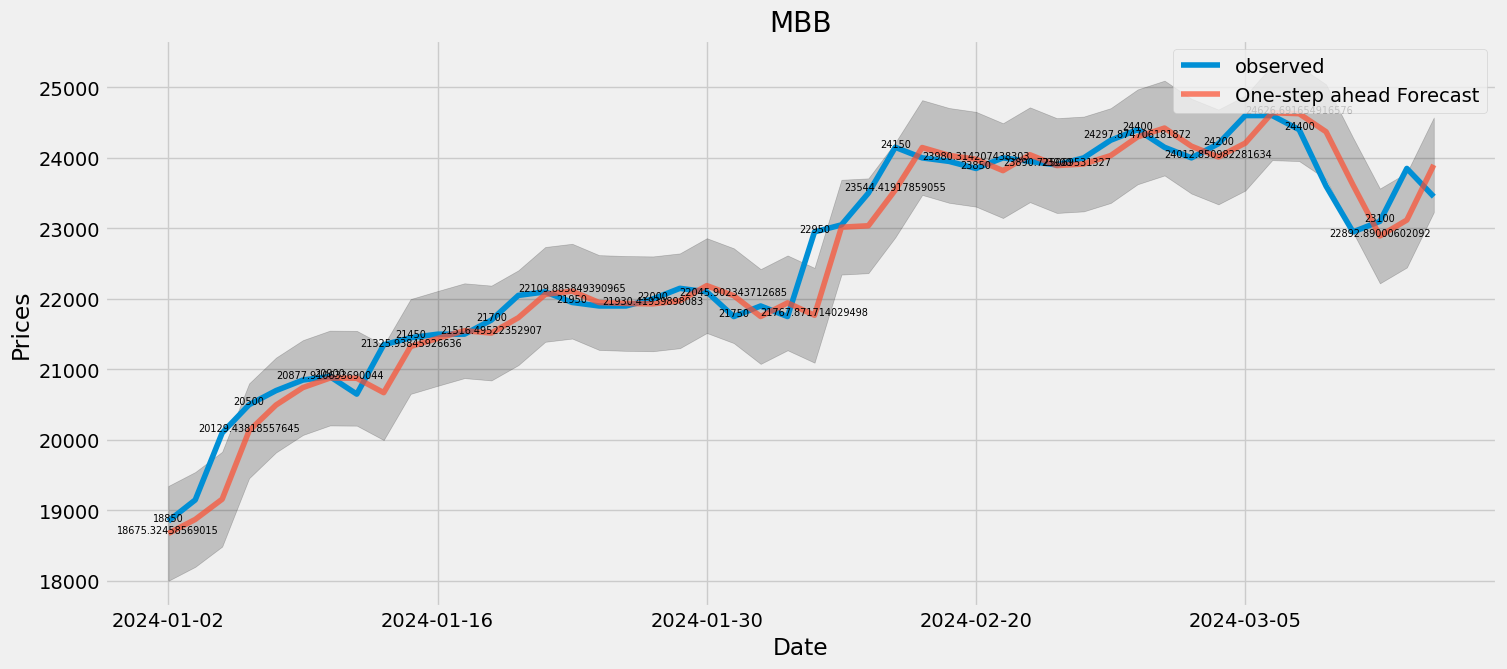

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77696D+00    |proj g|=  2.61026D-01


 This problem is unconstrained.



At iterate    5    f=  8.76099D+00    |proj g|=  1.60808D-02

At iterate   10    f=  8.75821D+00    |proj g|=  1.87904D-02

At iterate   15    f=  8.75783D+00    |proj g|=  1.59811D-04

At iterate   20    f=  8.75782D+00    |proj g|=  1.49611D-03

At iterate   25    f=  8.75742D+00    |proj g|=  2.21380D-02

At iterate   30    f=  8.72838D+00    |proj g|=  1.13004D-01

At iterate   35    f=  8.70515D+00    |proj g|=  8.04763D-03

At iterate   40    f=  8.70456D+00    |proj g|=  2.14845D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     48      1     0     0   2.148D-05   8.705D+00
  F =   8.70455949191

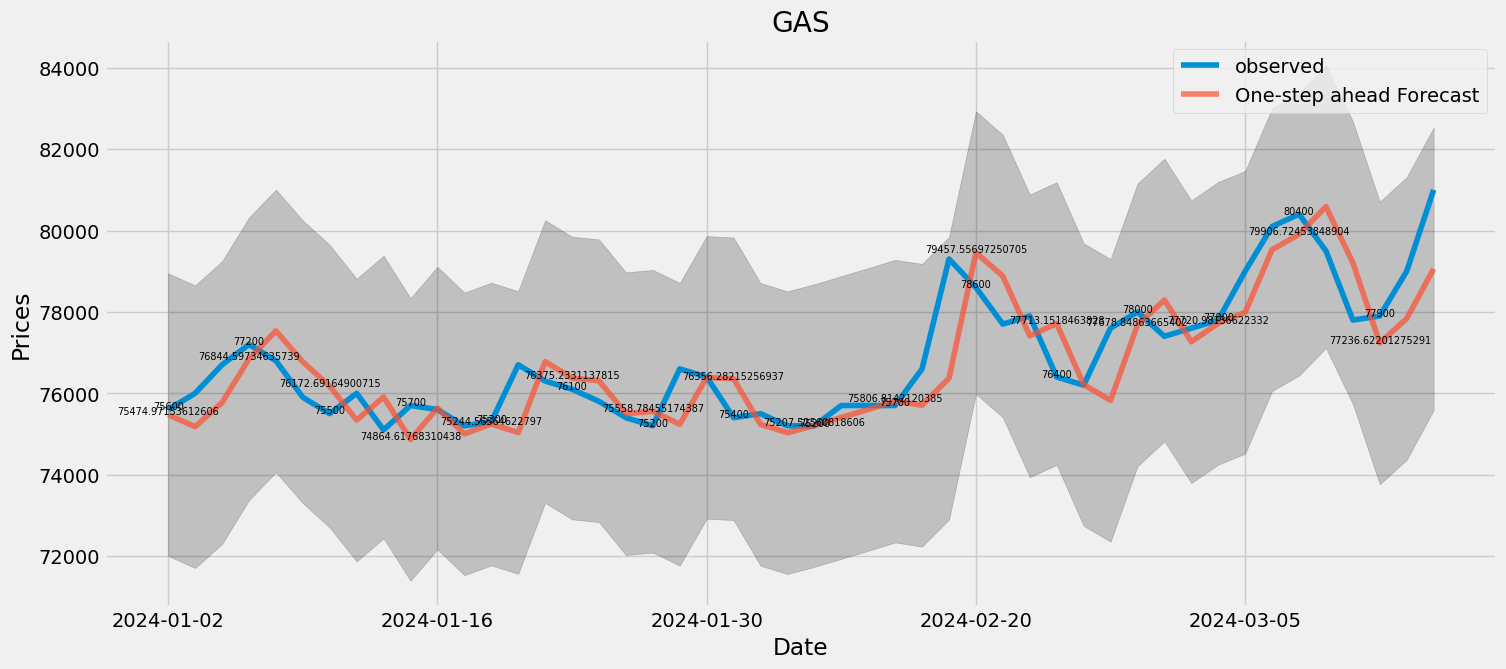

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42343D+00    |proj g|=  8.60486D-02

At iterate    5    f=  5.40040D+00    |proj g|=  8.34526D-02

At iterate   10    f=  5.39856D+00    |proj g|=  4.23237D-03

At iterate   15    f=  5.39757D+00    |proj g|=  8.67782D-03

At iterate   20    f=  5.39740D+00    |proj g|=  1.06277D-03

At iterate   25    f=  5.39710D+00    |proj g|=  1.88579D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  5.39136D+00    |proj g|=  2.06104D-02

At iterate   35    f=  5.39119D+00    |proj g|=  4.06676D-03

At iterate   40    f=  5.39042D+00    |proj g|=  1.07972D-02

At iterate   45    f=  5.39010D+00    |proj g|=  7.70621D-04

At iterate   50    f=  5.38969D+00    |proj g|=  1.84193D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     83      2     0     0   1.842D-02   5.390D+00
  F =   5.3896926433712959     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

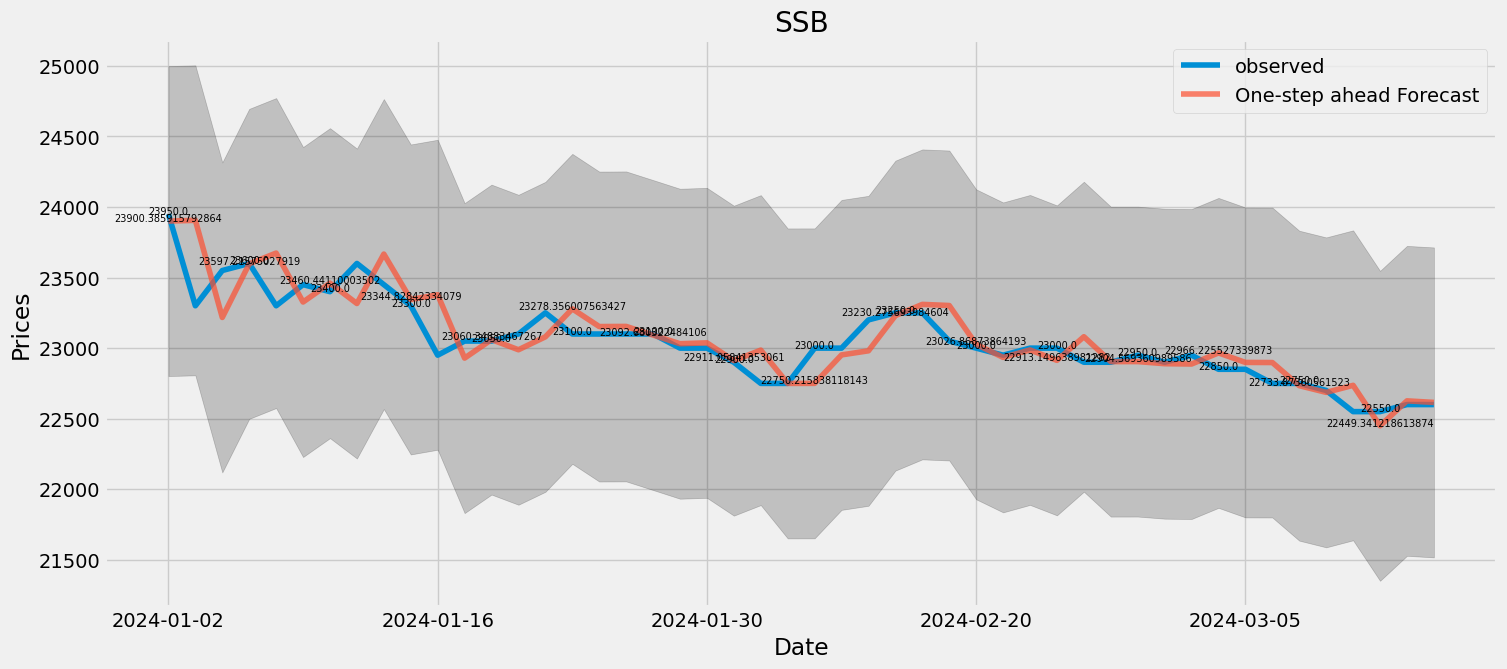

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12744D+00    |proj g|=  1.19333D-01


 This problem is unconstrained.



At iterate    5    f=  7.09198D+00    |proj g|=  6.14152D-02

At iterate   10    f=  7.08802D+00    |proj g|=  1.41372D-03

At iterate   15    f=  7.08774D+00    |proj g|=  1.61439D-02

At iterate   20    f=  7.08738D+00    |proj g|=  1.95347D-02

At iterate   25    f=  7.07138D+00    |proj g|=  1.40889D-01

At iterate   30    f=  7.02016D+00    |proj g|=  2.39494D-01

At iterate   35    f=  7.01433D+00    |proj g|=  4.60683D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     64      1     0     0   5.307D-05   7.014D+00
  F =   7.0143138348086742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

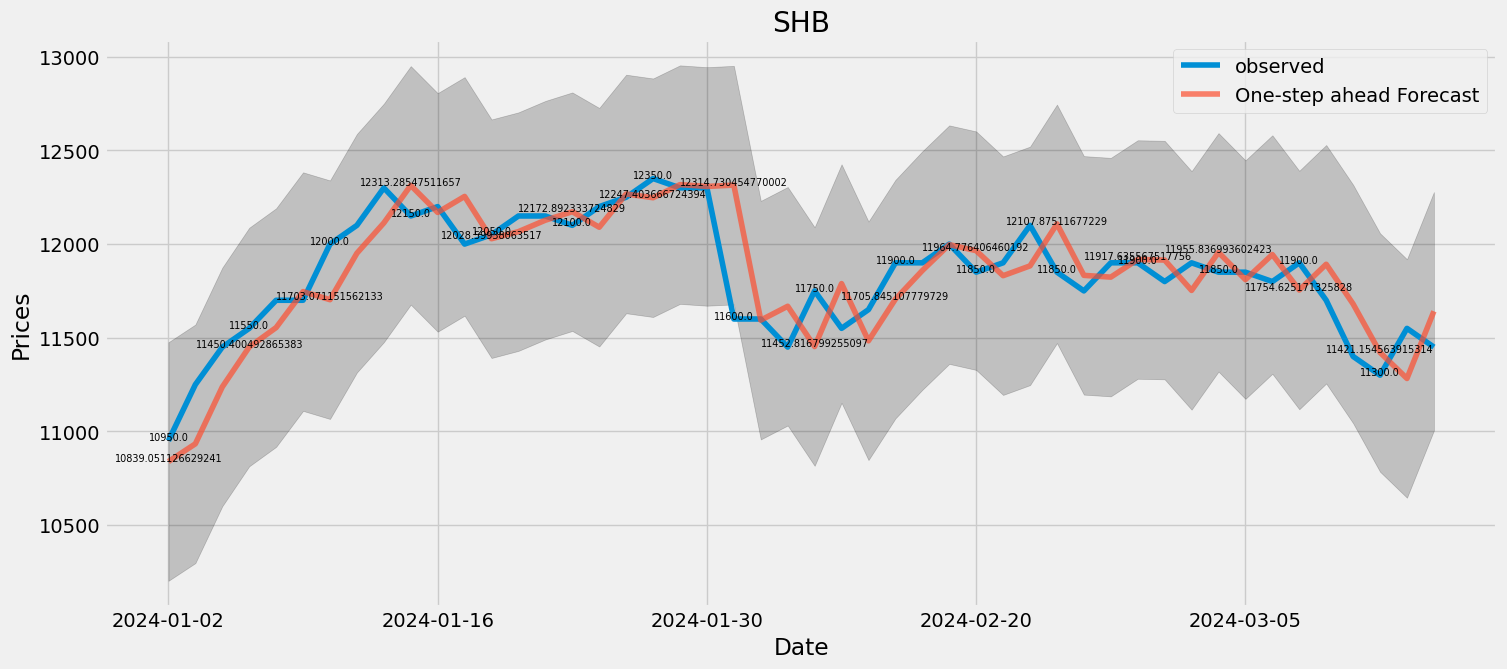

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91077D+00    |proj g|=  1.53216D-01


 This problem is unconstrained.



At iterate    5    f=  7.88899D+00    |proj g|=  4.08979D-03

At iterate   10    f=  7.88897D+00    |proj g|=  1.28208D-03

At iterate   15    f=  7.88860D+00    |proj g|=  1.49455D-02

At iterate   20    f=  7.88797D+00    |proj g|=  3.55033D-03

At iterate   25    f=  7.88794D+00    |proj g|=  3.29211D-03

At iterate   30    f=  7.88618D+00    |proj g|=  2.60213D-02

At iterate   35    f=  7.88107D+00    |proj g|=  2.05919D-02

At iterate   40    f=  7.83841D+00    |proj g|=  2.25837D-01

At iterate   45    f=  7.80807D+00    |proj g|=  7.92529D-03

At iterate   50    f=  7.80763D+00    |proj g|=  8.98050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

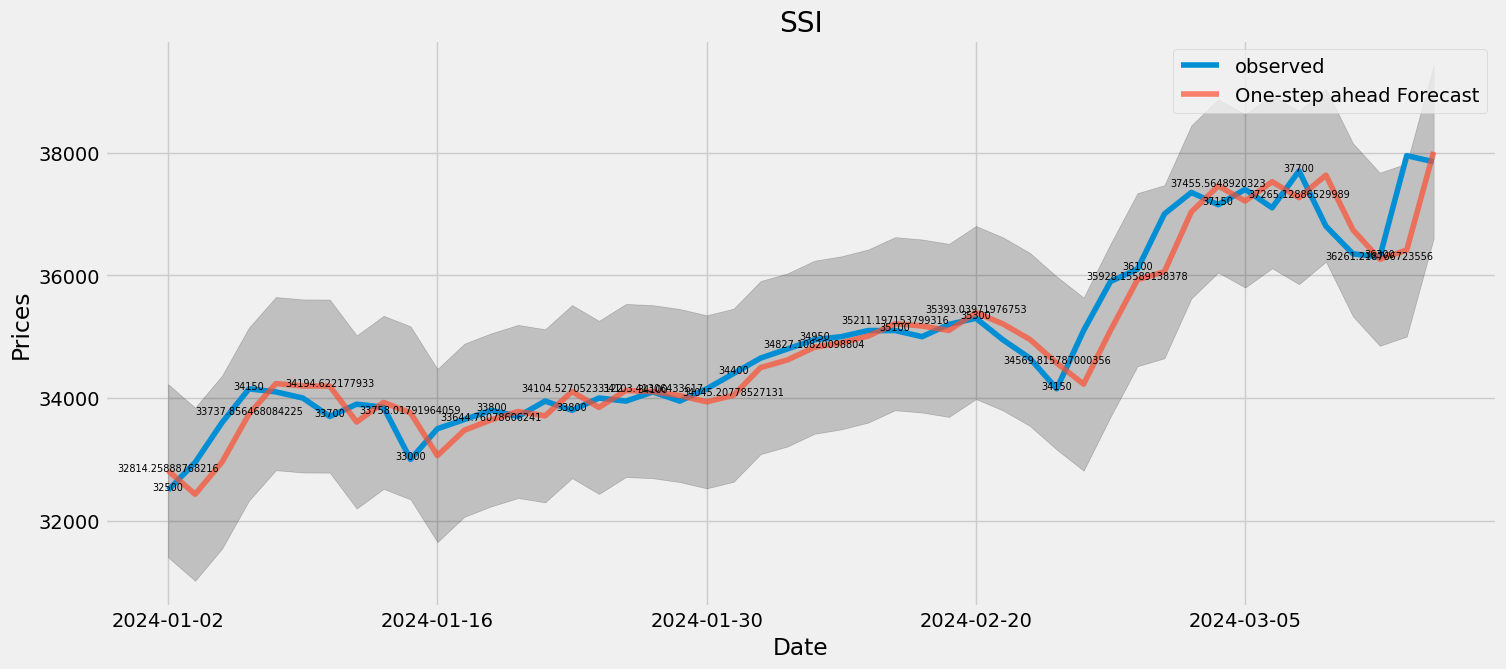

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75485D+00    |proj g|=  1.18245D-01


 This problem is unconstrained.



At iterate    5    f=  7.72443D+00    |proj g|=  3.17557D-02

At iterate   10    f=  7.72402D+00    |proj g|=  1.66394D-03

At iterate   15    f=  7.72383D+00    |proj g|=  5.08588D-03

At iterate   20    f=  7.72338D+00    |proj g|=  1.20212D-02

At iterate   25    f=  7.67729D+00    |proj g|=  2.35806D-01

At iterate   30    f=  7.63707D+00    |proj g|=  4.09368D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     42      1     0     0   1.772D-05   7.637D+00
  F =   7.6370677129058908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>

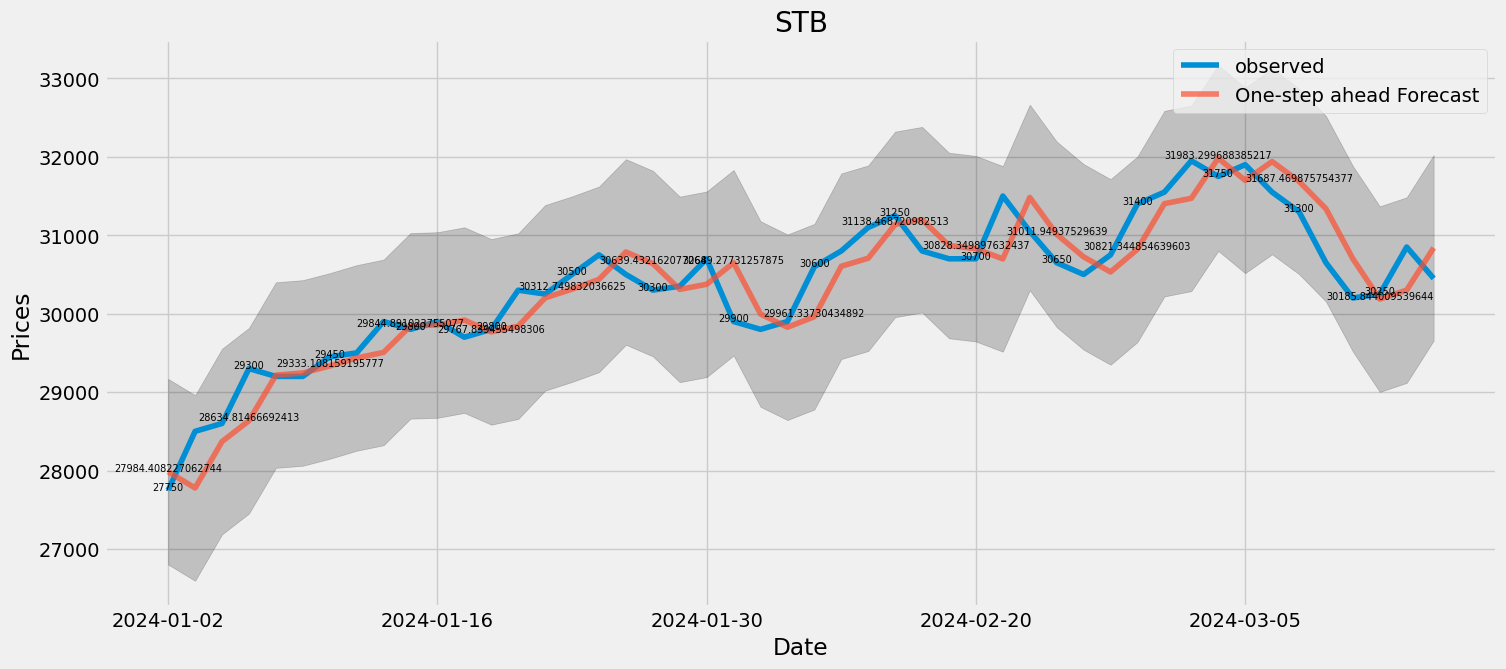

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32653D+00    |proj g|=  1.32050D-01


 This problem is unconstrained.



At iterate    5    f=  7.29567D+00    |proj g|=  4.21113D-02

At iterate   10    f=  7.29343D+00    |proj g|=  4.73045D-03

At iterate   15    f=  7.29289D+00    |proj g|=  2.82940D-03

At iterate   20    f=  7.29262D+00    |proj g|=  1.06515D-03

At iterate   25    f=  7.29250D+00    |proj g|=  6.48844D-03

At iterate   30    f=  7.29059D+00    |proj g|=  4.12225D-02

At iterate   35    f=  7.19291D+00    |proj g|=  1.05927D-01

At iterate   40    f=  7.19072D+00    |proj g|=  4.14283D-03

At iterate   45    f=  7.19066D+00    |proj g|=  1.61807D-03

At iterate   50    f=  7.19065D+00    |proj g|=  1.23102D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

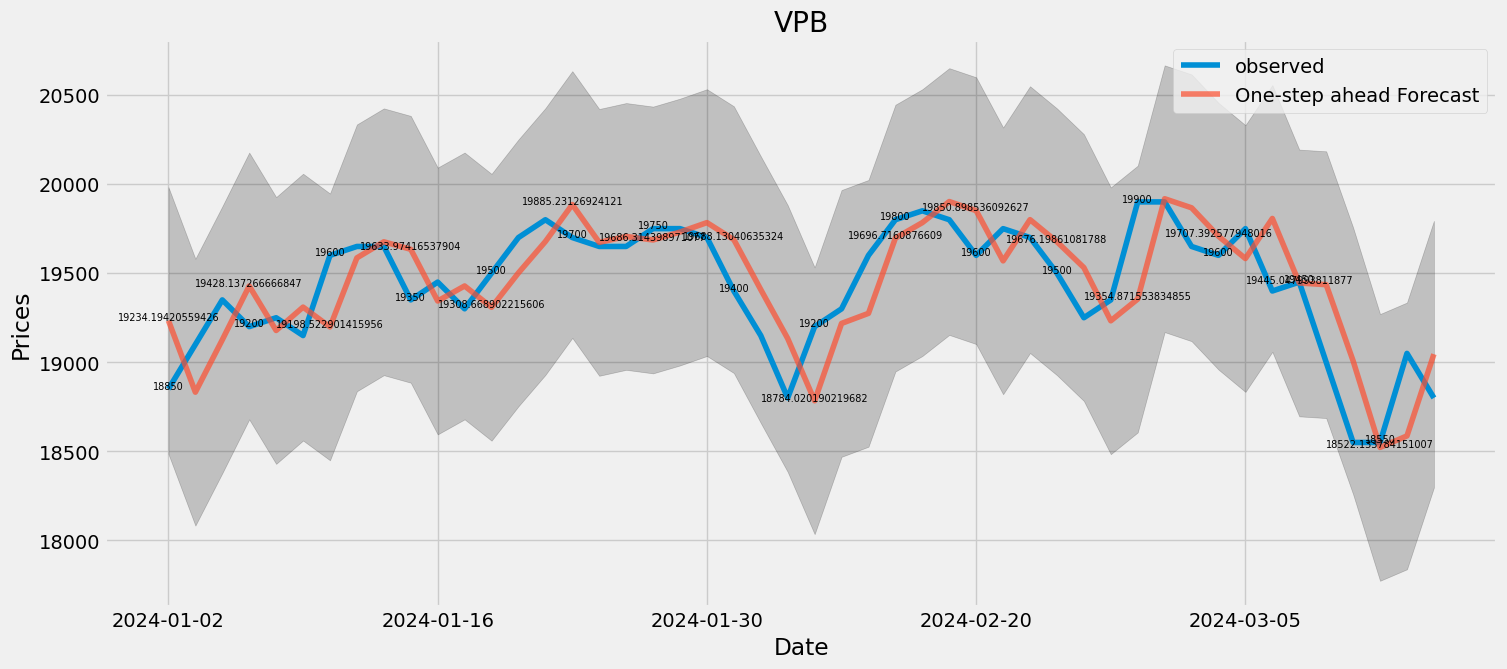

In [9]:
for stock in df.columns:
    results = one_day(stock)

    pred = results.get_prediction(start='2024-01-02', dynamic=False)
    pred_ci = pred.conf_int()

    ax = df[stock]['2024':].plot(label='observed', figsize=(16,7))
    pred_plot = pred.predicted_mean
    pred_plot.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    
    addlabels(df[stock]['2024':], df[stock]['2024':], pred_plot)

    ax.set_title(stock)
    ax.set_xlabel('Date')
    ax.set_ylabel('Prices')
    plt.legend()
    plt.show()

In [10]:
y_forecasted = pred.predicted_mean
y_truth = df['ACB']['2024':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 52035136.5


In [14]:
def Forcast(stock):
    mod = sm.tsa.statespace.SARIMAX(df[stock][:'2024-01-02'],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    return mod.fit()
    


In [18]:
def plot_forcast(stock, results, steps):
    # Get forecast 500 steps ahead in future
    pred_uc = results.get_forecast(steps)

    # Get confidence intervals of forecasts
    pred_uci = pred_uc.conf_int()

    ax = df[stock].plot(label='observed', figsize=(16, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_uci.index,
                    pred_uci.iloc[:, 0],
                    pred_uci.iloc[:, 1], color='k', alpha=.25)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Prices')
    plt.title(stock)
    plt.legend()
    plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24289D+00    |proj g|=  1.22209D-01


 This problem is unconstrained.



At iterate    5    f=  7.21629D+00    |proj g|=  4.06060D-02

At iterate   10    f=  7.21436D+00    |proj g|=  9.70542D-04

At iterate   15    f=  7.21387D+00    |proj g|=  1.72678D-02

At iterate   20    f=  7.21003D+00    |proj g|=  3.91930D-02

At iterate   25    f=  7.20942D+00    |proj g|=  2.25265D-03

At iterate   30    f=  7.20687D+00    |proj g|=  3.29016D-02

At iterate   35    f=  7.18394D+00    |proj g|=  1.20684D-01

At iterate   40    f=  7.11371D+00    |proj g|=  7.57533D-02

At iterate   45    f=  7.11121D+00    |proj g|=  9.22306D-04

At iterate   50    f=  7.11121D+00    |proj g|=  1.28662D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

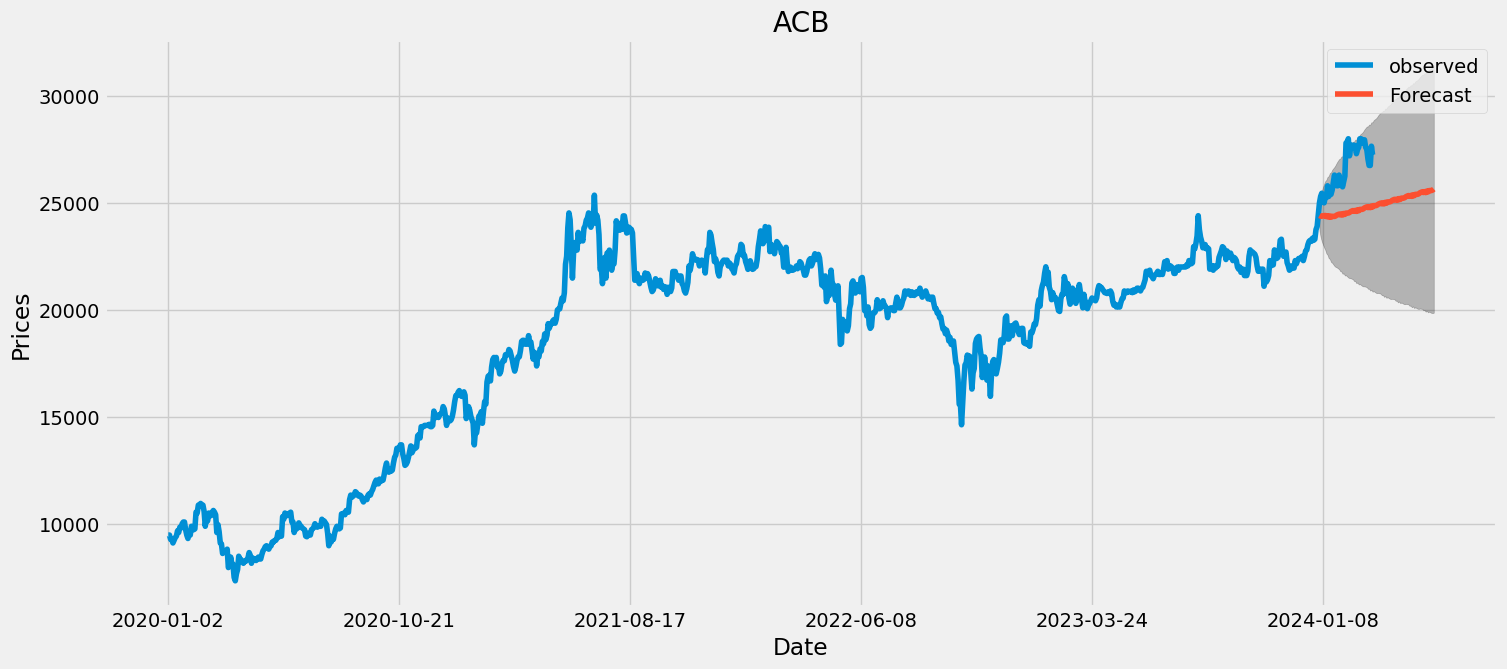

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41794D+00    |proj g|=  7.07436D-02


 This problem is unconstrained.



At iterate    5    f=  8.41256D+00    |proj g|=  5.12883D-03

At iterate   10    f=  8.41221D+00    |proj g|=  9.79836D-03

At iterate   15    f=  8.41213D+00    |proj g|=  1.71409D-03

At iterate   20    f=  8.41138D+00    |proj g|=  2.65663D-02

At iterate   25    f=  8.35615D+00    |proj g|=  1.90250D-01

At iterate   30    f=  8.32666D+00    |proj g|=  2.44405D-02

At iterate   35    f=  8.32598D+00    |proj g|=  5.90005D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     40      1     0     0   5.207D-05   8.326D+00
  F =   8.3259748079535250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

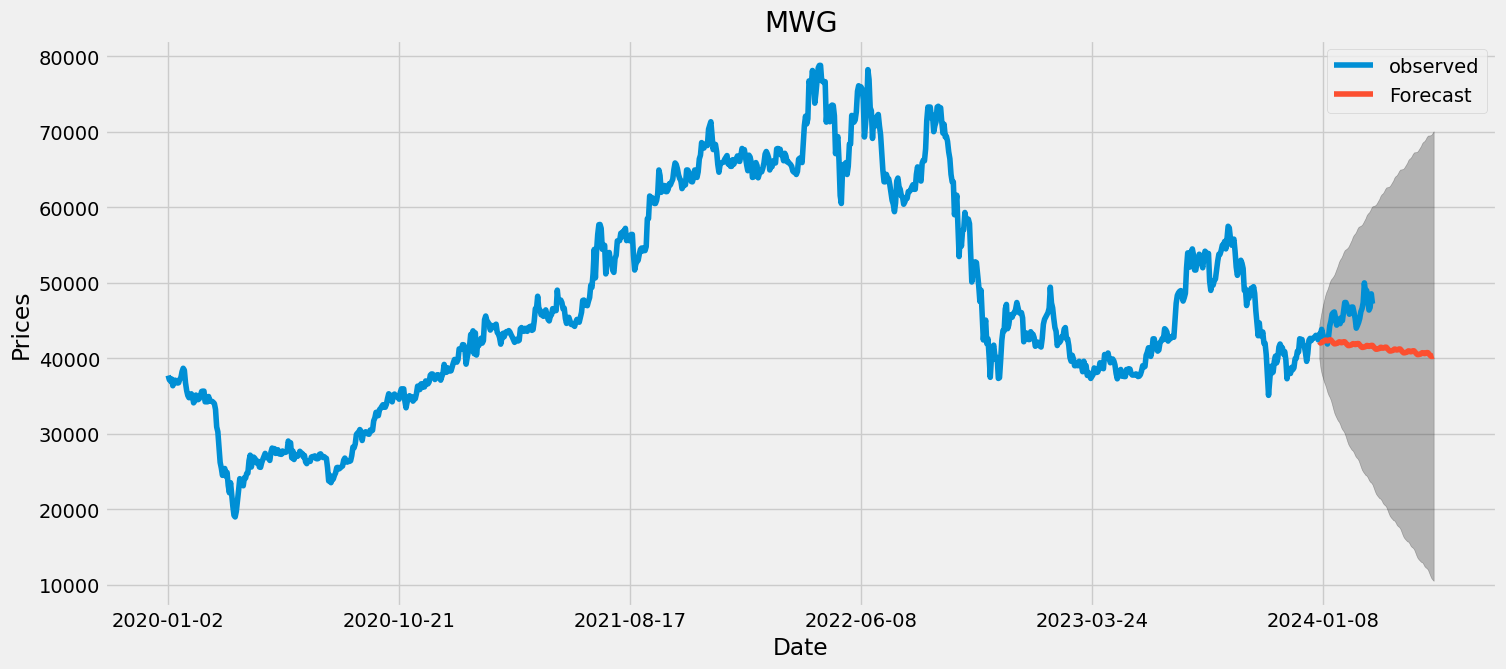

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.98584D+00    |proj g|=  4.79617D-02


 This problem is unconstrained.



At iterate    5    f=  8.98363D+00    |proj g|=  2.00012D-04

At iterate   10    f=  8.98363D+00    |proj g|=  1.38646D-03
  ys=-2.424E-04  -gs= 1.543E-04 BFGS update SKIPPED

At iterate   15    f=  8.98130D+00    |proj g|=  2.88368D-02

At iterate   20    f=  8.98083D+00    |proj g|=  1.00800D-03

At iterate   25    f=  8.98083D+00    |proj g|=  1.80436D-03

At iterate   30    f=  8.98060D+00    |proj g|=  2.53291D-02

At iterate   35    f=  8.95932D+00    |proj g|=  1.95940D-01

At iterate   40    f=  8.93138D+00    |proj g|=  8.91425D-03

At iterate   45    f=  8.93064D+00    |proj g|=  3.82318D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

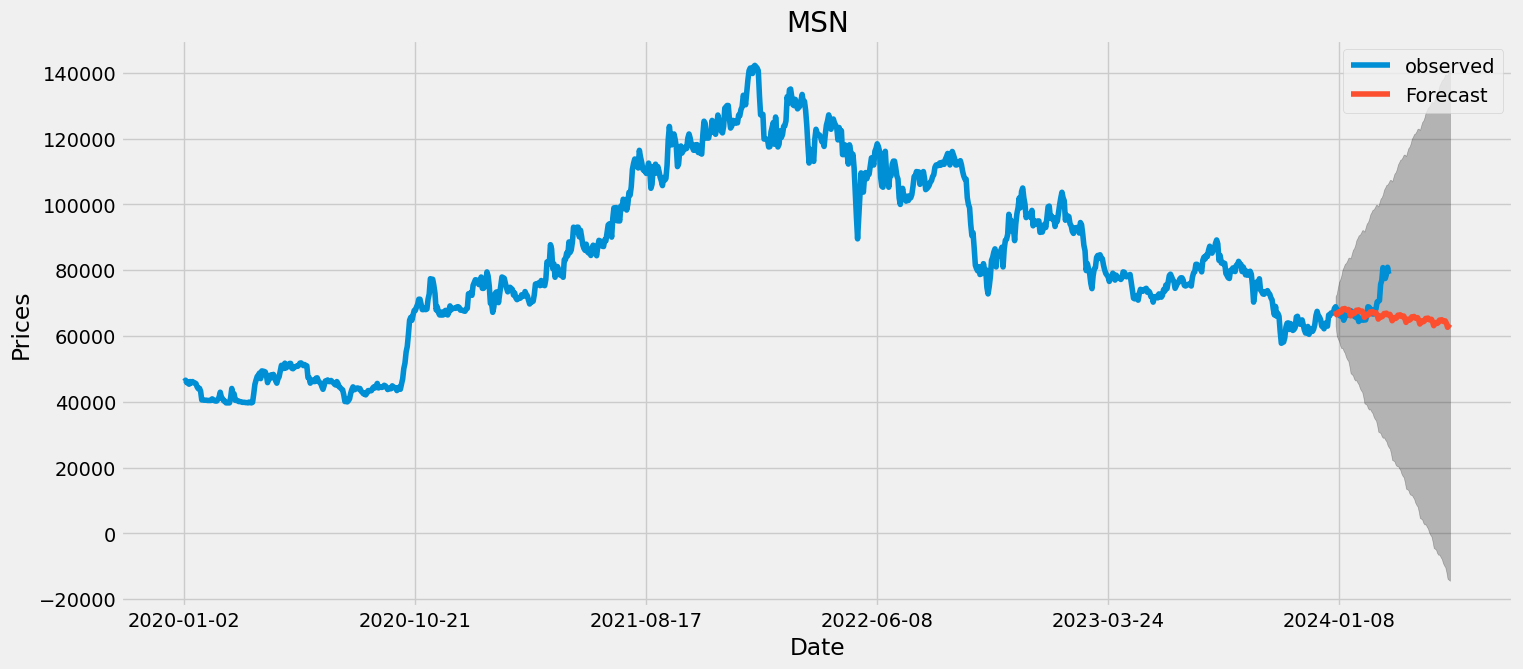

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94459D+00    |proj g|=  7.84244D-02

At iterate    5    f=  7.93375D+00    |proj g|=  1.48071D-02

At iterate   10    f=  7.93296D+00    |proj g|=  1.09845D-02

At iterate   15    f=  7.93273D+00    |proj g|=  1.48902D-03

At iterate   20    f=  7.93240D+00    |proj g|=  2.37840D-02

At iterate   25    f=  7.91697D+00    |proj g|=  1.42432D-01

At iterate   30    f=  7.84356D+00    |proj g|=  9.65533D-02

At iterate   35    f=  7.83837D+00    |proj g|=  1.54108D-02

At iterate   40    f=  7.82994D+00    |proj g|=  1.62797D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

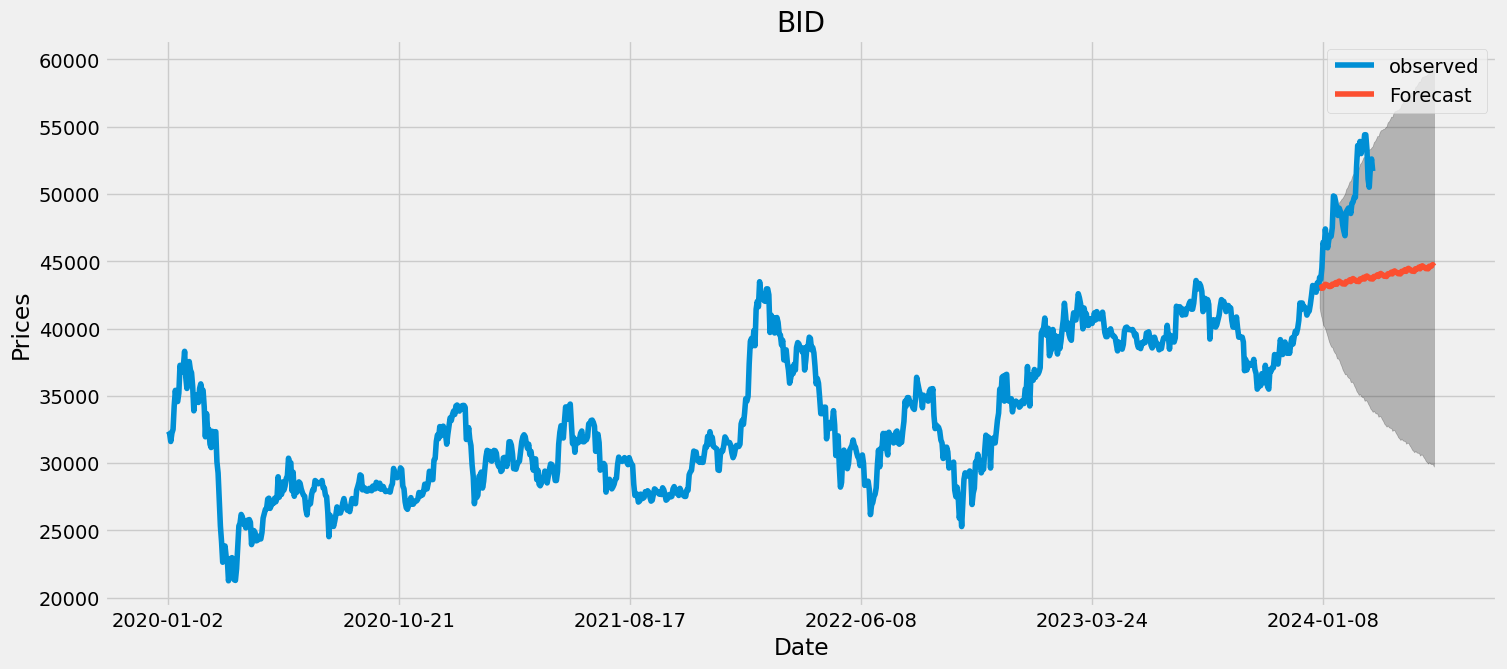

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16860D+00    |proj g|=  3.84731D-01


 This problem is unconstrained.



At iterate    5    f=  7.89730D+00    |proj g|=  1.66565D-02

At iterate   10    f=  7.89486D+00    |proj g|=  2.01872D-03

At iterate   15    f=  7.89478D+00    |proj g|=  3.43166D-03

At iterate   20    f=  7.89110D+00    |proj g|=  5.96636D-02

At iterate   25    f=  7.80937D+00    |proj g|=  9.57343D-02

At iterate   30    f=  7.77857D+00    |proj g|=  1.01912D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     43      1     0     0   5.187D-06   7.779D+00
  F =   7.7785579701013434     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


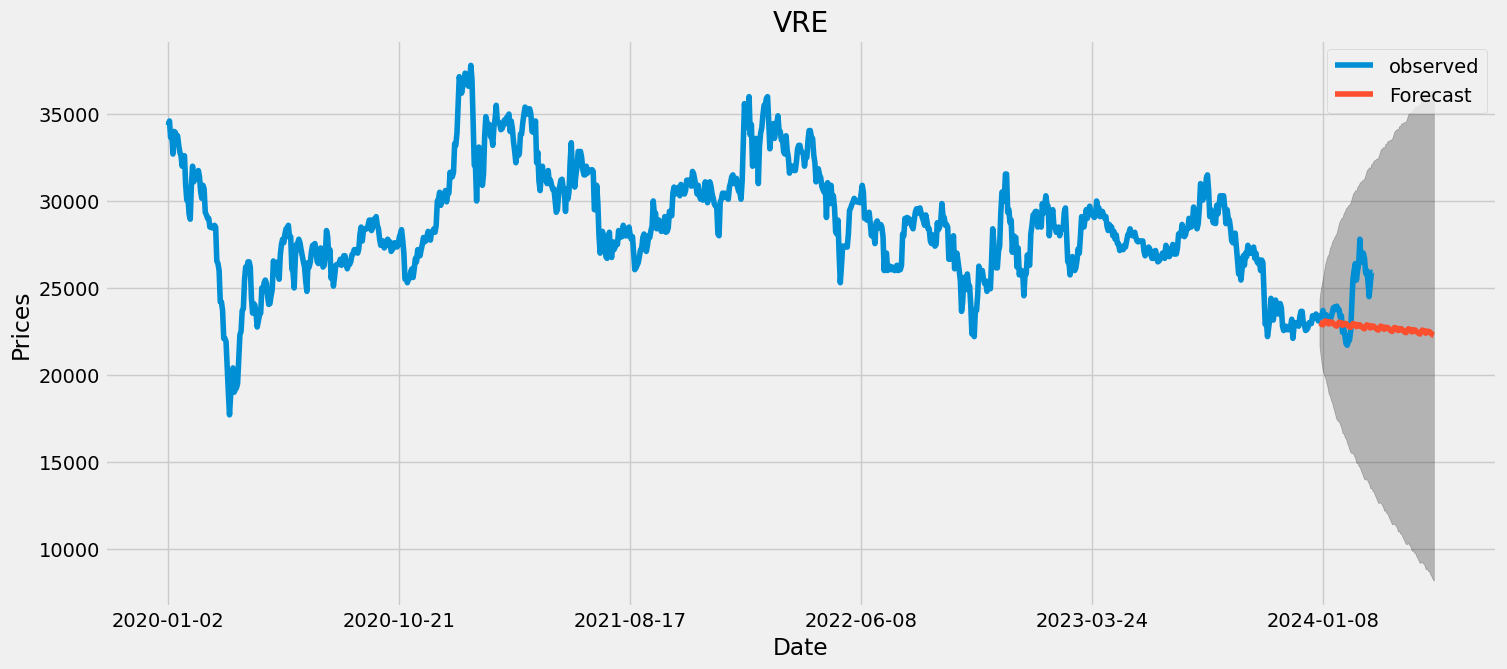

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14355D+00    |proj g|=  1.25787D-01


 This problem is unconstrained.



At iterate    5    f=  7.11813D+00    |proj g|=  2.51153D-02

At iterate   10    f=  7.11747D+00    |proj g|=  1.24705D-03

At iterate   15    f=  7.11700D+00    |proj g|=  2.13613D-02

At iterate   20    f=  7.11514D+00    |proj g|=  3.18082D-03

At iterate   25    f=  7.11440D+00    |proj g|=  2.61512D-02

At iterate   30    f=  7.07318D+00    |proj g|=  2.08177D-01

At iterate   35    f=  7.02016D+00    |proj g|=  1.04886D-02

At iterate   40    f=  7.02003D+00    |proj g|=  2.73194D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     59      1     0     0   3.843D-06   7.020D+00
  F =   7.02003125634

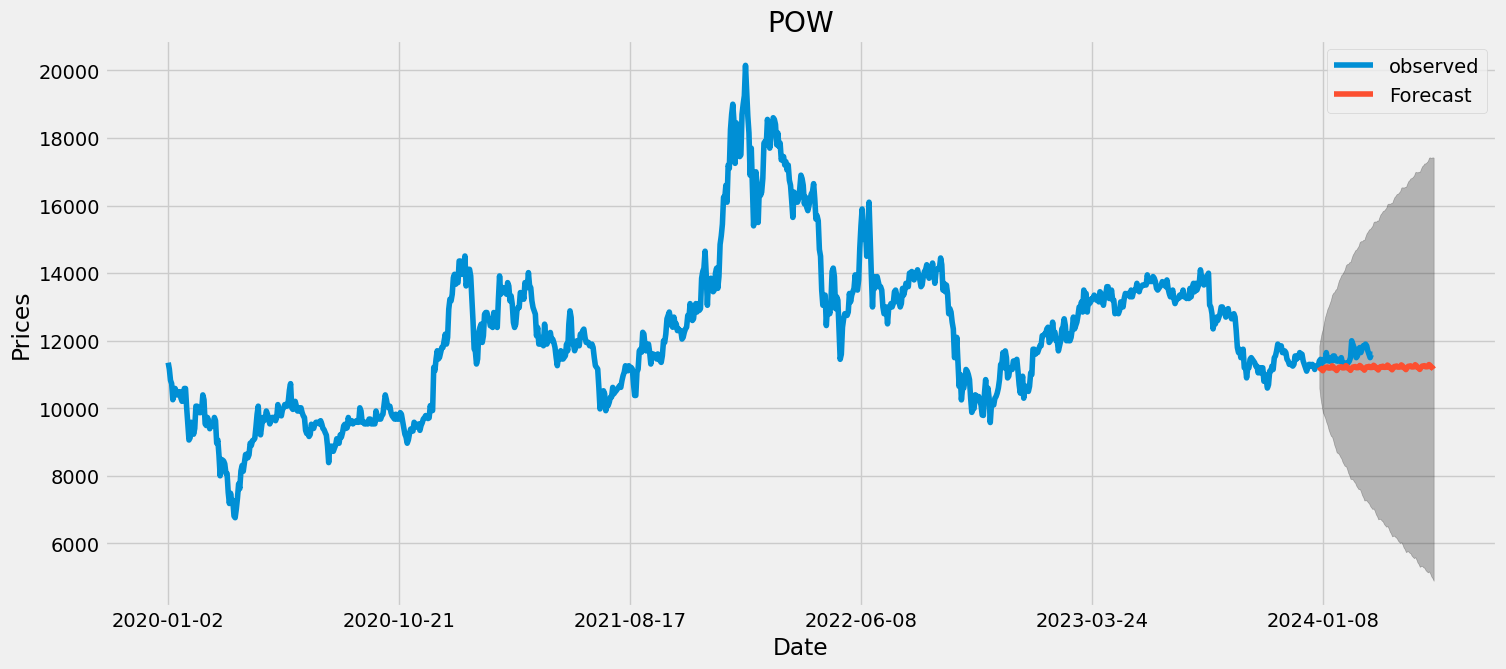

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.13393D+00    |proj g|=  8.89404D-03

At iterate    5    f=  8.13353D+00    |proj g|=  7.92826D-04

At iterate   10    f=  8.13183D+00    |proj g|=  9.83955D-03

At iterate   15    f=  8.13175D+00    |proj g|=  2.19900D-03

At iterate   20    f=  8.13033D+00    |proj g|=  4.29461D-02

At iterate   25    f=  8.05243D+00    |proj g|=  1.83743D-01

At iterate   30    f=  8.03190D+00    |proj g|=  2.86131D-02

At iterate   35    f=  8.03089D+00    |proj g|=  9.27811D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

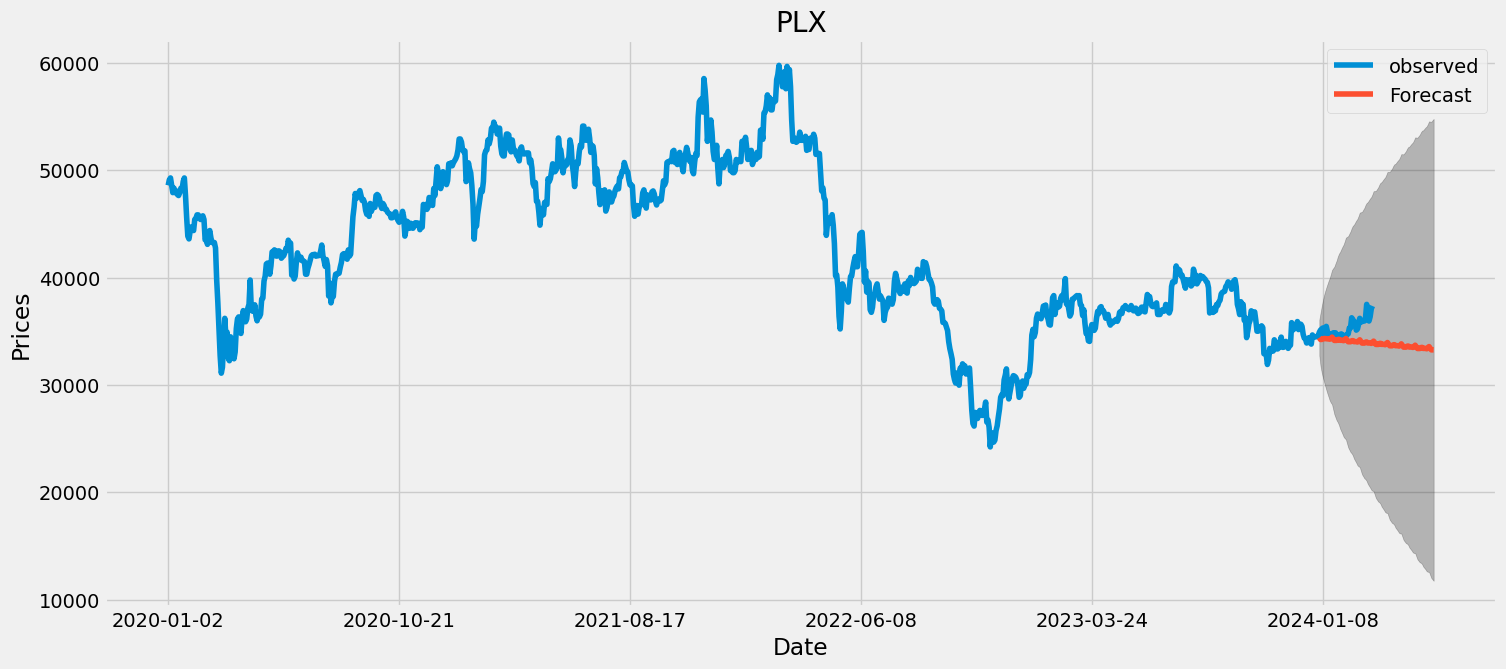

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71793D+00    |proj g|=  1.40534D-01


 This problem is unconstrained.



At iterate    5    f=  7.69120D+00    |proj g|=  3.20325D-02

At iterate   10    f=  7.69094D+00    |proj g|=  1.83563D-03

At iterate   15    f=  7.69016D+00    |proj g|=  1.54957D-02

At iterate   20    f=  7.68942D+00    |proj g|=  4.37813D-03

At iterate   25    f=  7.68918D+00    |proj g|=  4.68737D-03

At iterate   30    f=  7.60595D+00    |proj g|=  1.24928D-01

At iterate   35    f=  7.59679D+00    |proj g|=  8.35999D-03

At iterate   40    f=  7.59641D+00    |proj g|=  5.42452D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     54      1     0     0   6.296D-06   7.596D+00
  F =   7.59641070196

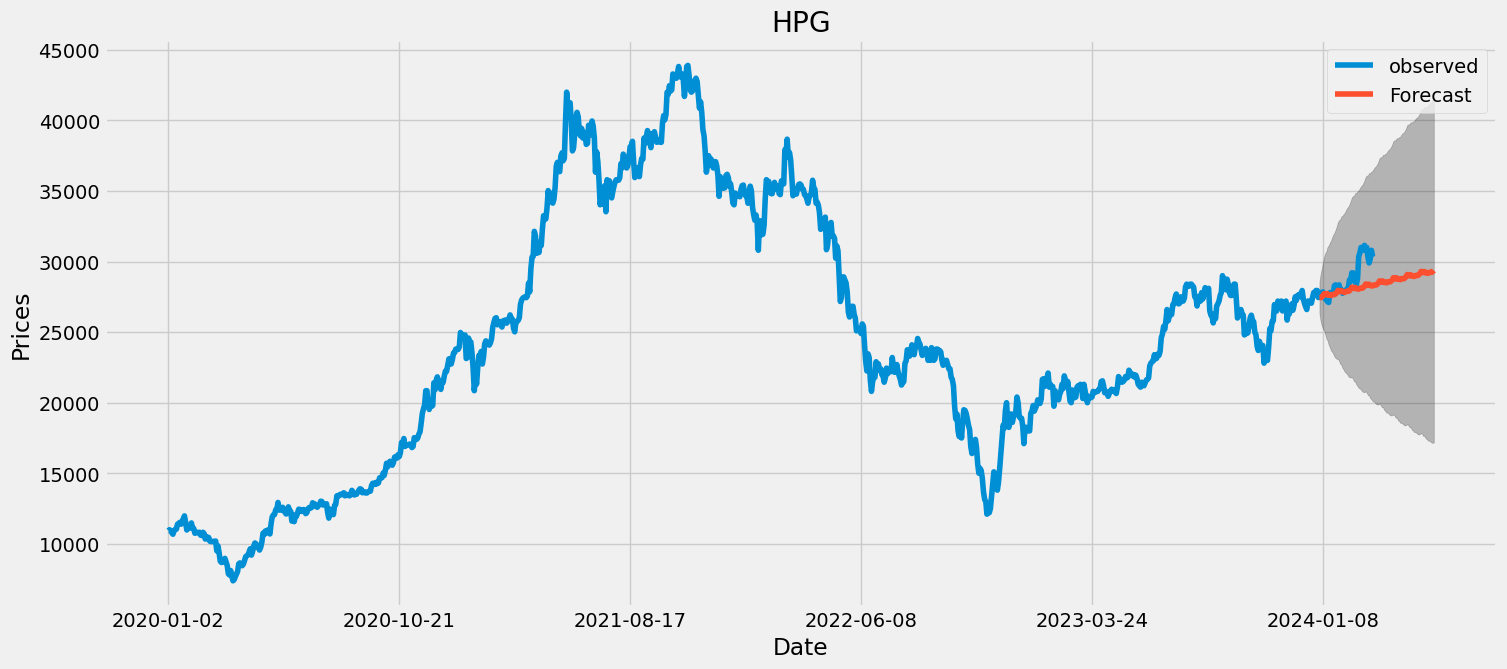

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.59993D+00    |proj g|=  9.34012D-01

At iterate    5    f=  8.48202D+00    |proj g|=  6.40227D-02

At iterate   10    f=  8.47207D+00    |proj g|=  5.58191D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   2.123D-04   8.472D+00
  F =   8.4720664592749806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


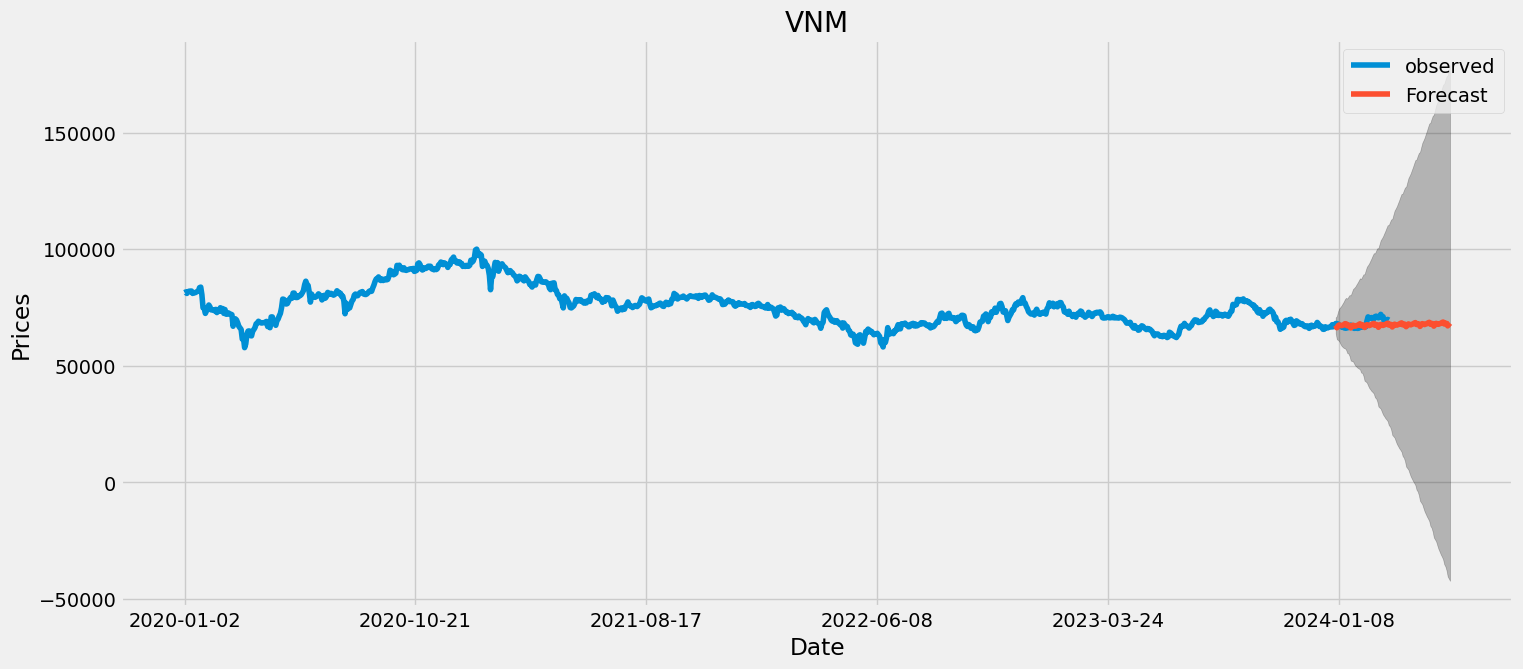

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68726D+00    |proj g|=  5.07649D-01

At iterate    5    f=  8.52594D+00    |proj g|=  1.07781D-02

At iterate   10    f=  8.52512D+00    |proj g|=  9.48562D-03

At iterate   15    f=  8.52483D+00    |proj g|=  3.11432D-04

At iterate   20    f=  8.52464D+00    |proj g|=  9.32208D-03

At iterate   25    f=  8.48860D+00    |proj g|=  1.45280D-01

At iterate   30    f=  8.45584D+00    |proj g|=  2.93916D-03

At iterate   35    f=  8.45563D+00    |proj g|=  1.21583D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

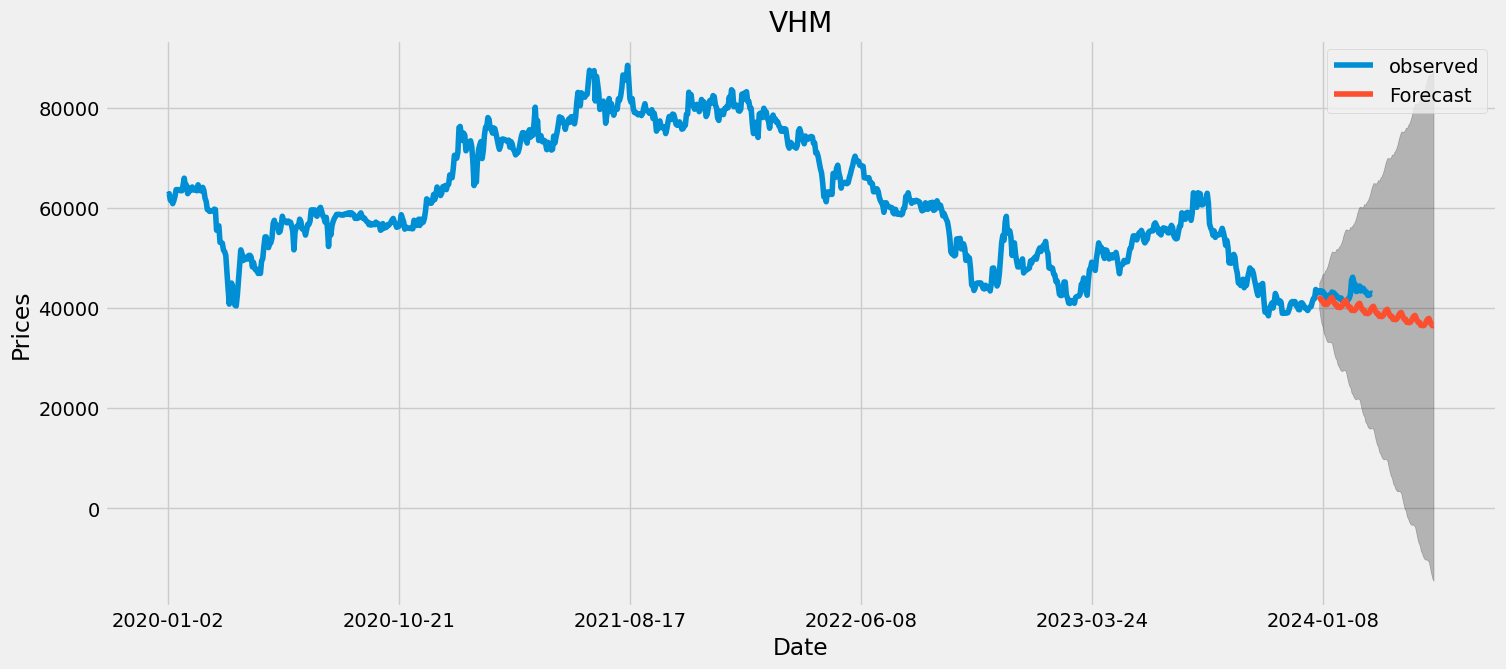

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62646D+00    |proj g|=  3.05944D-01

At iterate    5    f=  7.99727D+00    |proj g|=  2.22188D-02

At iterate   10    f=  7.99569D+00    |proj g|=  7.21769D-03

At iterate   15    f=  7.99511D+00    |proj g|=  6.17720D-04

At iterate   20    f=  7.99495D+00    |proj g|=  8.32663D-03

At iterate   25    f=  7.97060D+00    |proj g|=  1.98686D-01

At iterate   30    f=  7.89203D+00    |proj g|=  2.49284D-02

At iterate   35    f=  7.89142D+00    |proj g|=  4.21394D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

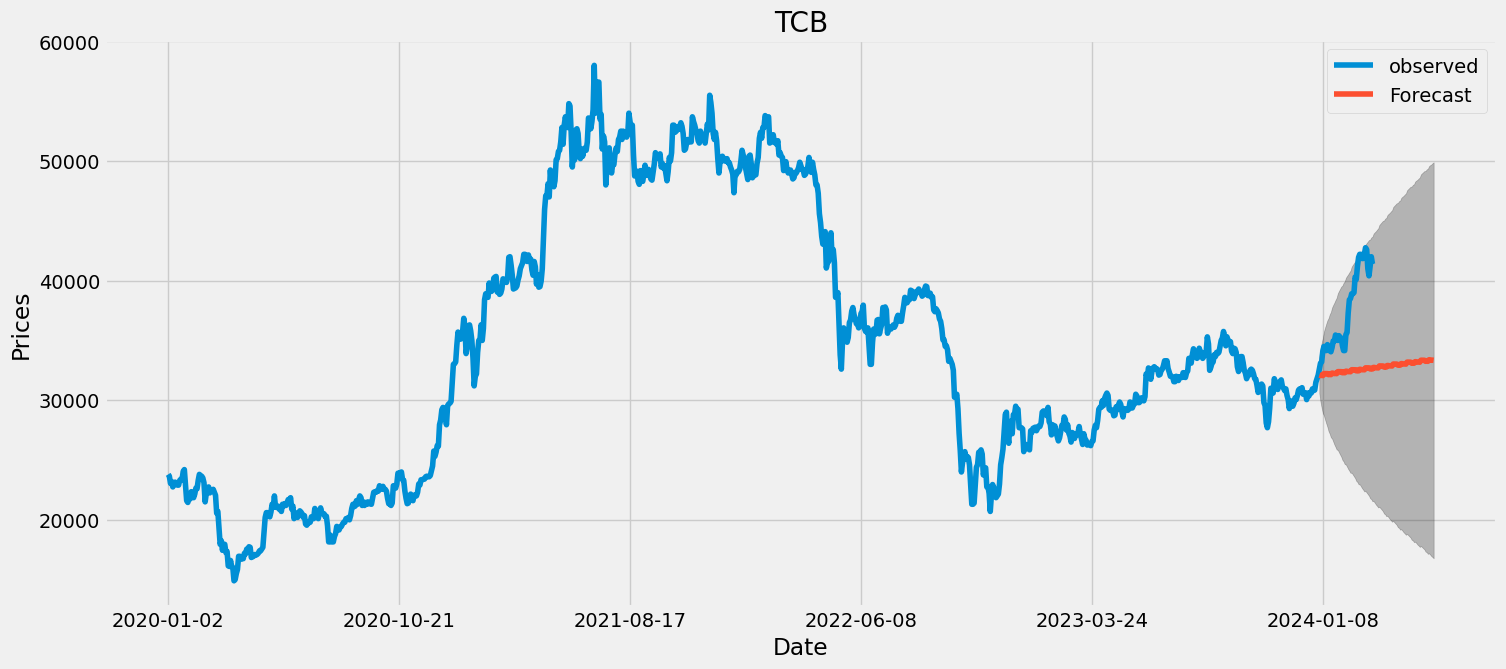

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11236D+00    |proj g|=  1.48737D-01


 This problem is unconstrained.



At iterate    5    f=  7.07931D+00    |proj g|=  5.35941D-02

At iterate   10    f=  7.07668D+00    |proj g|=  1.01557D-03

At iterate   15    f=  7.07657D+00    |proj g|=  1.60074D-02

At iterate   20    f=  7.07518D+00    |proj g|=  2.27678D-02

At iterate   25    f=  7.07491D+00    |proj g|=  1.21760D-03

At iterate   30    f=  7.07465D+00    |proj g|=  3.25962D-02

At iterate   35    f=  7.06840D+00    |proj g|=  9.86465D-02

At iterate   40    f=  7.03366D+00    |proj g|=  3.24694D-01

At iterate   45    f=  7.00309D+00    |proj g|=  1.11768D-02

At iterate   50    f=  7.00306D+00    |proj g|=  4.20516D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

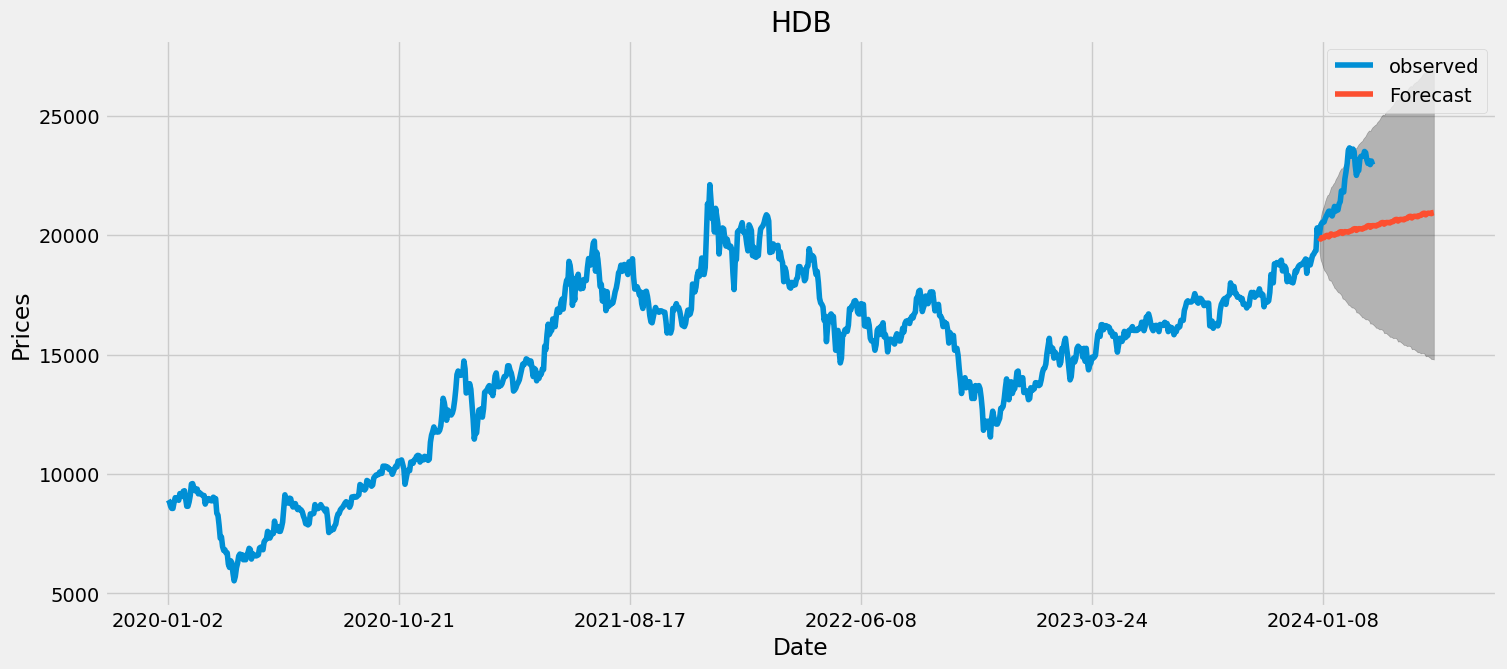

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34103D+00    |proj g|=  1.17292D-01

At iterate    5    f=  7.30589D+00    |proj g|=  4.01104D-02

At iterate   10    f=  7.30454D+00    |proj g|=  8.10138D-04

At iterate   15    f=  7.30446D+00    |proj g|=  1.82955D-02

At iterate   20    f=  7.30277D+00    |proj g|=  1.69946D-02

At iterate   25    f=  7.30269D+00    |proj g|=  5.68388D-03

At iterate   30    f=  7.30087D+00    |proj g|=  5.72968D-02

At iterate   35    f=  7.23595D+00    |proj g|=  1.36444D-01

At iterate   40    f=  7.21105D+00    |proj g|=  2.01651D-03

At iterate   45    f=  7.21105D+00    |proj g|=  1.26725D-03

At iterate   50    f=  7.21104D+00    |proj g|=  3.02068D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

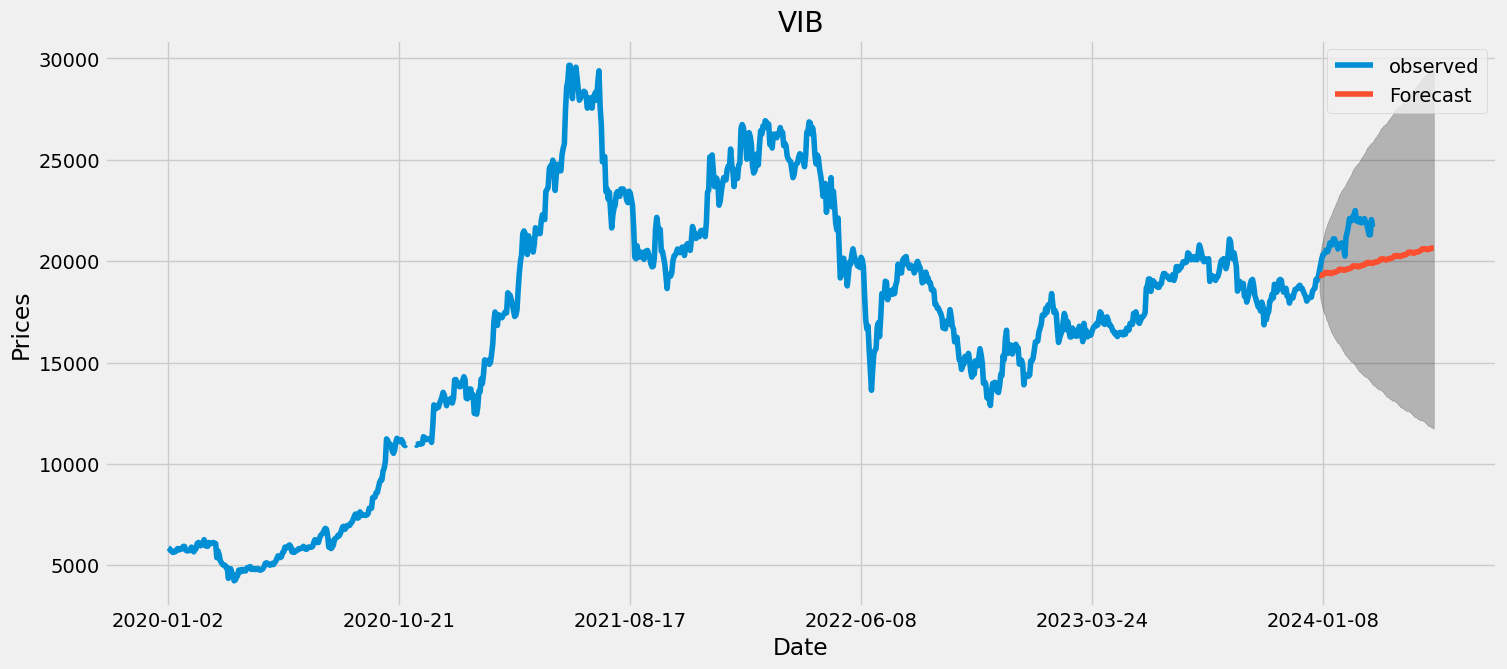

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.23798D+00    |proj g|=  2.59701D-01


 This problem is unconstrained.



At iterate    5    f=  8.43249D+00    |proj g|=  1.23869D-01

At iterate   10    f=  8.39600D+00    |proj g|=  1.00141D-02

At iterate   15    f=  8.39572D+00    |proj g|=  2.30948D-04

At iterate   20    f=  8.39572D+00    |proj g|=  1.30096D-03

At iterate   25    f=  8.39548D+00    |proj g|=  1.51866D-02

At iterate   30    f=  8.37944D+00    |proj g|=  2.44159D-02

At iterate   35    f=  8.36479D+00    |proj g|=  7.87633D-02

At iterate   40    f=  8.33404D+00    |proj g|=  4.74211D-02

At iterate   45    f=  8.33349D+00    |proj g|=  5.55671D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     62   

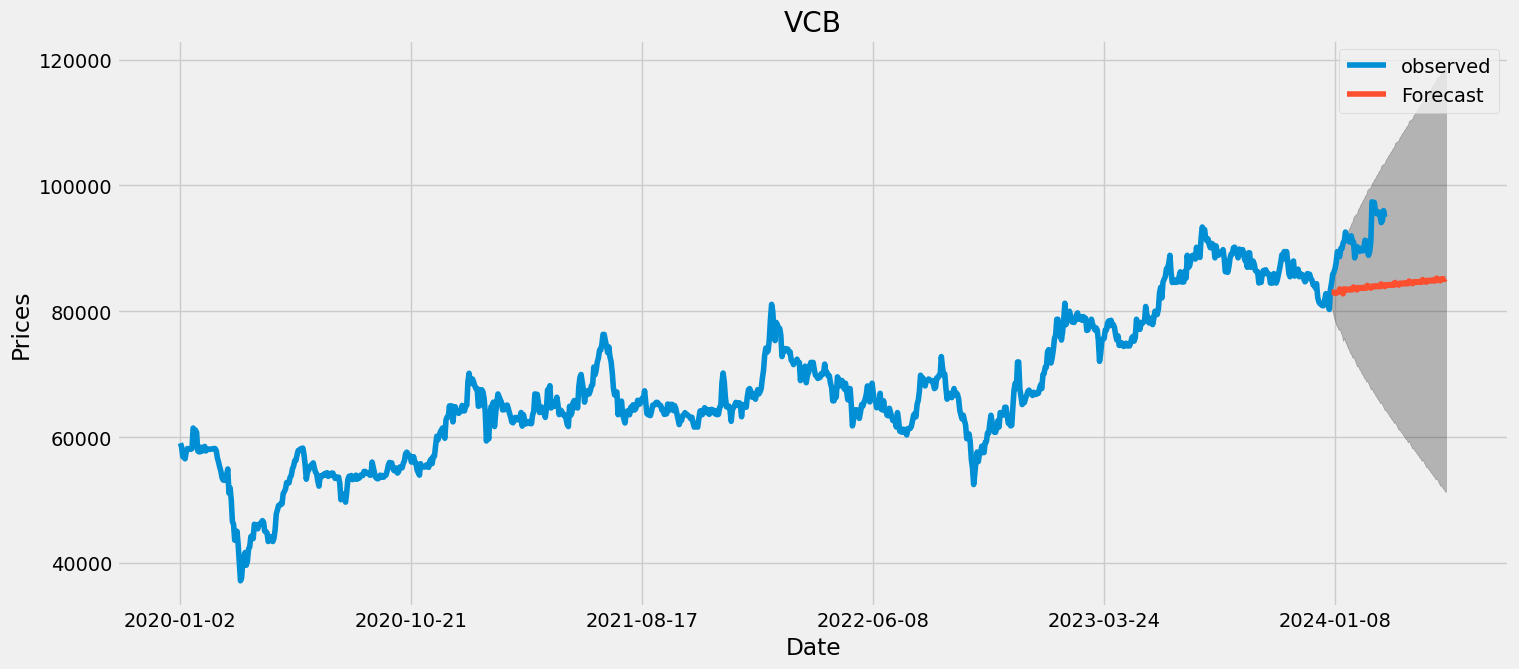

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.99659D+00    |proj g|=  8.09929D-01

At iterate    5    f=  8.91808D+00    |proj g|=  1.44649D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     11      1     0     0   1.120D-04   8.918D+00
  F =   8.9180033547303221     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


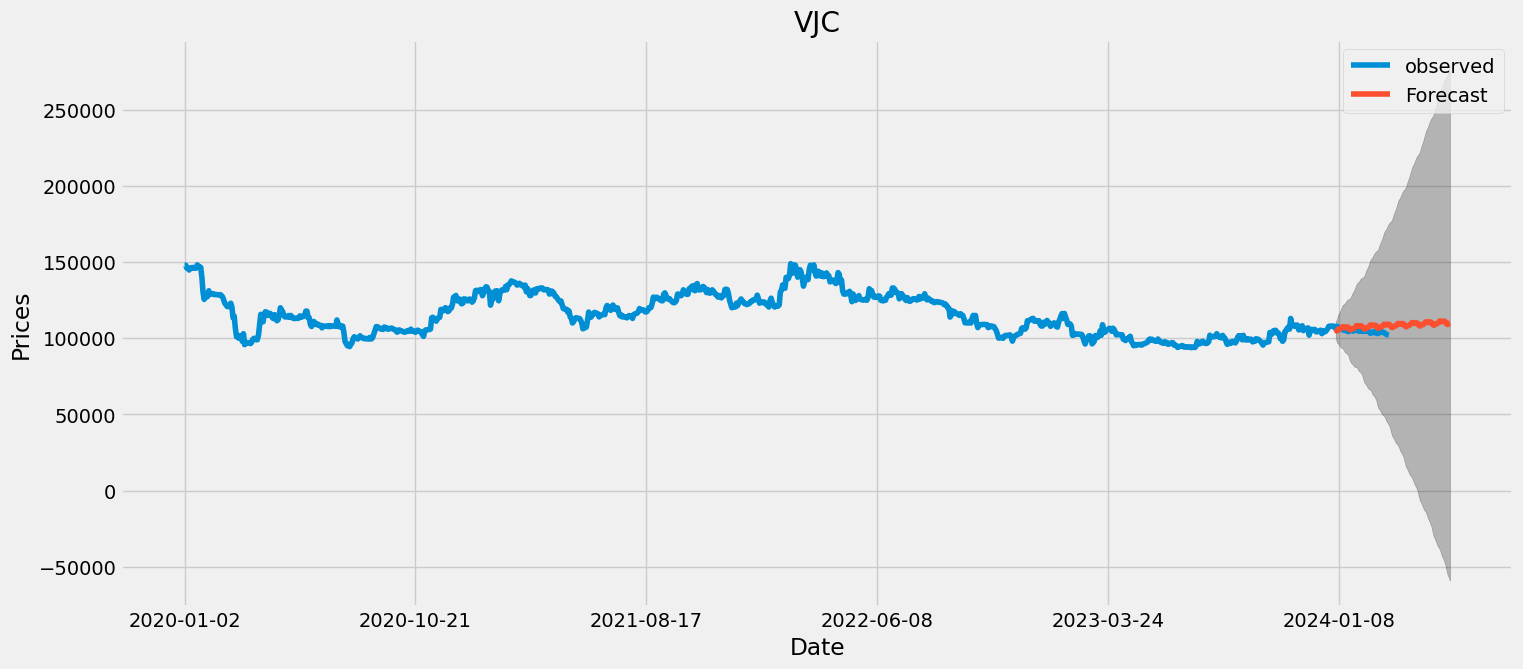

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76898D+00    |proj g|=  3.67296D-01


 This problem is unconstrained.



At iterate    5    f=  8.74079D+00    |proj g|=  2.39082D-02

At iterate   10    f=  8.74051D+00    |proj g|=  3.15227D-03

At iterate   15    f=  8.73980D+00    |proj g|=  4.09326D-02

At iterate   20    f=  8.73785D+00    |proj g|=  1.42813D-03

At iterate   25    f=  8.73784D+00    |proj g|=  4.05953D-04

At iterate   30    f=  8.73781D+00    |proj g|=  6.75671D-03

At iterate   35    f=  8.73431D+00    |proj g|=  7.04914D-02

At iterate   40    f=  8.70917D+00    |proj g|=  6.22272D-02

At iterate   45    f=  8.70761D+00    |proj g|=  7.21130D-03

At iterate   50    f=  8.70748D+00    |proj g|=  6.94076D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

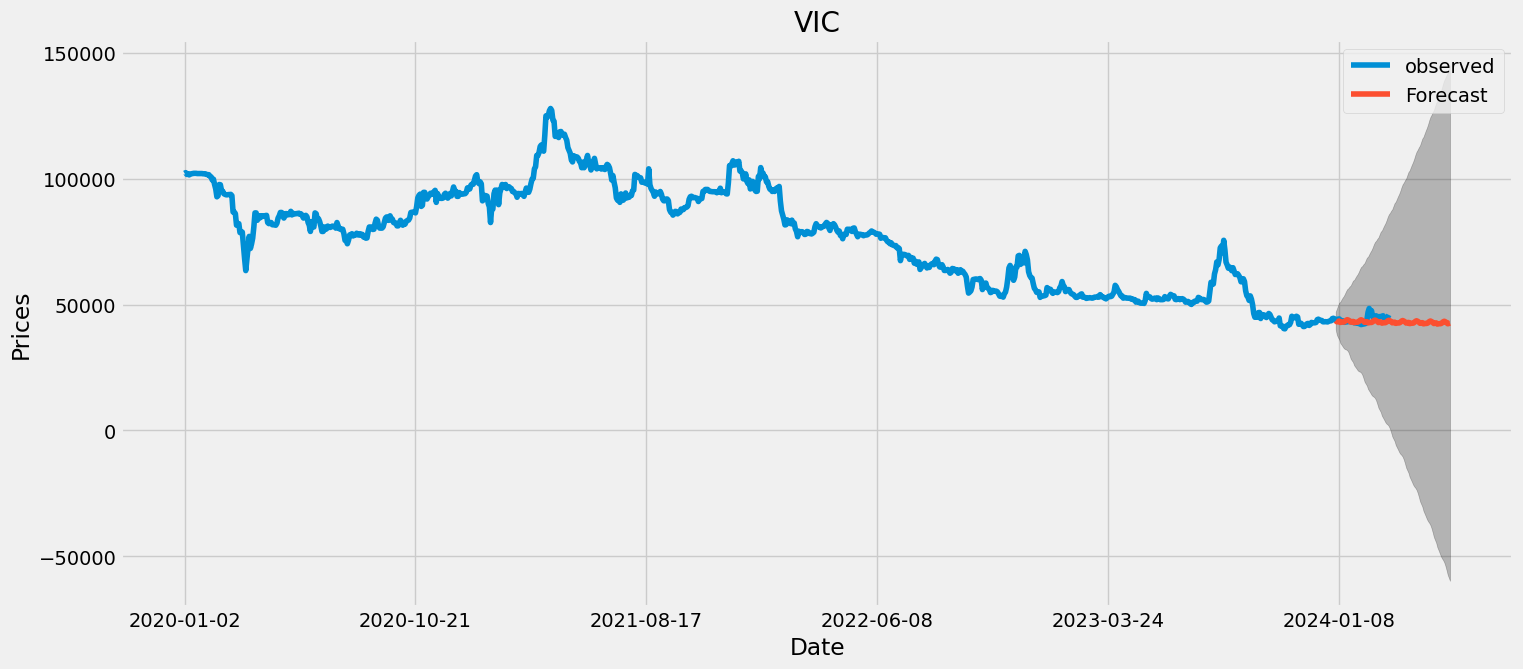

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31590D+00    |proj g|=  8.91021D-02


 This problem is unconstrained.



At iterate    5    f=  8.30772D+00    |proj g|=  2.03603D-03

At iterate   10    f=  8.30727D+00    |proj g|=  4.24001D-03

At iterate   15    f=  8.30724D+00    |proj g|=  2.90766D-03

At iterate   20    f=  8.30481D+00    |proj g|=  3.87006D-02

At iterate   25    f=  8.28678D+00    |proj g|=  1.83384D-02

At iterate   30    f=  8.22215D+00    |proj g|=  1.99746D-01

At iterate   35    f=  8.19381D+00    |proj g|=  1.08430D-02

At iterate   40    f=  8.19367D+00    |proj g|=  4.91181D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     54      1     0     0   1.658D-05   8.194D+00
  F =   8.19365520560

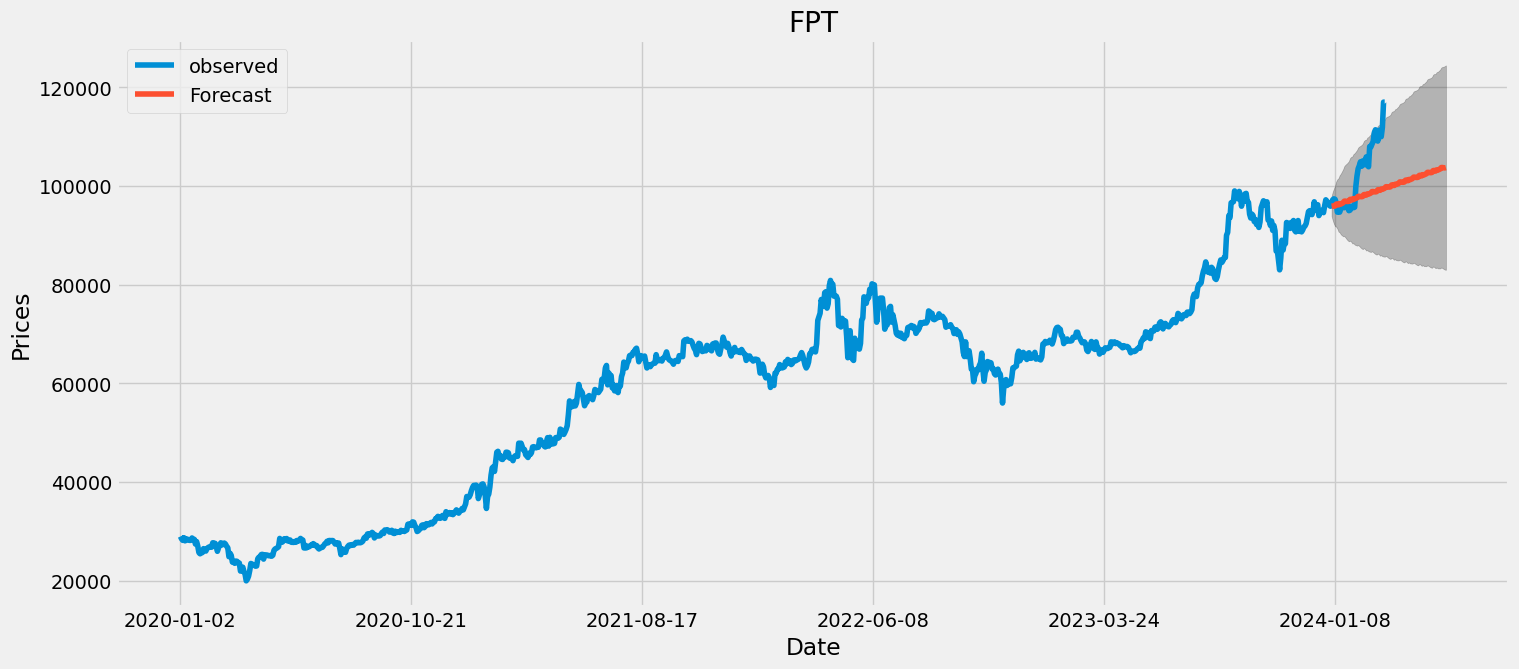

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.67102D+00    |proj g|=  1.01635D-01

At iterate    5    f=  7.64481D+00    |proj g|=  2.47728D-03

At iterate   10    f=  7.64476D+00    |proj g|=  4.61341D-03

At iterate   15    f=  7.64437D+00    |proj g|=  1.63726D-03

At iterate   20    f=  7.64352D+00    |proj g|=  1.62696D-02

At iterate   25    f=  7.62176D+00    |proj g|=  1.51030D-01

At iterate   30    f=  7.54644D+00    |proj g|=  9.94352D-02

At iterate   35    f=  7.54333D+00    |proj g|=  3.75157D-03

At iterate   40    f=  7.54331D+00    |proj g|=  9.15188D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

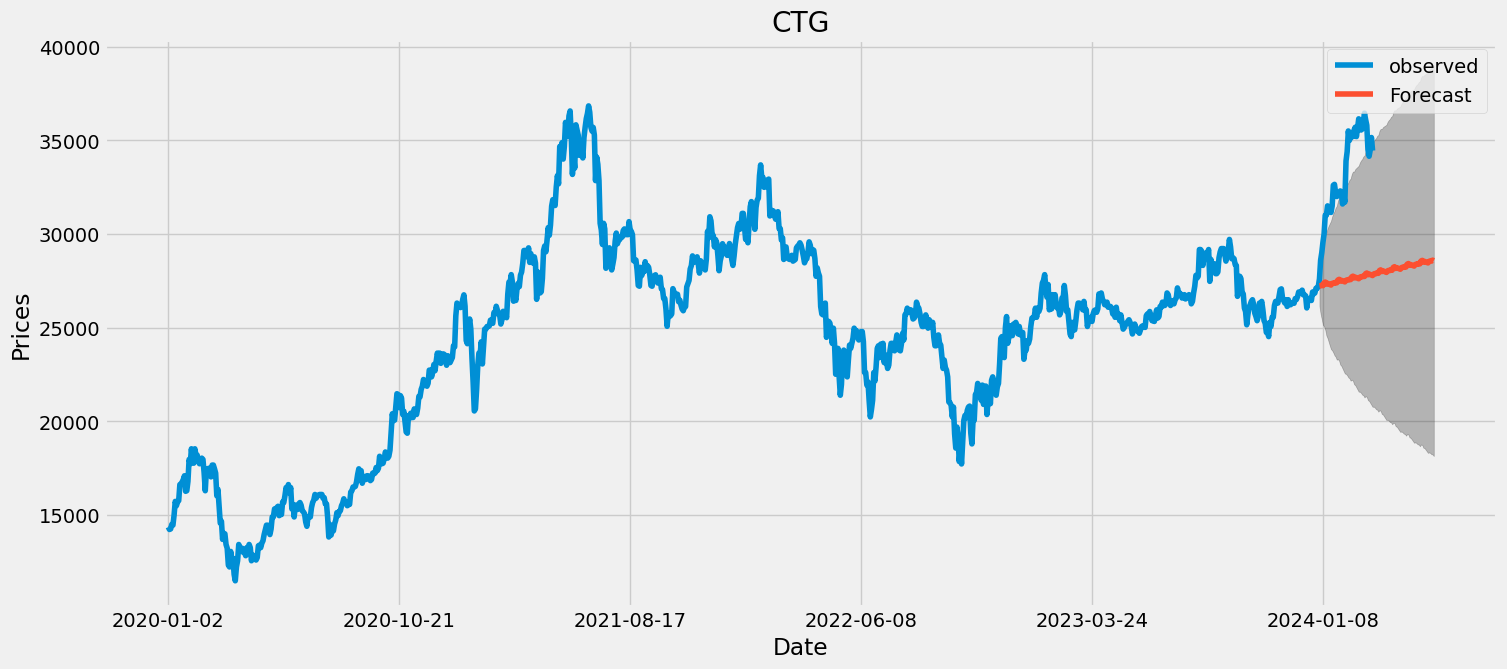

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30787D+00    |proj g|=  1.20241D-01


 This problem is unconstrained.



At iterate    5    f=  7.27841D+00    |proj g|=  5.57817D-03

At iterate   10    f=  7.27835D+00    |proj g|=  4.64952D-03

At iterate   15    f=  7.27815D+00    |proj g|=  8.97070D-04

At iterate   20    f=  7.27772D+00    |proj g|=  2.08822D-02

At iterate   25    f=  7.26712D+00    |proj g|=  3.03162D-02

At iterate   30    f=  7.23518D+00    |proj g|=  1.57900D-01

At iterate   35    f=  7.20246D+00    |proj g|=  3.47502D-02

At iterate   40    f=  7.20216D+00    |proj g|=  9.57704D-04

At iterate   45    f=  7.19902D+00    |proj g|=  7.51147D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     85   

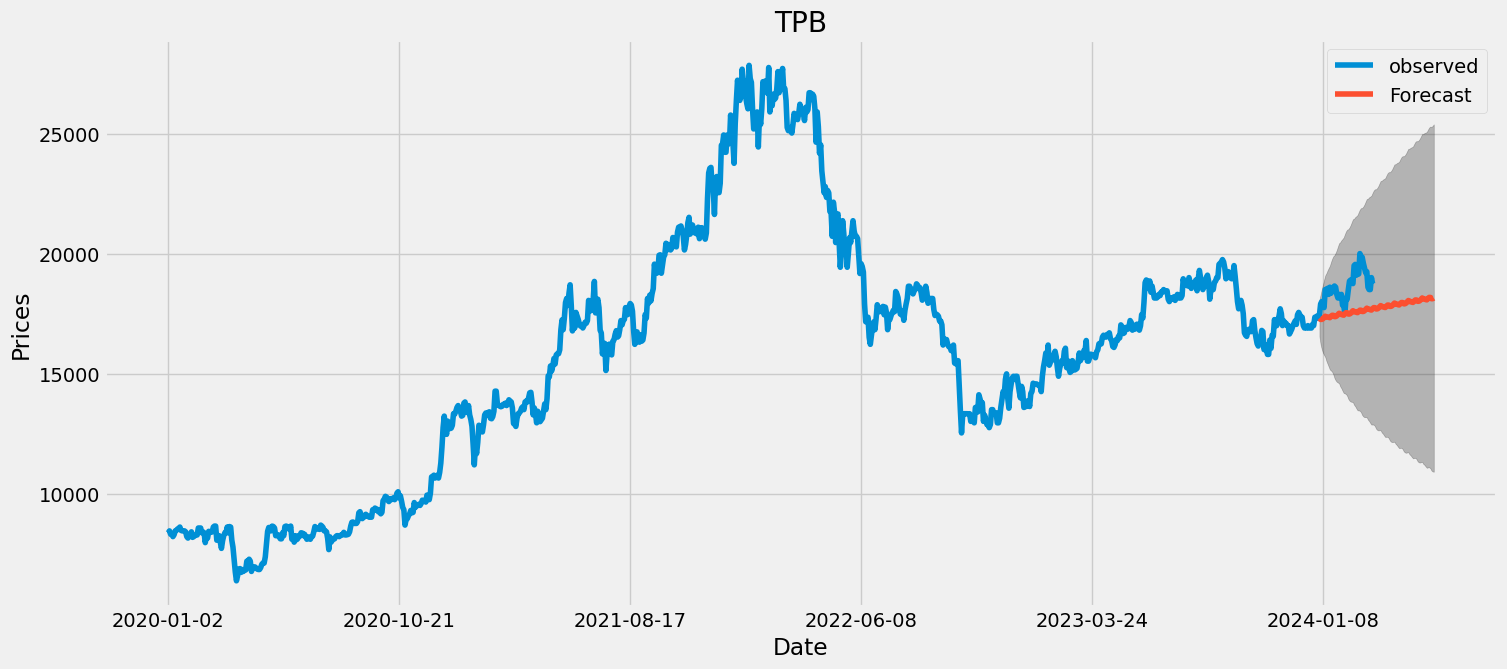

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.34214D+00    |proj g|=  6.44814D-02


 This problem is unconstrained.



At iterate    5    f=  8.34010D+00    |proj g|=  3.18861D-03

At iterate   10    f=  8.33994D+00    |proj g|=  4.77367D-04

At iterate   15    f=  8.33993D+00    |proj g|=  8.49864D-04

At iterate   20    f=  8.33638D+00    |proj g|=  3.26619D-02

At iterate   25    f=  8.33146D+00    |proj g|=  4.81493D-02

At iterate   30    f=  8.28785D+00    |proj g|=  1.27144D-01

At iterate   35    f=  8.26473D+00    |proj g|=  1.79695D-02

At iterate   40    f=  8.26435D+00    |proj g|=  7.29794D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     51      1     0     0   2.828D-06   8.264D+00
  F =   8.26434977982

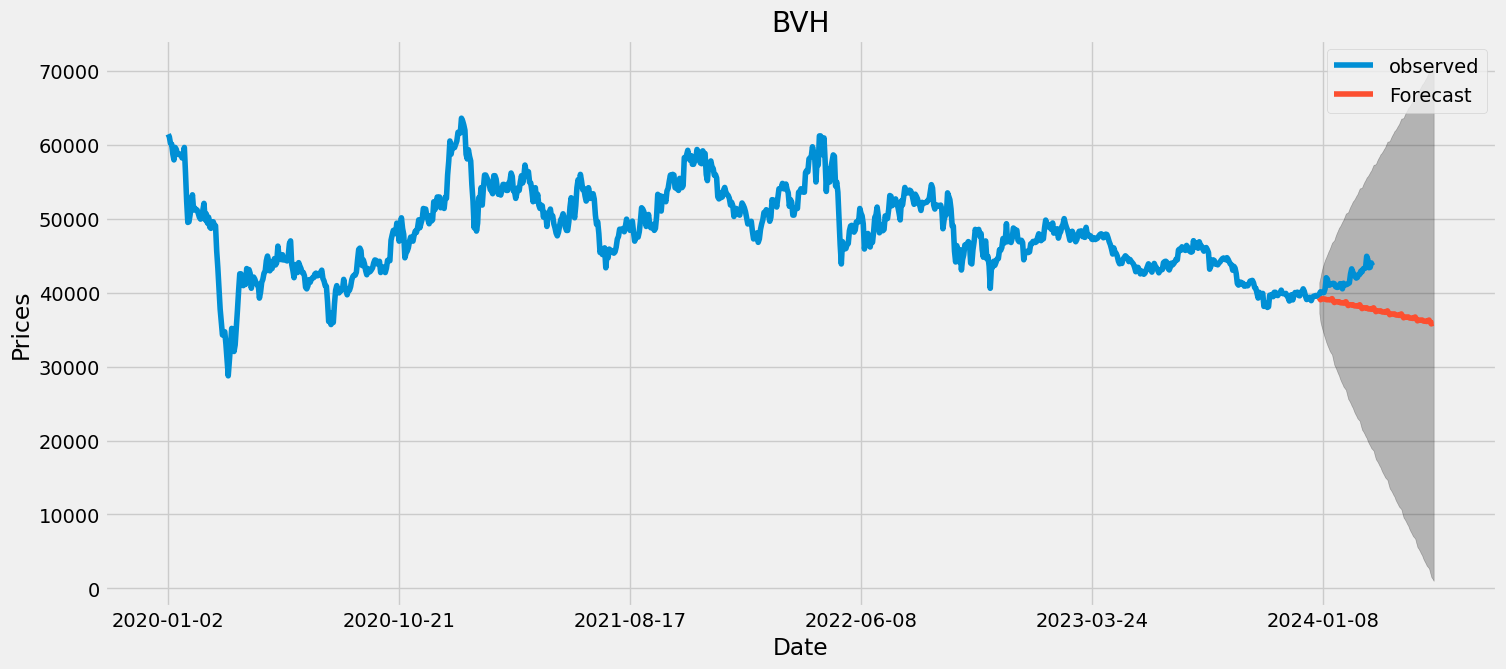

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.82823D+00    |proj g|=  1.23131D-01

At iterate    5    f=  7.80819D+00    |proj g|=  1.27572D-02

At iterate   10    f=  7.80811D+00    |proj g|=  3.15744D-03

At iterate   15    f=  7.80801D+00    |proj g|=  4.22457D-03

At iterate   20    f=  7.80797D+00    |proj g|=  5.10908D-03

At iterate   25    f=  7.80661D+00    |proj g|=  5.06074D-02

At iterate   30    f=  7.78965D+00    |proj g|=  9.26306D-02

At iterate   35    f=  7.70614D+00    |proj g|=  3.55777D-02

At iterate   40    f=  7.70147D+00    |proj g|=  3.39165D-02

At iterate   45    f=  7.70046D+00    |proj g|=  3.57346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

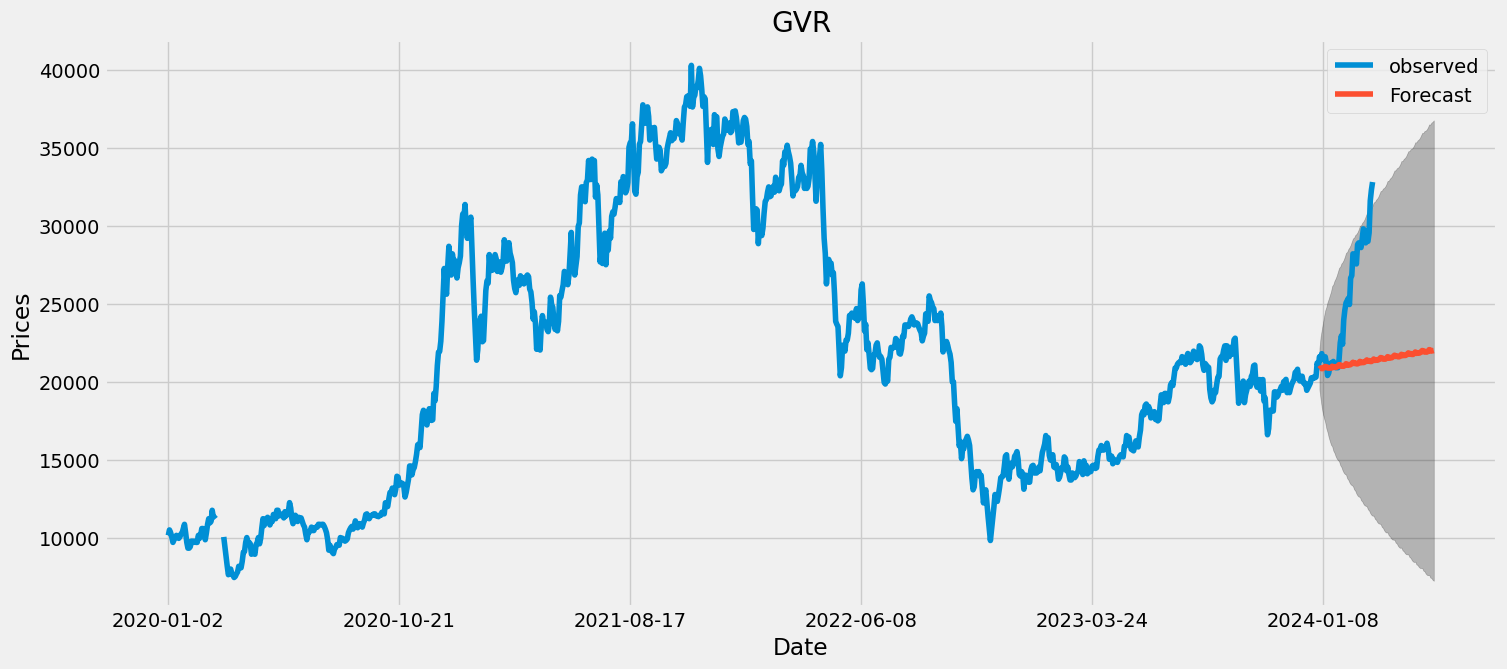

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69704D+00    |proj g|=  3.45368D-01

At iterate    5    f=  8.66560D+00    |proj g|=  3.28192D-02

At iterate   10    f=  8.66487D+00    |proj g|=  4.27362D-03

At iterate   15    f=  8.66442D+00    |proj g|=  9.63525D-04

At iterate   20    f=  8.66273D+00    |proj g|=  3.51712D-02

At iterate   25    f=  8.66227D+00    |proj g|=  2.10190D-04

At iterate   30    f=  8.66226D+00    |proj g|=  1.37670D-03

At iterate   35    f=  8.66179D+00    |proj g|=  1.09458D-02

At iterate   40    f=  8.65096D+00    |proj g|=  1.45434D-01

At iterate   45    f=  8.64146D+00    |proj g|=  2.02712D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

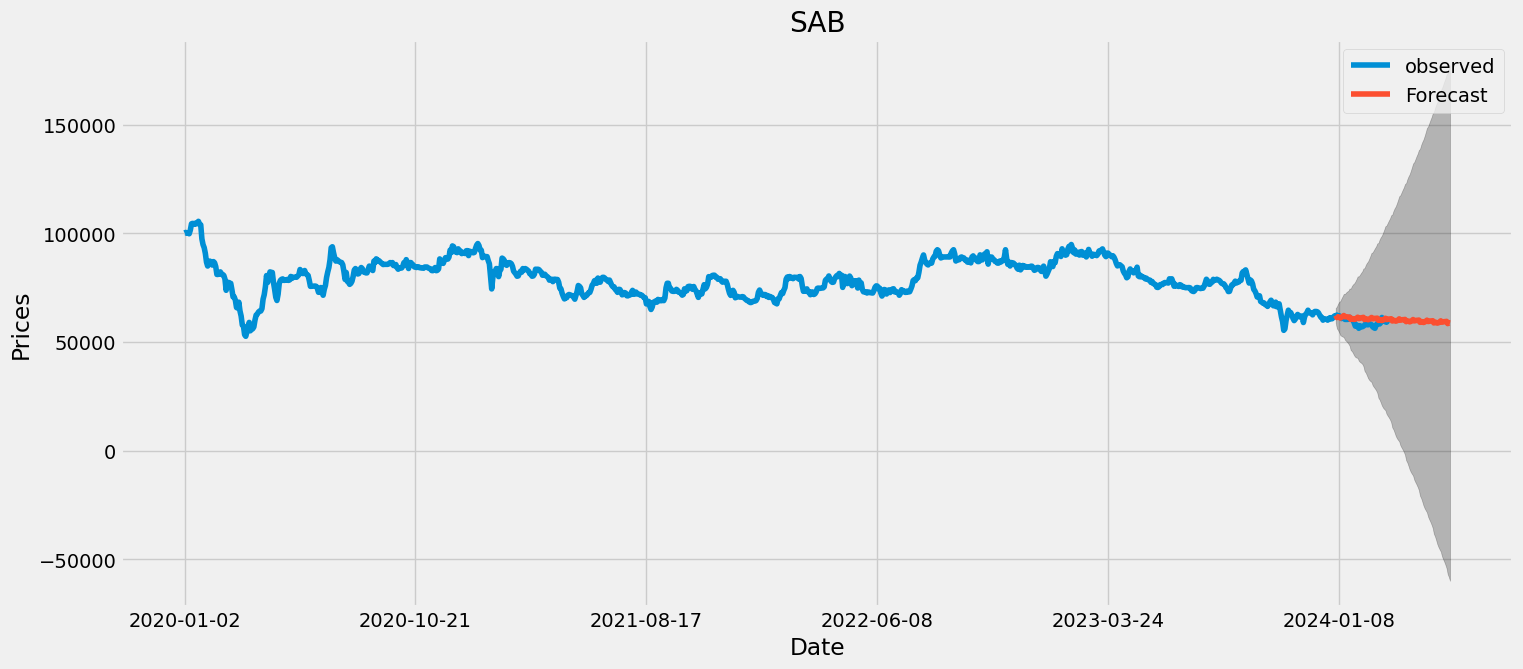

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51614D+00    |proj g|=  1.30984D-01


 This problem is unconstrained.



At iterate    5    f=  8.49579D+00    |proj g|=  6.80743D-03

At iterate   10    f=  8.49486D+00    |proj g|=  2.89617D-02

At iterate   15    f=  8.49409D+00    |proj g|=  2.23718D-04

At iterate   20    f=  8.49407D+00    |proj g|=  5.10731D-03

At iterate   25    f=  8.49109D+00    |proj g|=  7.56086D-02

At iterate   30    f=  8.44653D+00    |proj g|=  2.08709D-01

At iterate   35    f=  8.41990D+00    |proj g|=  6.02234D-02

At iterate   40    f=  8.40986D+00    |proj g|=  2.32535D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     55      1     0     0   1.398D-05   8.410D+00
  F =   8.40985618043

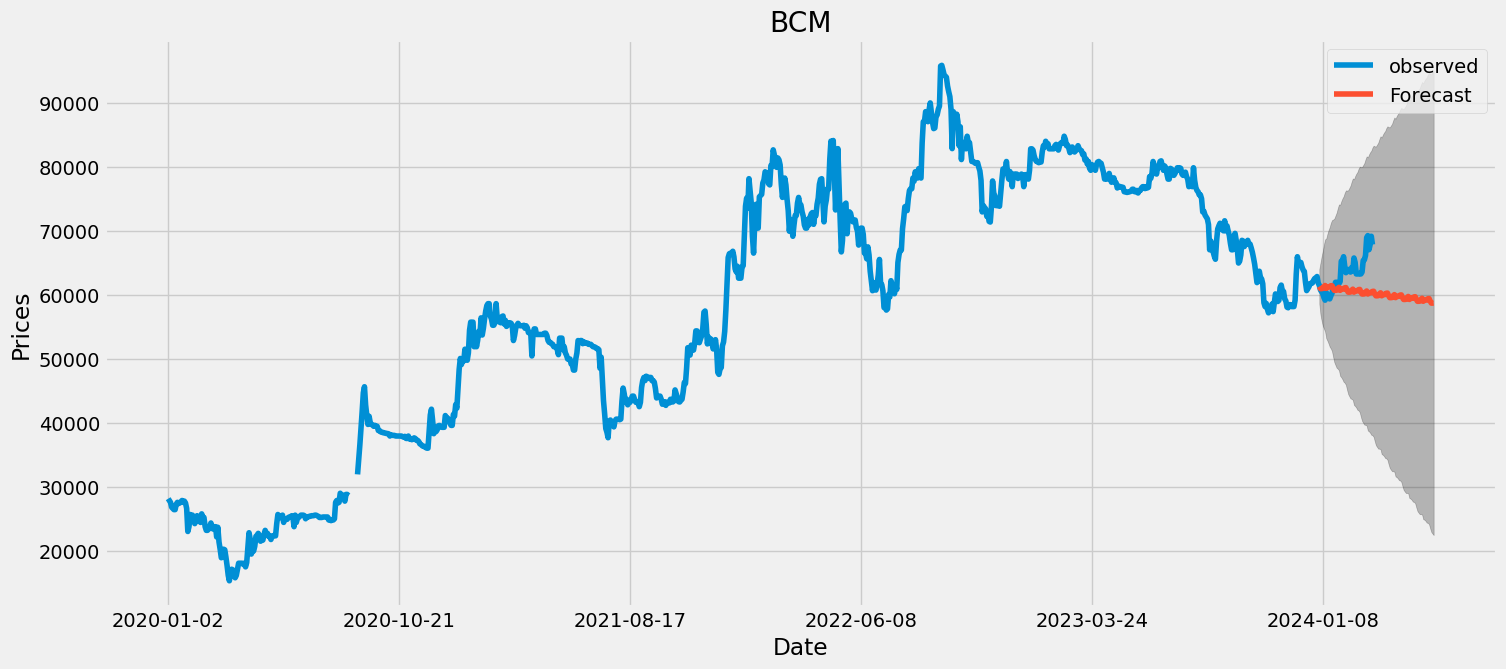

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19768D+00    |proj g|=  1.04814D-01

At iterate    5    f=  7.16793D+00    |proj g|=  1.52092D-02

At iterate   10    f=  7.16754D+00    |proj g|=  9.87502D-04

At iterate   15    f=  7.16728D+00    |proj g|=  3.66467D-02

At iterate   20    f=  7.14535D+00    |proj g|=  3.27460D-01

At iterate   25    f=  7.12777D+00    |proj g|=  5.75657D-02

At iterate   30    f=  7.11254D+00    |proj g|=  2.12948D-01

At iterate   35    f=  7.07531D+00    |proj g|=  1.62342D-02

At iterate   40    f=  7.07454D+00    |proj g|=  5.54430D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

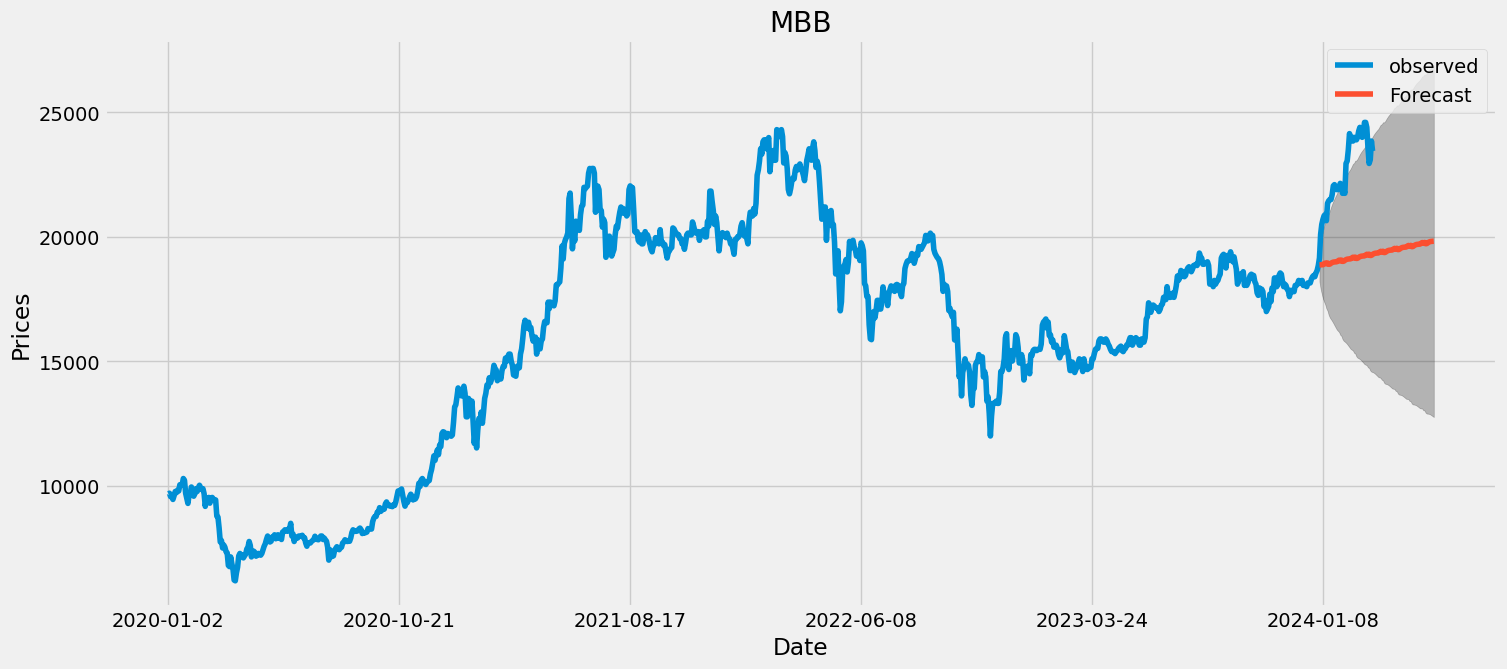

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78657D+00    |proj g|=  2.87582D-01


 This problem is unconstrained.



At iterate    5    f=  8.76841D+00    |proj g|=  1.78921D-02

At iterate   10    f=  8.76532D+00    |proj g|=  1.52217D-02

At iterate   15    f=  8.76507D+00    |proj g|=  1.56422D-04

At iterate   20    f=  8.76506D+00    |proj g|=  2.07354D-03

At iterate   25    f=  8.76261D+00    |proj g|=  6.41217D-02

At iterate   30    f=  8.71360D+00    |proj g|=  3.36926D-02

At iterate   35    f=  8.71226D+00    |proj g|=  5.05523D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     44      1     0     0   7.431D-06   8.712D+00
  F =   8.7122635231699714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

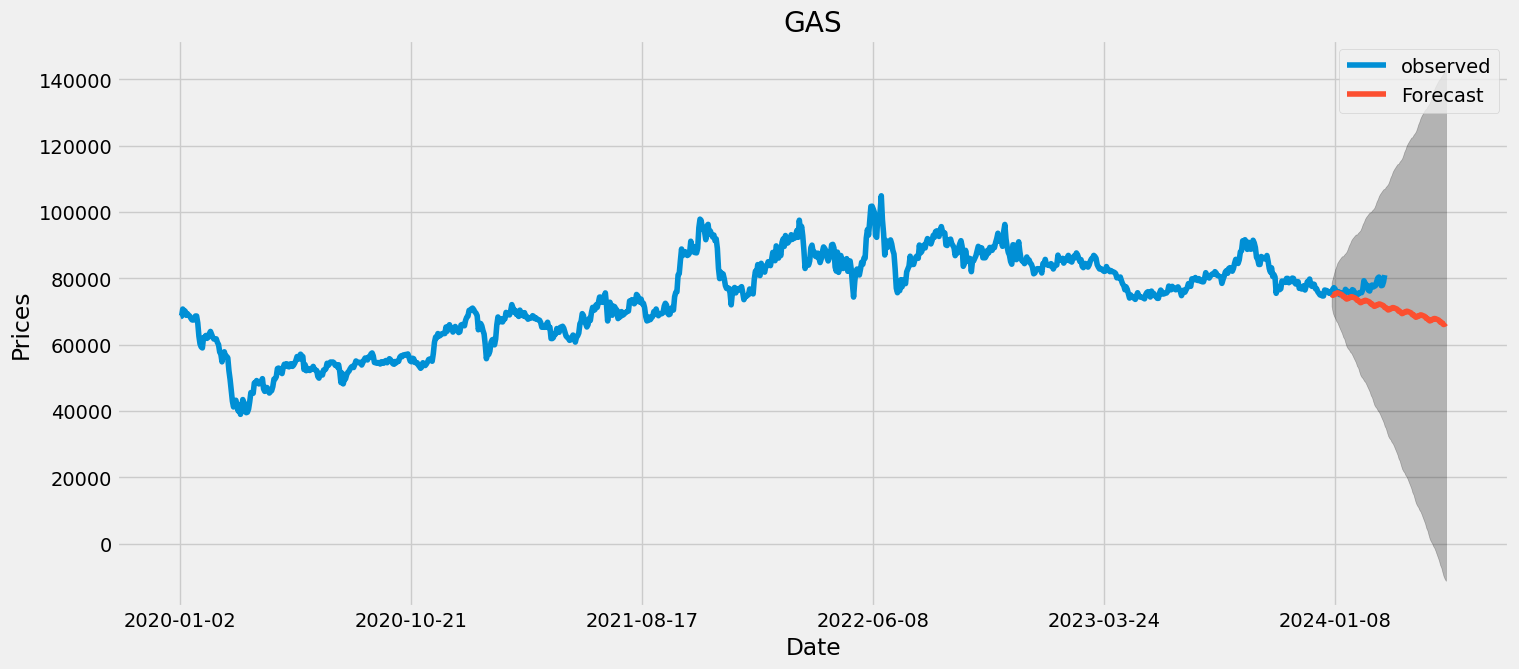

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33970D+00    |proj g|=  8.54868D-02


 This problem is unconstrained.



At iterate    5    f=  5.31796D+00    |proj g|=  3.19581D-02

At iterate   10    f=  5.31620D+00    |proj g|=  1.75232D-03

At iterate   15    f=  5.31558D+00    |proj g|=  1.34500D-02

At iterate   20    f=  5.31521D+00    |proj g|=  1.74065D-03

At iterate   25    f=  5.31369D+00    |proj g|=  3.79932D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  5.27356D+00    |proj g|=  1.68545D-02

At iterate   35    f=  5.27351D+00    |proj g|=  1.02744D-03

At iterate   40    f=  5.27343D+00    |proj g|=  3.16388D-03

At iterate   45    f=  5.27340D+00    |proj g|=  3.22733D-03

At iterate   50    f=  5.26987D+00    |proj g|=  4.64781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     80      2     0     0   4.648D-02   5.270D+00
  F =   5.2698670653661708     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


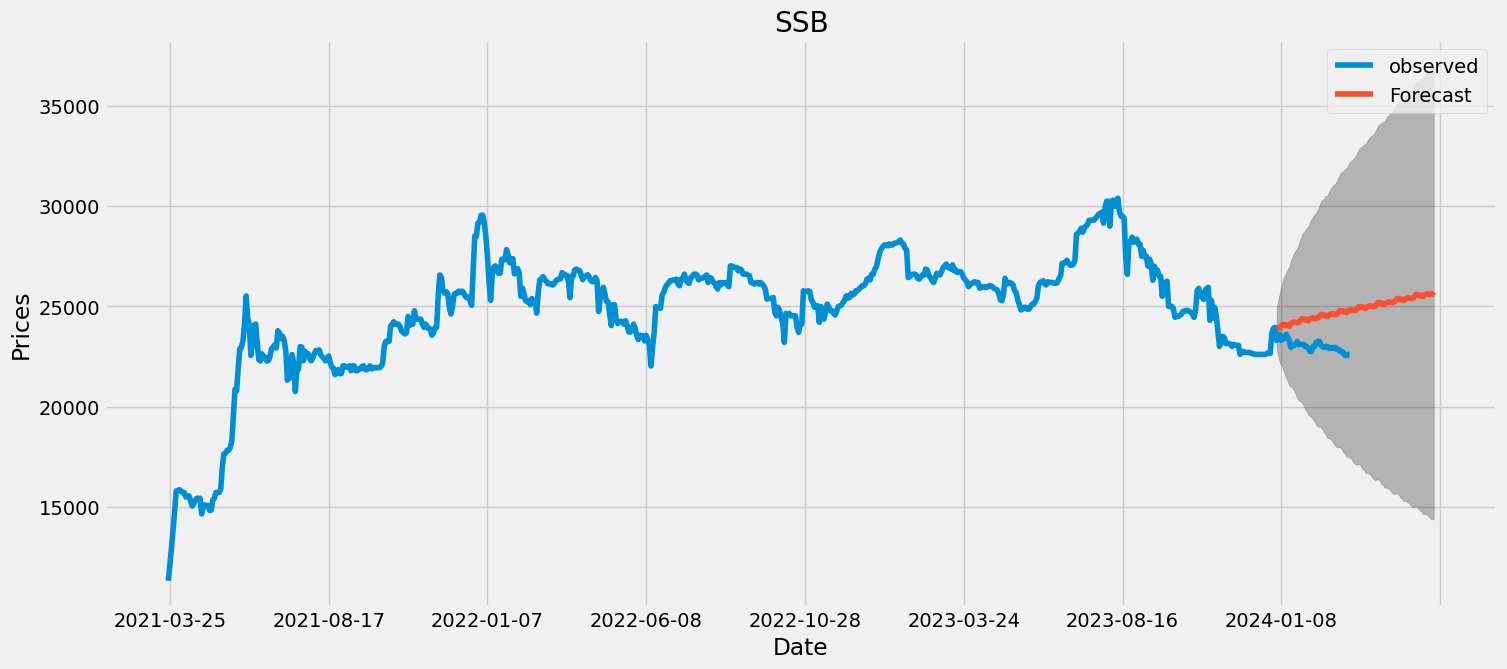

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13470D+00    |proj g|=  1.18559D-01

At iterate    5    f=  7.09874D+00    |proj g|=  5.89161D-02

At iterate   10    f=  7.09515D+00    |proj g|=  1.73605D-03

At iterate   15    f=  7.09479D+00    |proj g|=  5.51818D-03

At iterate   20    f=  7.09471D+00    |proj g|=  1.40220D-02

At iterate   25    f=  7.08477D+00    |proj g|=  1.59874D-01

At iterate   30    f=  7.01649D+00    |proj g|=  5.82335D-02

At iterate   35    f=  7.01030D+00    |proj g|=  2.51950D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

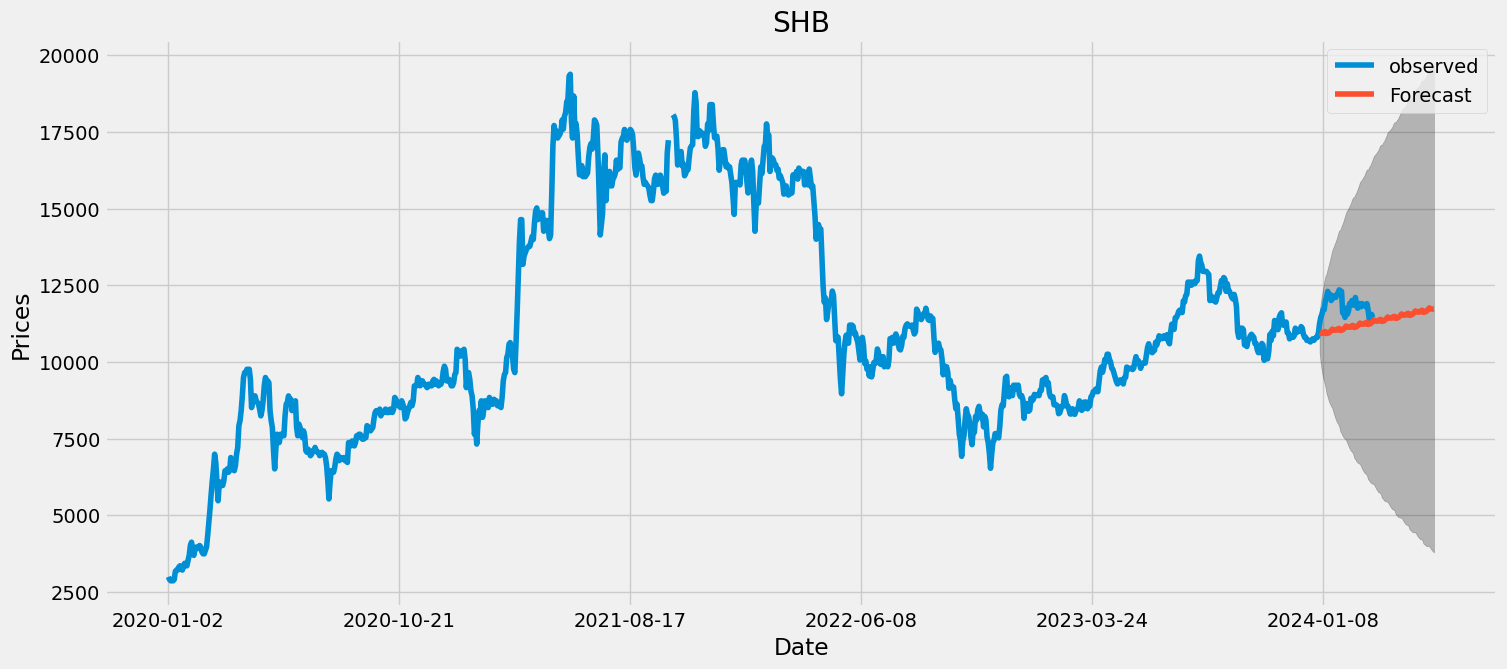

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91615D+00    |proj g|=  1.52939D-01

At iterate    5    f=  7.89592D+00    |proj g|=  1.24672D-02

At iterate   10    f=  7.89590D+00    |proj g|=  6.15387D-04

At iterate   15    f=  7.89572D+00    |proj g|=  7.32582D-03

At iterate   20    f=  7.89518D+00    |proj g|=  1.02685D-03

At iterate   25    f=  7.89452D+00    |proj g|=  1.31298D-02

At iterate   30    f=  7.84042D+00    |proj g|=  4.77568D-02

At iterate   35    f=  7.81403D+00    |proj g|=  3.88329D-03

At iterate   40    f=  7.81373D+00    |proj g|=  9.05552D-03

At iterate   45    f=  7.81324D+00    |proj g|=  5.14121D-03

At iterate   50    f=  7.81323D+00    |proj g|=  5.81823D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

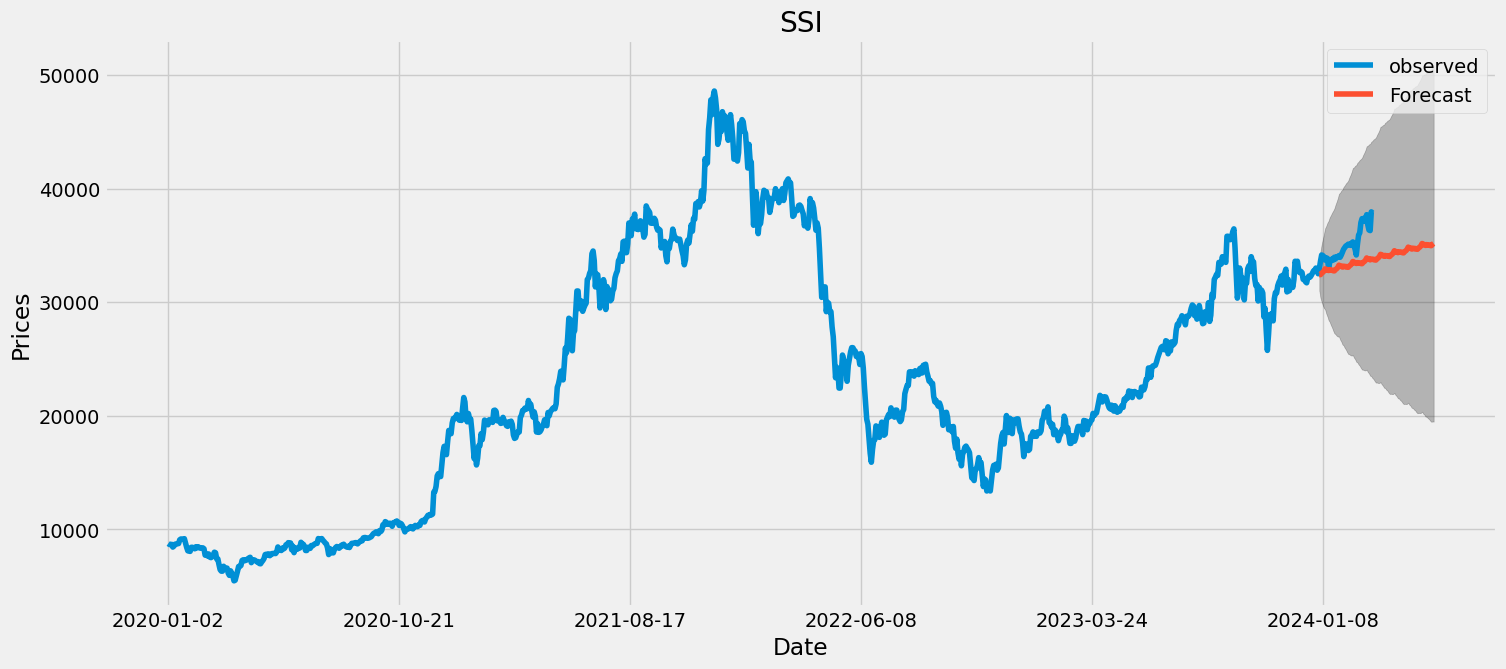

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75906D+00    |proj g|=  1.17952D-01


 This problem is unconstrained.



At iterate    5    f=  7.73148D+00    |proj g|=  3.91154D-02

At iterate   10    f=  7.72990D+00    |proj g|=  7.02677D-04

At iterate   15    f=  7.72986D+00    |proj g|=  5.05413D-03

At iterate   20    f=  7.72973D+00    |proj g|=  1.10018D-03

At iterate   25    f=  7.72949D+00    |proj g|=  1.84371D-02

At iterate   30    f=  7.72474D+00    |proj g|=  5.36932D-02

At iterate   35    f=  7.71471D+00    |proj g|=  2.08270D-02

At iterate   40    f=  7.65185D+00    |proj g|=  4.07004D-02

At iterate   45    f=  7.64423D+00    |proj g|=  2.27502D-02

At iterate   50    f=  7.64274D+00    |proj g|=  1.19640D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

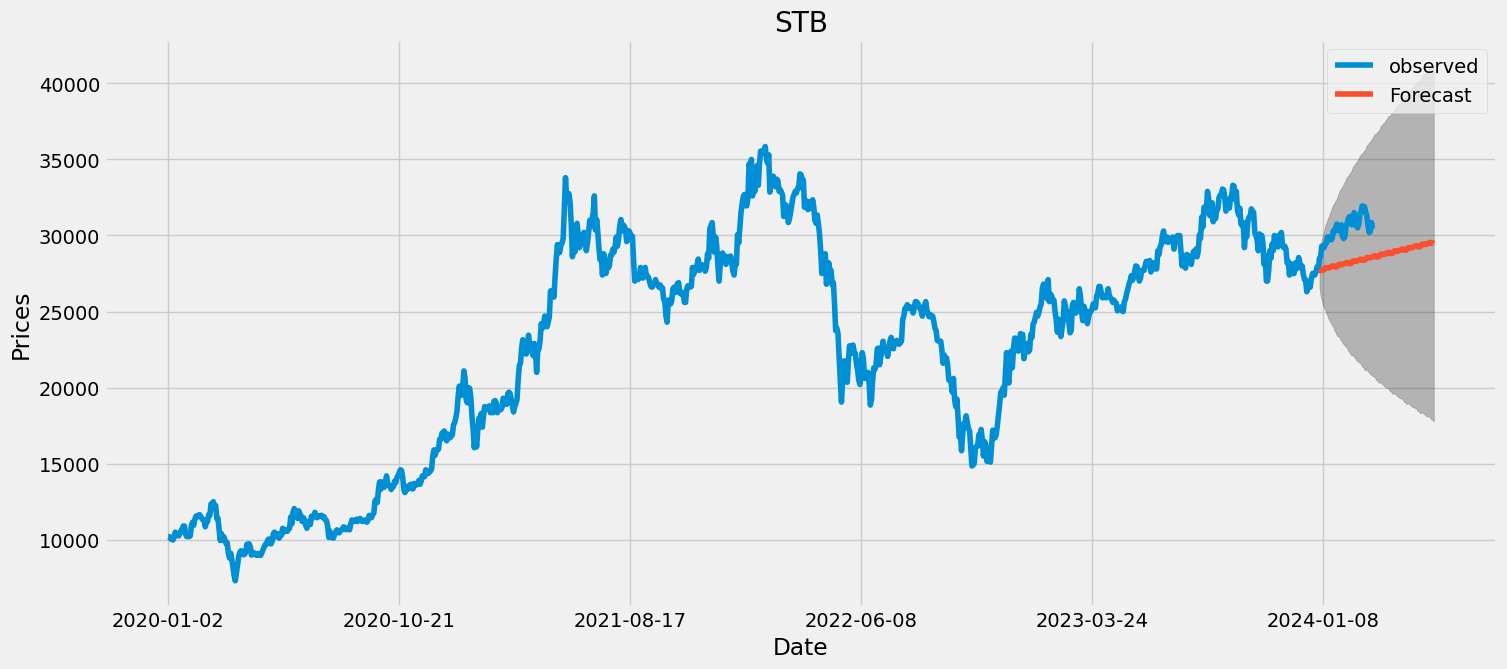

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33236D+00    |proj g|=  1.30623D-01


 This problem is unconstrained.



At iterate    5    f=  7.30059D+00    |proj g|=  2.68635D-02

At iterate   10    f=  7.30005D+00    |proj g|=  7.56209D-03

At iterate   15    f=  7.29949D+00    |proj g|=  3.37656D-03

At iterate   20    f=  7.29911D+00    |proj g|=  8.88826D-04

At iterate   25    f=  7.29900D+00    |proj g|=  2.25128D-03

At iterate   30    f=  7.27703D+00    |proj g|=  1.12535D-01

At iterate   35    f=  7.19858D+00    |proj g|=  5.33065D-02

At iterate   40    f=  7.19679D+00    |proj g|=  3.46322D-03

At iterate   45    f=  7.19674D+00    |proj g|=  6.39018D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     76   

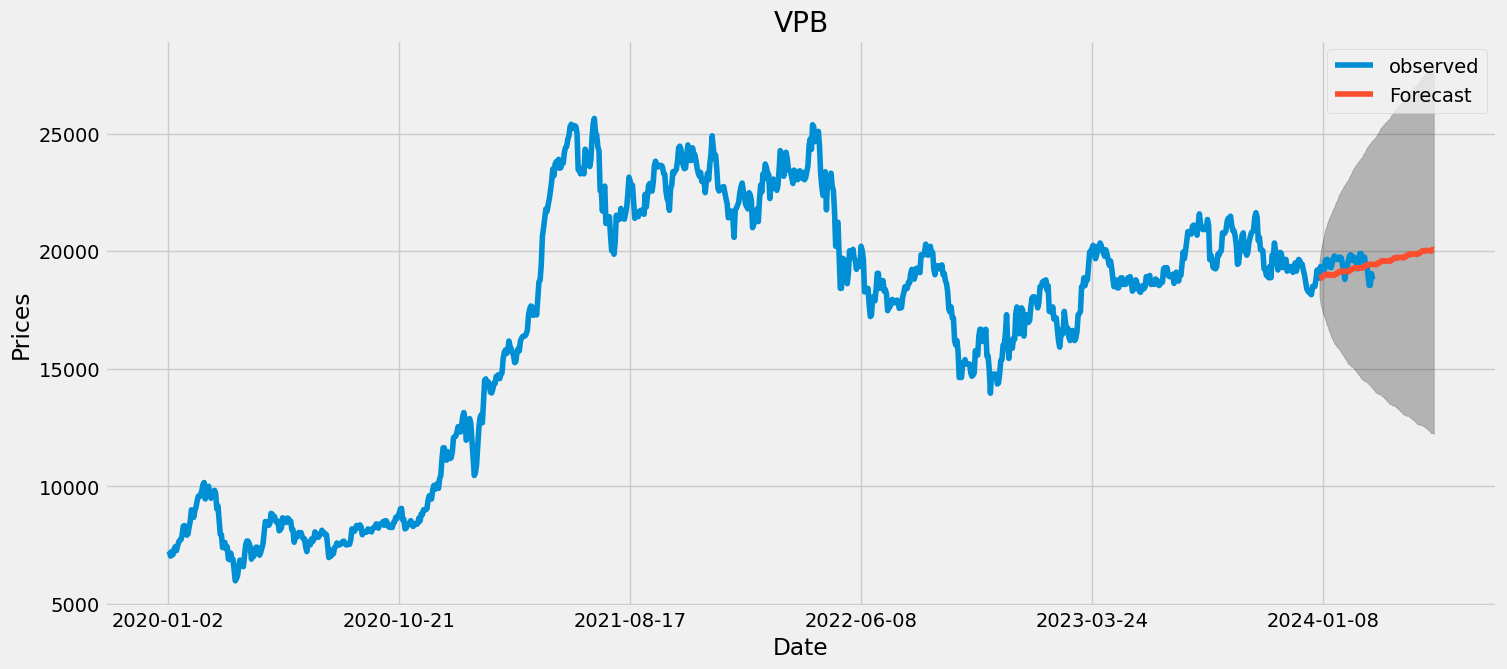

In [19]:
for stock in df.columns:
    plot_forcast(stock, Forcast(stock), 100)